# Benchmarking `fthmc`

### Imports

In [1]:
import os
import sys
import torch

from functools import reduce
from IPython.core.interactiveshell import InteractiveShell

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format ='retina'

InteractiveShell.ast_node_interactivity = "all"


project_dir = os.path.abspath('../../')
if project_dir not in sys.path:
    sys.path.append(project_dir)

import fthmc.utils.io as io
logger = io.Logger()

torch.manual_seed(9)
# torch.set_default_tensor_type(torch.FloatTensor)

#torch.set_num_threads(param.nth)
#torch.set_num_interop_threads(param.nth_interop)
#os.environ["OMP_NUM_THREADS"] = str(param.nth)
#os.environ["KMP_BLOCKTIME"] = "0"
#os.environ["KMP_SETTINGS"] = "1"
#os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    torch.set_default_tensor_type(torch.DoubleTensor)

import matplotlib as mpl
import matplotlib.pyplot as plt

from fthmc.train import train
from fthmc.config import Param, TrainConfig, PI
from fthmc.utils.distributions import MultivariateUniform
from fthmc.utils.layers import make_u1_equiv_layers, set_weights
from fthmc.utils.plot_helpers import save_live_plots
from fthmc.utils.logger import Logger

import fthmc.utils.qed_helpers as qed

import datetime

from fthmc.config import LOGS_DIR

mpl.rcParams['text.usetex'] = False
%matplotlib inline

style_file = os.path.abspath('~/.matplotlib/stylelib/molokai.mplstyle')
if os.path.isfile(style_file):
    plt.style.use(style_file)

[11:34:38]  TORCH DEVICE: cuda

            TORCH DTYPE: torch.float32

SyntaxError: invalid syntax (plot_helpers.py, line 500)

## Define `Param` and `TrainConfig` for training the flow

In [8]:
import numpy as np

from fthmc.config import SchedulerConfig
from fthmc.main import main

plt.style.use('~/.matplotlib/stylelib/molokai.mplstyle')

L = 16 
BETA = 6.

# -------------------------------------------
# Specify `param` and `train_config` objects
# -------------------------------------------
param = {
    'L': L, 
    'tau': 0.5,
    'nrun': 1,
    'beta': BETA,
    'nstep': 5,
    'ntraj': 1000,
    'nprint': 100,
    'seed': 1331,
    #'nth': 0,
    #'nth_interop': 0
}

train_config = {
    'L': L,
    'beta': BETA,
    'n_era': 5,
    'n_epoch': 1000,
    'n_layers': 24,
    'n_s_nets': 2,
    'hidden_sizes': [8, 8],
    'kernel_size': 3,
    'batch_size': 64,
    'print_freq': 250,
    'plot_freq': 50,
    'log_freq': 50,
}

scheduler_config = {
    'factor': 0.95,
    'patience': 200,
    'min_lr': 5e-6,
    'verbose': True,
}

configs = {
    'param': param,
    'train_config': train_config,
    'scheduler_config': scheduler_config,
}

os.environ["KMP_BLOCKTIME"] = "0"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"]= (
    "granularity=fine,verbose,compact,1,0"
)
#torch.set_num_threads(int(param.nth))
#torch.set_num_interop_threads(int(param.nth_interop))
#os.environ["OMP_NUM_THREADS"] = str(param.nth)

───────────────────── Running HMC for 1 runs, each of 1000 trajectories ─────────────────────

[12:10:02]  Creating directory:                                                              
            ../../logs/hmc/lat16x16/beta6.0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002

[12:10:02]  Creating directory:                                                              
            ../../logs/hmc/lat16x16/beta6.0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots

[12:10:02]  Param:                                                                           
            ----------------                                                                 
            beta=6.0                                                                         
            L=16                                                                             
            tau=0.5                                                                          
            nstep=5                                                                          
            ntraj=1000                                                                       
            nrun=1                                                                           
            nprint=100                                                                       
            seed=1331                                                                        
            randinit=False                                                                   
            nth_interop=2                                                                    
            nth=2                                                                            
            lat=[16, 16]                                                                     
            nd=2                                                                             
            shape=[2, 16, 16]                                                                
            volume=256                                                                       
            dt=0.1                                                                           
            logdir=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.0/t16x16_b6
            .0_n1000_t0.5_s5

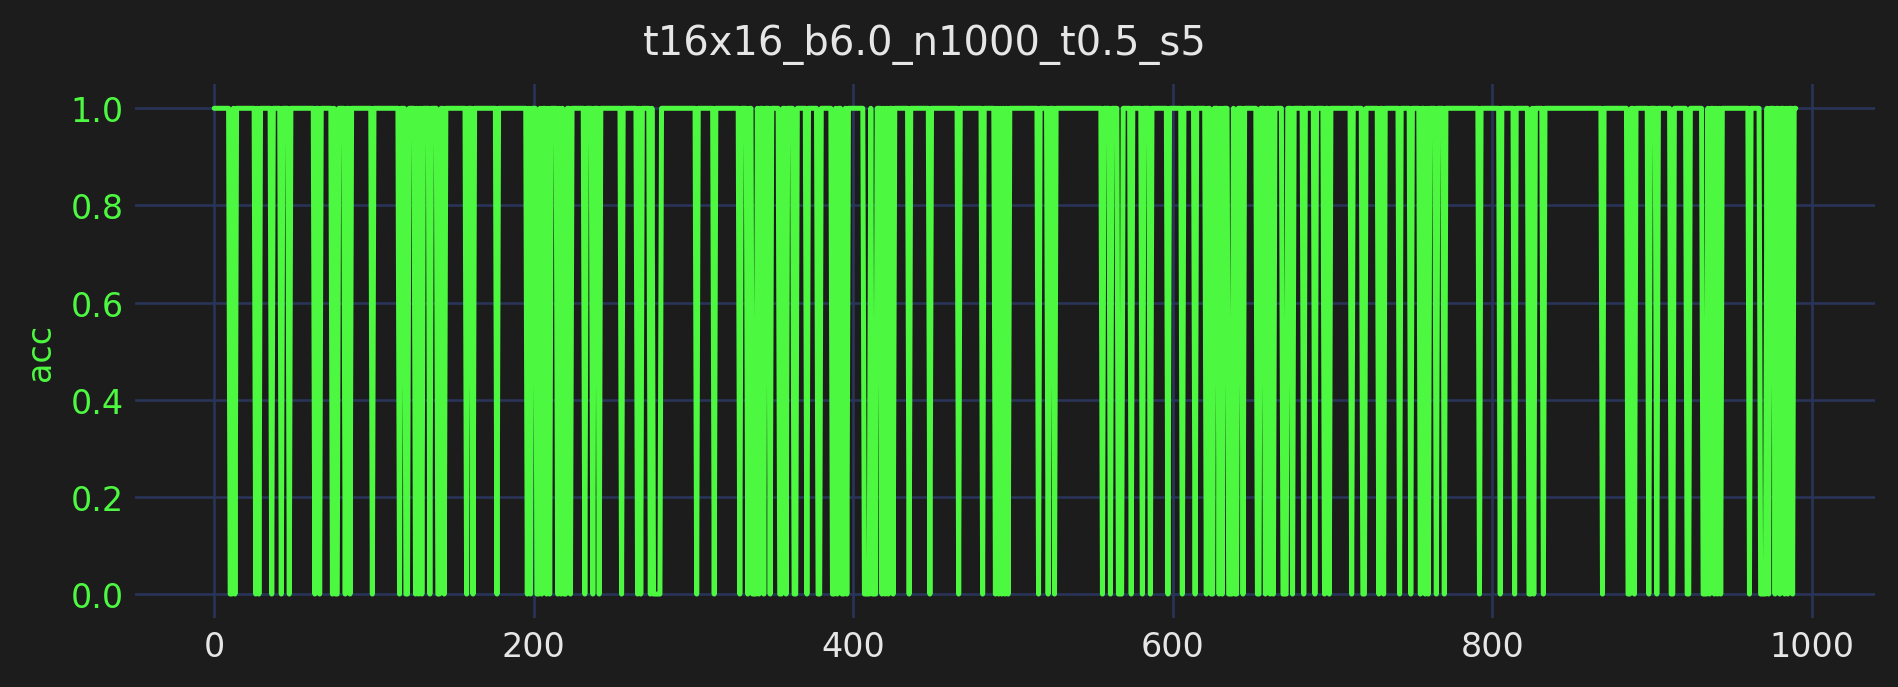

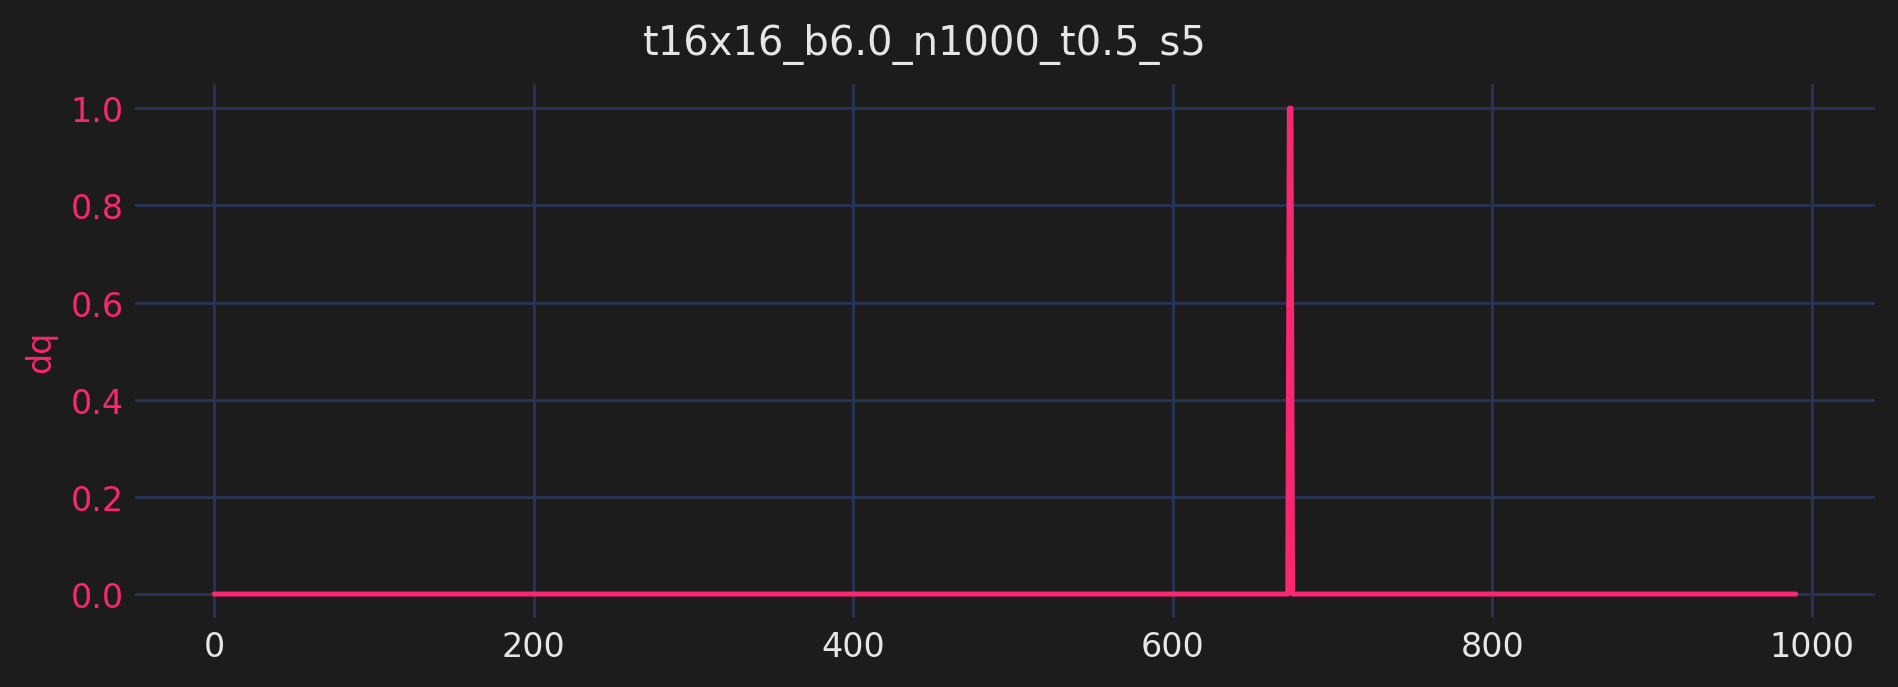

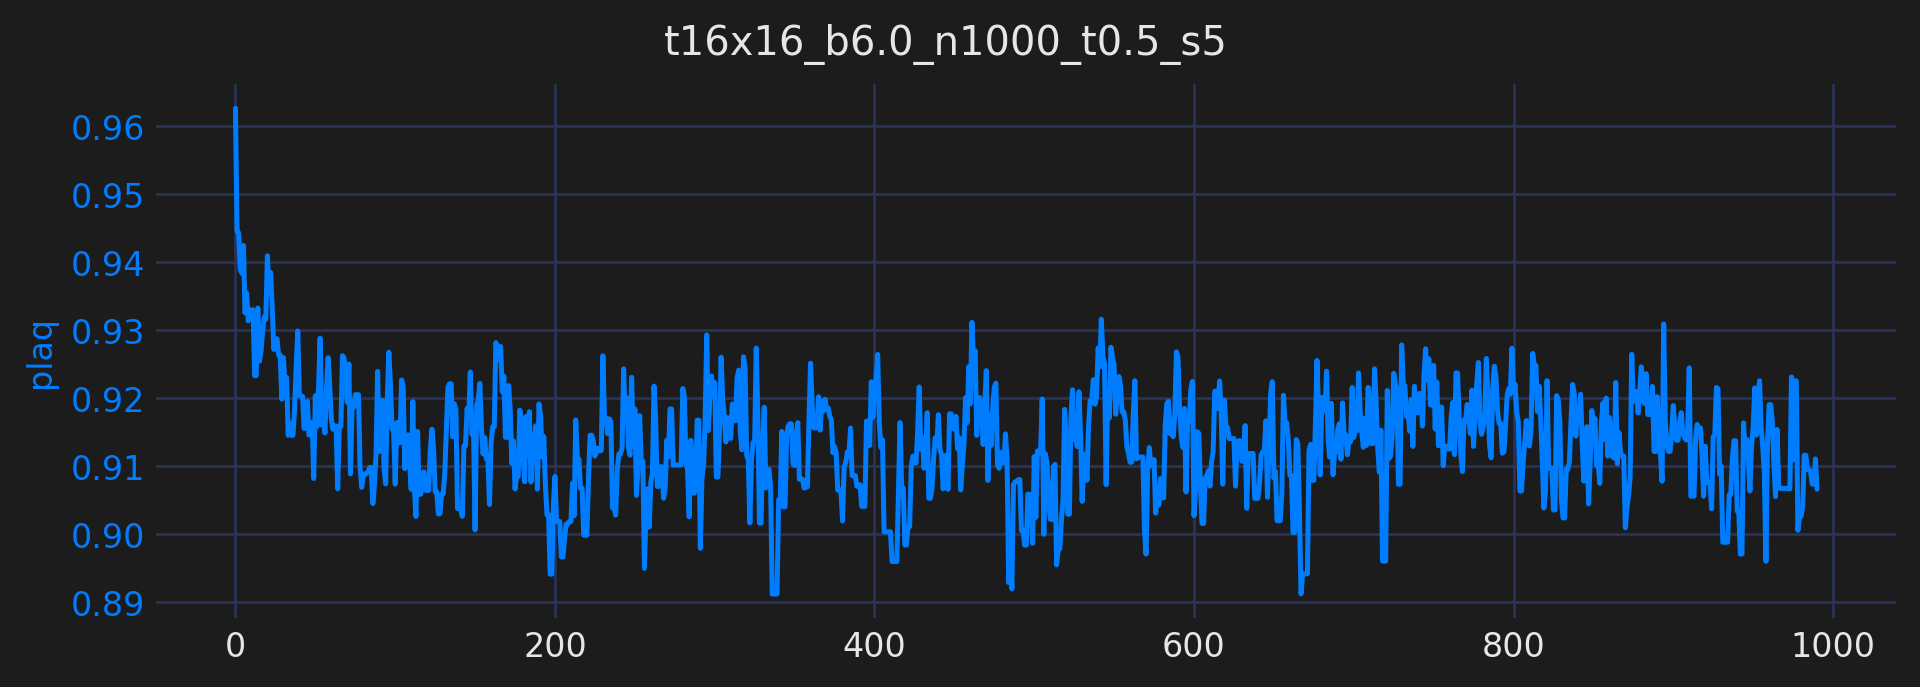

──────────────────────────────── RUN: 0, last took: 0 m 0 s ─────────────────────────────────

            plaq=1.000 q=0.000

            traj=2 dt=0.005 acc=1.000 dH=-1.540 plaq=0.945 q=0 dq=0.000

[12:10:07]  traj=102 dt=0.005 acc=1.000 dH=0.133 plaq=0.916 q=0 dq=0.000

[12:10:12]  traj=202 dt=0.005 acc=1.000 dH=-0.024 plaq=0.902 q=0 dq=0.000

[12:10:16]  traj=302 dt=0.004 acc=1.000 dH=-1.050 plaq=0.908 q=0 dq=0.000

[12:10:22]  traj=402 dt=0.005 acc=1.000 dH=-0.203 plaq=0.923 q=0 dq=0.000

[12:10:27]  traj=502 dt=0.005 acc=1.000 dH=-0.609 plaq=0.902 q=0 dq=0.000

[12:10:32]  traj=602 dt=0.005 acc=1.000 dH=-0.093 plaq=0.907 q=0 dq=0.000

[12:10:38]  traj=702 dt=0.005 acc=1.000 dH=-0.104 plaq=0.916 q=0 dq=0.000

[12:10:43]  traj=802 dt=0.004 acc=1.000 dH=-0.117 plaq=0.922 q=0 dq=0.000

[12:10:49]  traj=902 dt=0.004 acc=1.000 dH=-0.211 plaq=0.916 q=0 dq=0.000

[12:10:53]  Creating directory: ../../logs/hmc/lat16x16/beta6.0/t16x16_b6.0_n1000_t0.5_s5/202
            1-06-29-121002/plots/run0

[12:10:53]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/traj.png

[12:10:54]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/dt.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/acc.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/dH.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/plaq.png

[12:10:55]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/q.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat16x16/beta6.
            0/t16x16_b6.0_n1000_t0.5_s5/2021-06-29-121002/plots/run0/dq.png

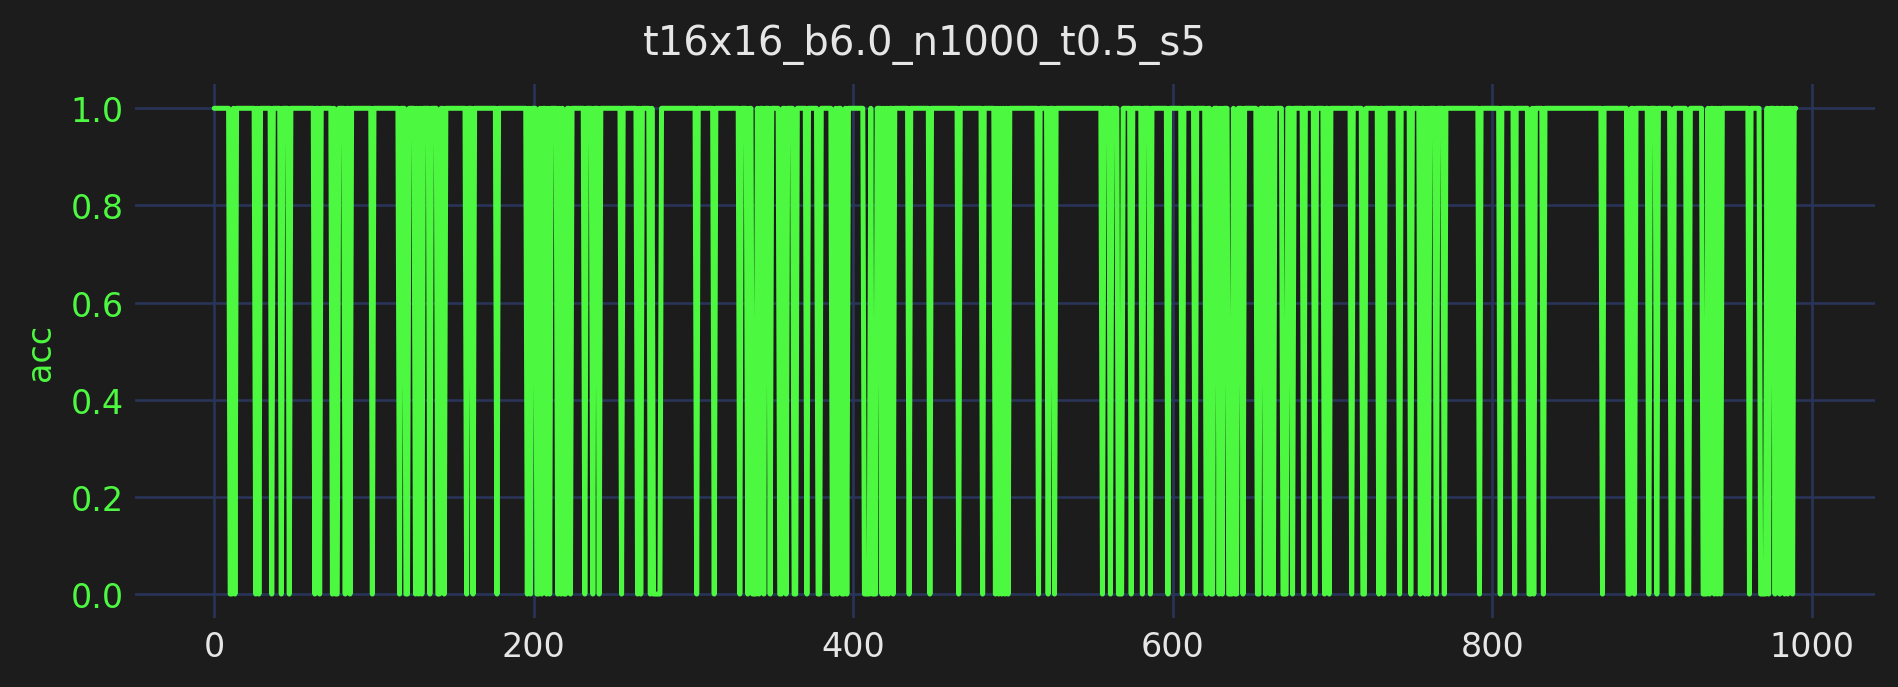

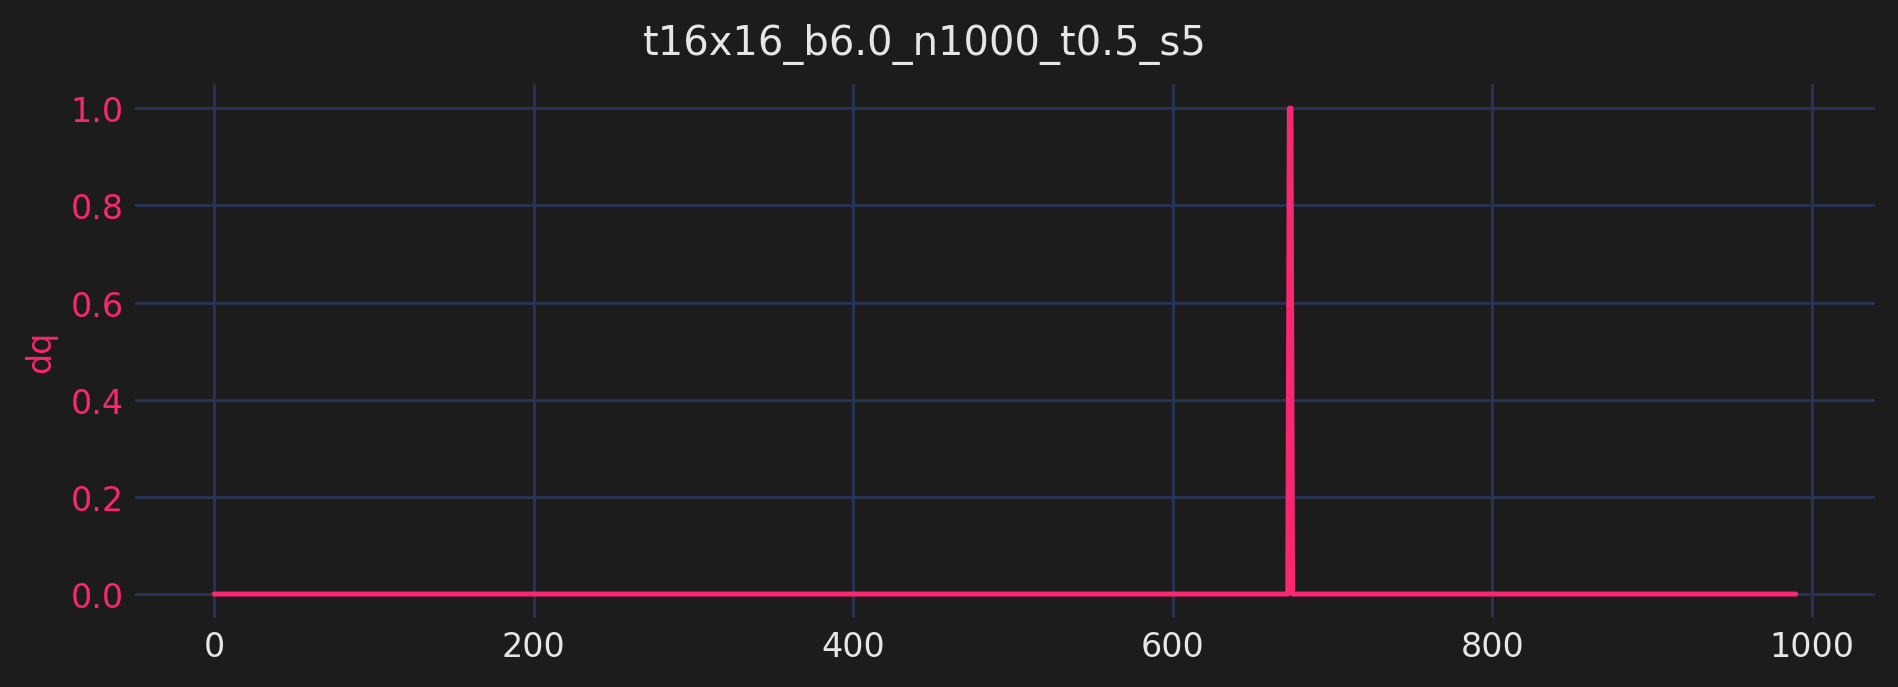

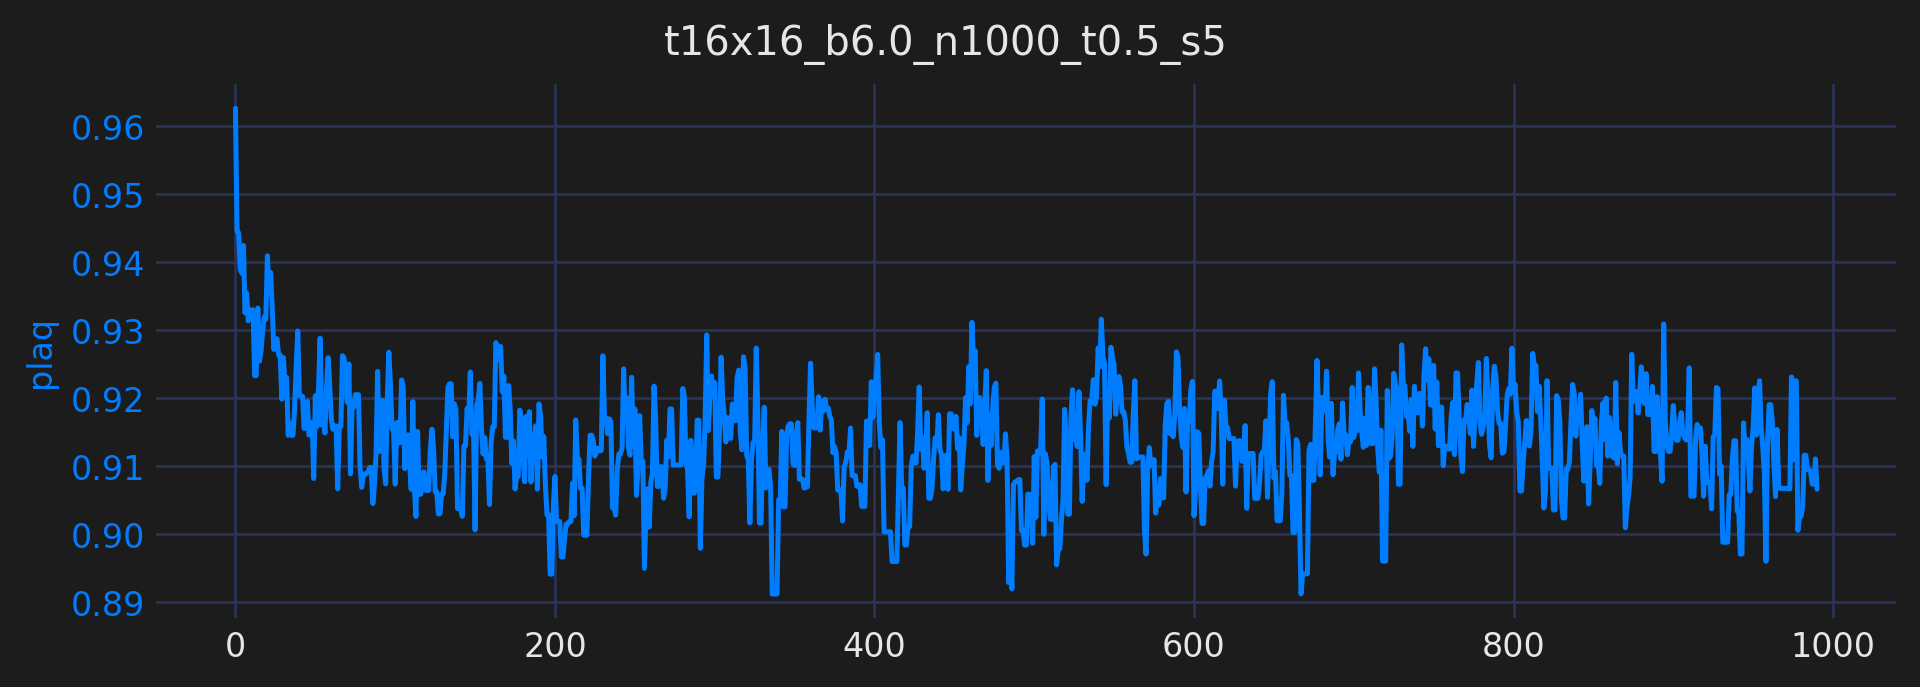

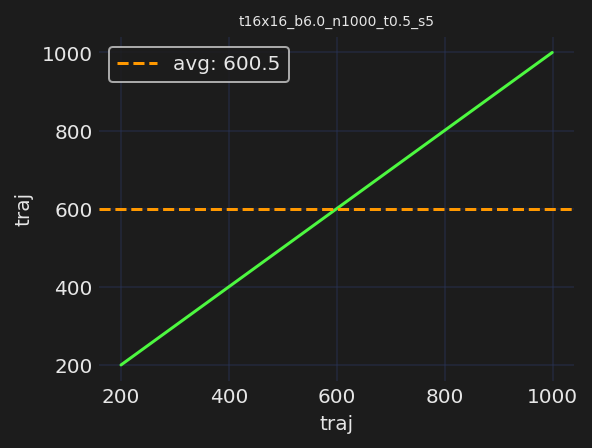

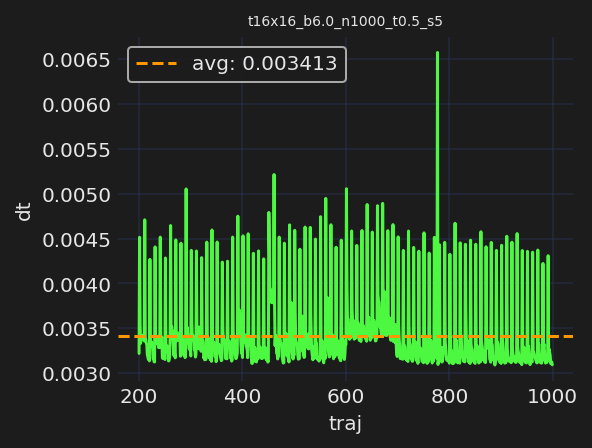

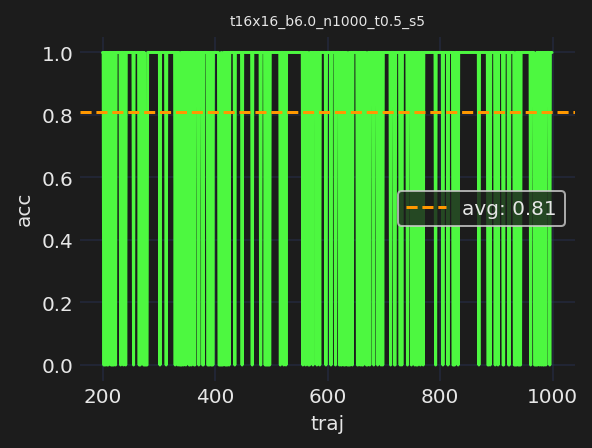

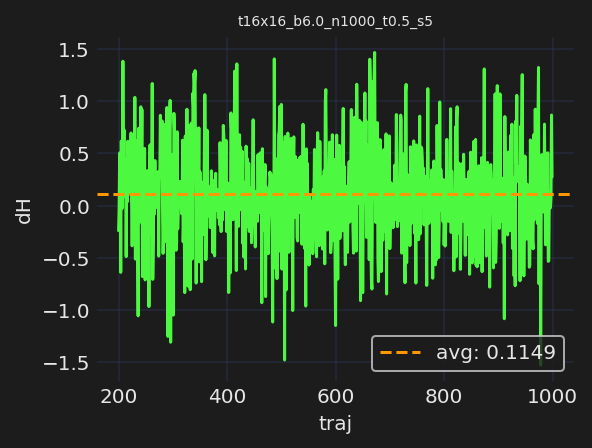

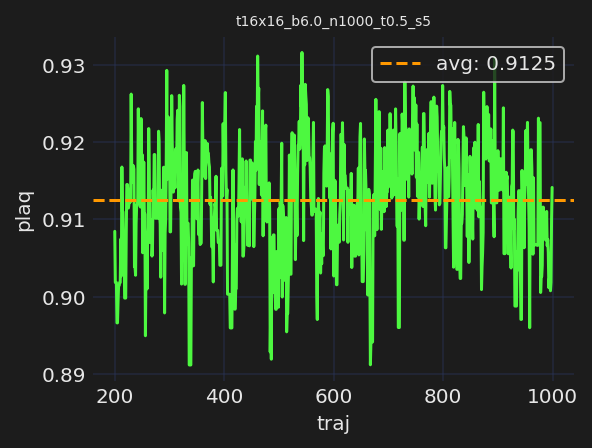

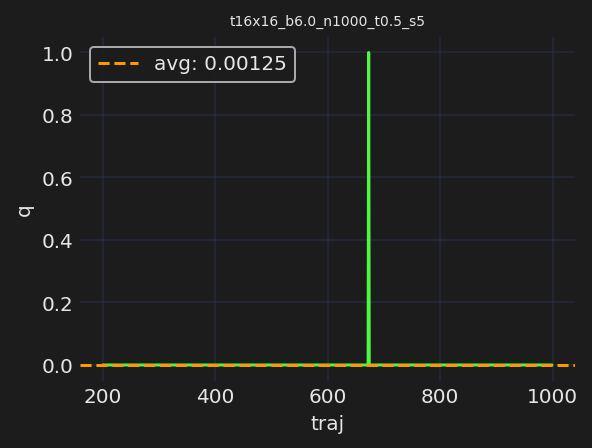

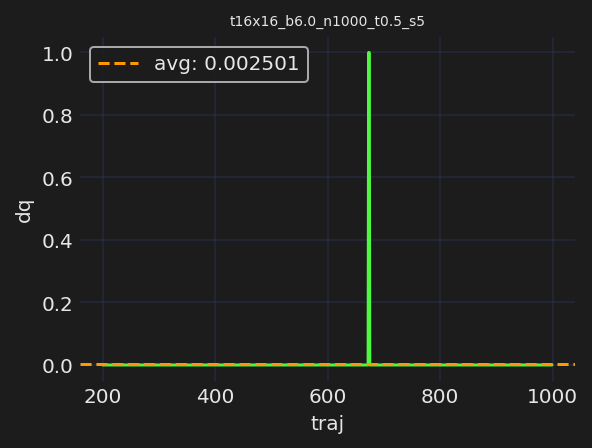

[12:10:56]  Run times: ['51.4347']

            Per trajectory: ['0.0514']

[12:10:56]  Saving hmc_histories to ../../logs/hmc/lat16x16/beta6.0/t16x16_b6.0_n1000_t0.5_s5
            /2021-06-29-121002/hmc_histories.z.

[12:10:57]  Saving hmc_fields_arr to ../../logs/hmc/lat16x16/beta6.0/t16x16_b6.0_n1000_t0.5_s
            5/2021-06-29-121002/hmc_fields_arr.z.

[12:10:57]  Setting `ftConfig.tau, `ftConfig.nstep` using `Param`

───────────────────── Training FlowModel for 5 era, each of 1000 epochs ─────────────────────

            TrainConfig:                                                                     
            ------------                                                                     
            L=16                                                                             
            beta=6.0                                                                         
            restore=False                                                                    
            n_era=5                                                                          
            n_epoch=1000                                                                     
            batch_size=64                                                                    
            base_lr=0.001                                                                    
            n_s_nets=2                                                                       
            n_layers=24                                                                      
            kernel_size=3                                                                    
            with_force=False                                                                 
            print_freq=250                                                                   
            plot_freq=50                                                                     
            log_freq=50                                                                      
            hidden_sizes=[8, 8]                                                              
            lat=[16, 16]                                                                     
            nd=2                                                                             
            shape=[2, 16, 16]                                                                
            volume=256                                                                       
            logdir=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/beta6.0/L16_b6
            .0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000                                 
            dirs:                                                                            
            -----                                                                            
            logdir=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/beta6.0/L16_b6
            .0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000                                 
            training=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/beta6.0/L16_
            b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training                      
            inference=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/beta6.0/L16
            _b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/inference                    
            ckpts=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/beta6.0/L16_b6.
            0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/checkpoints

[12:10:57]  Creating directory: ../../logs/models/lat16x16/beta6.0/L16_b6.0_nb64_nh24_ns2_ks3
            _hl88_lr0.001_era5_epoch1000/training/2021-06-29-121057

[12:10:57]  Creating directory: ../../logs/models/lat16x16/beta6.0/L16_b6.0_nb64_nh24_ns2_ks3
            _hl88_lr0.001_era5_epoch1000/training/2021-06-29-121057/plots

[12:10:57]  Creating directory: ../../logs/models/lat16x16/beta6.0/L16_b6.0_nb64_nh24_ns2_ks3
            _hl88_lr0.001_era5_epoch1000/training/2021-06-29-121057/checkpoints

[12:10:57]  Creating directory: ../../logs/models/lat16x16/beta6.0/L16_b6.0_nb64_nh24_ns2_ks3
            _hl88_lr0.001_era5_epoch1000/training/2021-06-29-121057/summaries

[12:10:57]  Writing summaries to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/summaries

            Scheduler created!

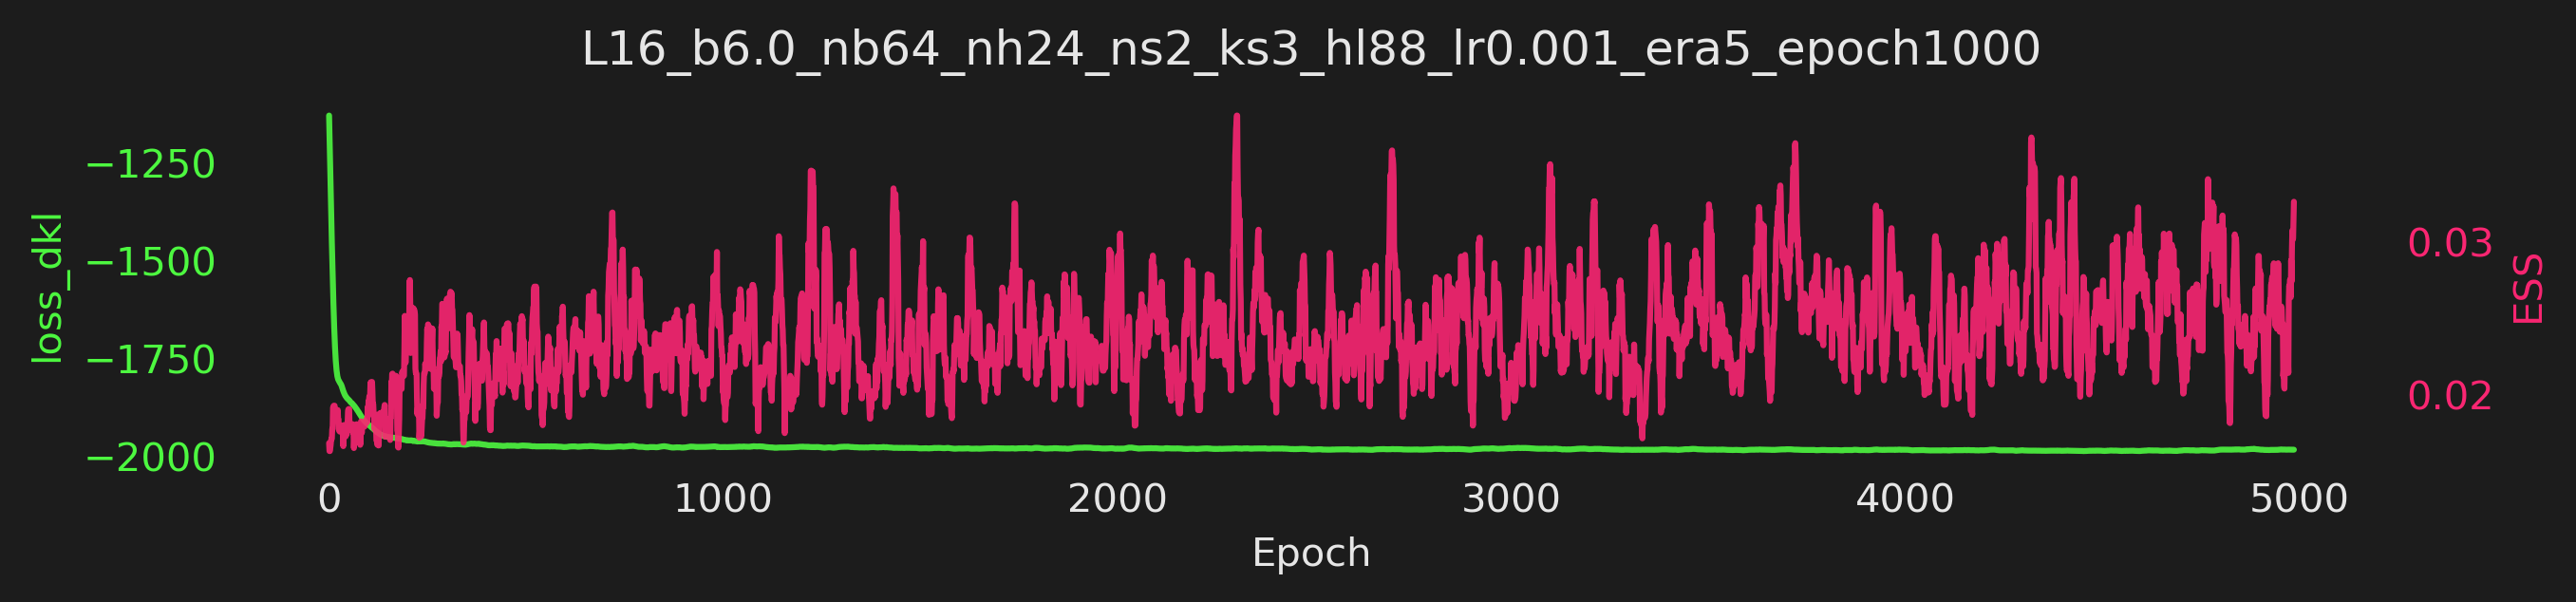

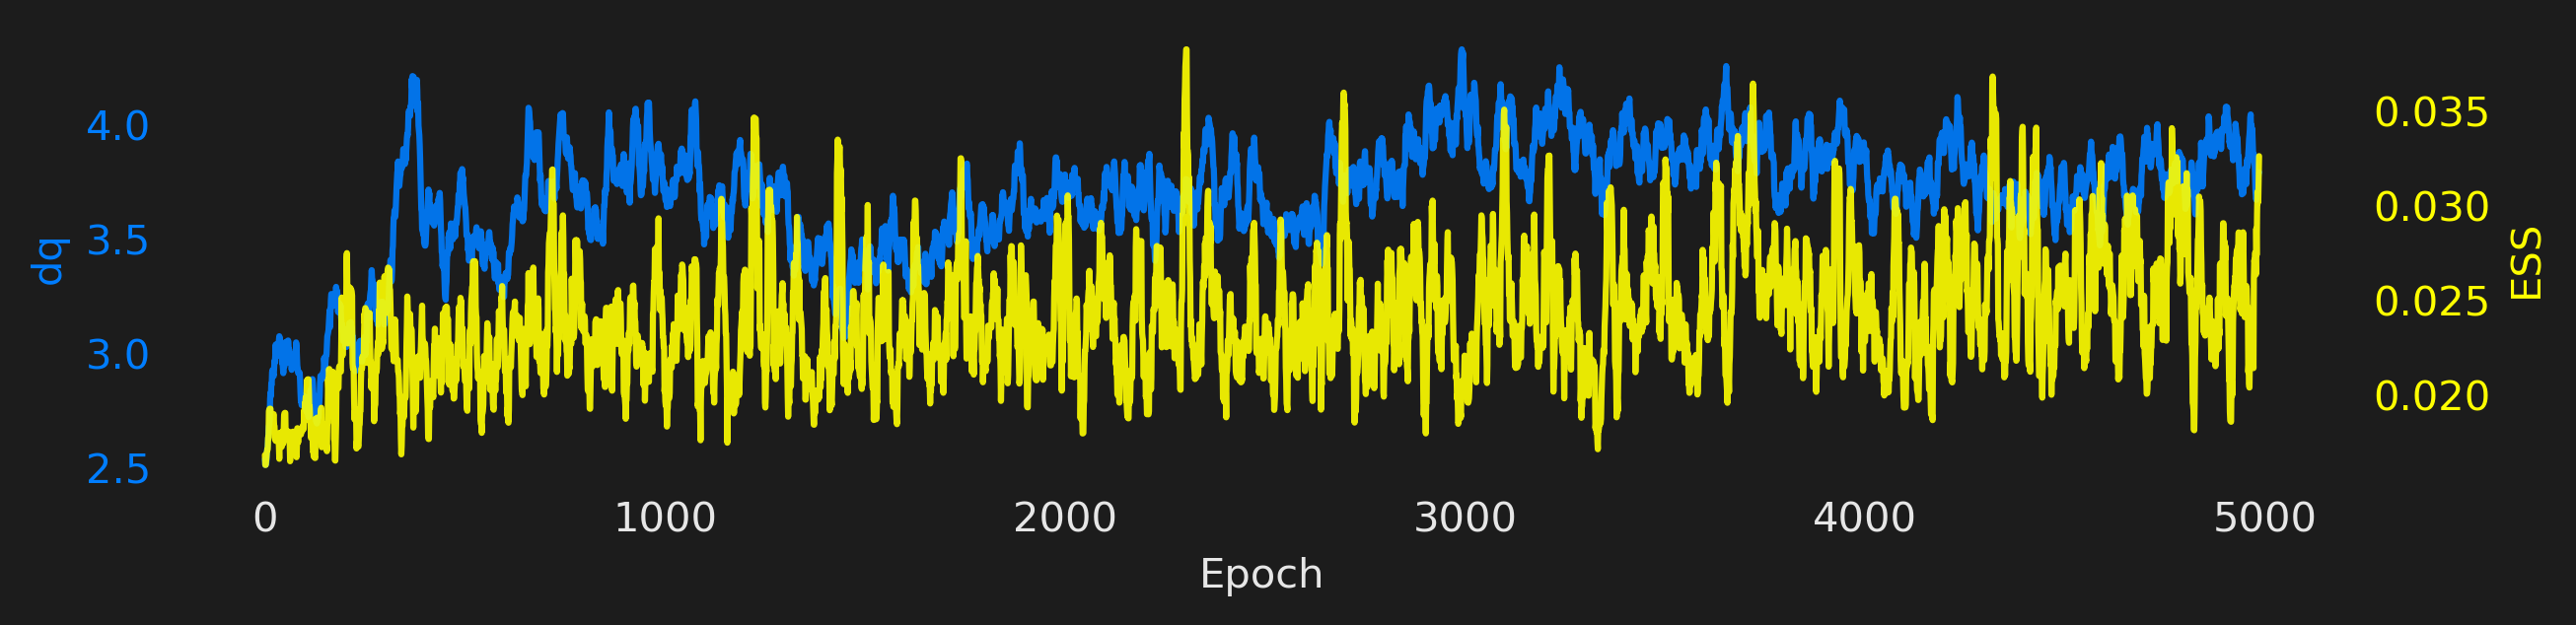

─────────────────────────────── ERA=0, last took: 0 min 0 sec ───────────────────────────────

[12:11:30]  epoch=250 dt=0.125 ess=0.024 logp=1341.847 logq=-621.440 loss_dkl=-1963.286      
            dq=3.625 plaq=0.874

[12:12:04]  epoch=500 dt=0.127 ess=0.028 logp=1353.312 logq=-619.052 loss_dkl=-1972.364      
            dq=3.766 plaq=0.881

[12:12:38]  epoch=750 dt=0.127 ess=0.016 logp=1362.552 logq=-613.762 loss_dkl=-1976.315      
            dq=4.453 plaq=0.887

[12:13:12]  epoch=1000 dt=0.126 ess=0.017 logp=1350.254 logq=-622.149 loss_dkl=-1972.403     
            dq=3.531 plaq=0.879

[12:13:12]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/checkpoints/ckpt-era0-epoch999.tar

───────────────────────────── ERA=1, last took: 2 min 15.21 sec ─────────────────────────────

[12:13:46]  epoch=1250 dt=0.127 ess=0.061 logp=1352.225 logq=-622.084 loss_dkl=-1974.309     
            dq=4.141 plaq=0.880

Epoch  1340: reducing learning rate of group 0 to 9.5000e-04.


[12:14:20]  epoch=1500 dt=0.128 ess=0.016 logp=1360.526 logq=-617.850 loss_dkl=-1978.376     
            dq=3.516 plaq=0.886

[12:14:55]  epoch=1750 dt=0.128 ess=0.016 logp=1362.585 logq=-617.785 loss_dkl=-1980.370     
            dq=3.734 plaq=0.887

Epoch  1792: reducing learning rate of group 0 to 9.0250e-04.
Epoch  1993: reducing learning rate of group 0 to 8.5737e-04.


[12:15:29]  epoch=2000 dt=0.128 ess=0.018 logp=1355.740 logq=-621.770 loss_dkl=-1977.509     
            dq=3.516 plaq=0.883

[12:15:30]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/checkpoints/ckpt-era1-epoch999.tar

───────────────────────────── ERA=2, last took: 2 min 17.23 sec ─────────────────────────────

[12:16:04]  epoch=2250 dt=0.127 ess=0.024 logp=1363.195 logq=-619.114 loss_dkl=-1982.309     
            dq=3.859 plaq=0.887

Epoch  2459: reducing learning rate of group 0 to 8.1451e-04.


[12:16:39]  epoch=2500 dt=0.128 ess=0.016 logp=1366.794 logq=-618.505 loss_dkl=-1985.299     
            dq=3.297 plaq=0.890

Epoch  2746: reducing learning rate of group 0 to 7.7378e-04.


[12:17:13]  epoch=2750 dt=0.128 ess=0.031 logp=1363.728 logq=-618.927 loss_dkl=-1982.655     
            dq=3.344 plaq=0.888

Epoch  2947: reducing learning rate of group 0 to 7.3509e-04.


[12:17:48]  epoch=3000 dt=0.128 ess=0.034 logp=1357.226 logq=-618.726 loss_dkl=-1975.952     
            dq=3.703 plaq=0.884

[12:17:48]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/checkpoints/ckpt-era2-epoch999.tar

───────────────────────────── ERA=3, last took: 2 min 18.66 sec ─────────────────────────────

Epoch  3148: reducing learning rate of group 0 to 6.9834e-04.


[12:18:23]  epoch=3250 dt=0.128 ess=0.016 logp=1367.357 logq=-616.423 loss_dkl=-1983.781     
            dq=4.109 plaq=0.890

Epoch  3349: reducing learning rate of group 0 to 6.6342e-04.


[12:18:58]  epoch=3500 dt=0.129 ess=0.026 logp=1368.770 logq=-615.369 loss_dkl=-1984.139     
            dq=3.938 plaq=0.891

Epoch  3554: reducing learning rate of group 0 to 6.3025e-04.


[12:19:33]  epoch=3750 dt=0.131 ess=0.030 logp=1363.432 logq=-619.816 loss_dkl=-1983.249     
            dq=4.359 plaq=0.888

Epoch  3801: reducing learning rate of group 0 to 5.9874e-04.


[12:20:09]  epoch=4000 dt=0.131 ess=0.018 logp=1367.208 logq=-617.004 loss_dkl=-1984.212     
            dq=3.734 plaq=0.890

[12:20:09]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/checkpoints/ckpt-era3-epoch999.tar

───────────────────────────── ERA=4, last took: 2 min 20.35 sec ─────────────────────────────

Epoch  4243: reducing learning rate of group 0 to 5.6880e-04.


[12:20:45]  epoch=4250 dt=0.132 ess=0.016 logp=1368.451 logq=-617.540 loss_dkl=-1985.991     
            dq=3.812 plaq=0.891

[12:21:21]  epoch=4500 dt=0.132 ess=0.016 logp=1367.222 logq=-619.851 loss_dkl=-1987.073     
            dq=4.188 plaq=0.890

[12:21:57]  epoch=4750 dt=0.131 ess=0.016 logp=1366.985 logq=-620.093 loss_dkl=-1987.078     
            dq=3.125 plaq=0.890

Epoch  4796: reducing learning rate of group 0 to 5.4036e-04.
Epoch  4997: reducing learning rate of group 0 to 5.1334e-04.


[12:22:32]  epoch=5000 dt=0.132 ess=0.036 logp=1364.273 logq=-619.671 loss_dkl=-1983.944     
            dq=4.000 plaq=0.888

[12:22:33]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/checkpoints/ckpt-era4-epoch999.tar

            Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/checkpoints/ckpt-era5-epoch1001.tar

[12:22:34]  Saving live plots to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16
            /beta6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-
            29-121057/plots

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/dt.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/ess.png

[12:22:35]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/logp.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/logq.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/loss_dkl.png

[12:22:36]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/q.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/dq.png

[12:22:37]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-1
            21057/plots/plaq.png

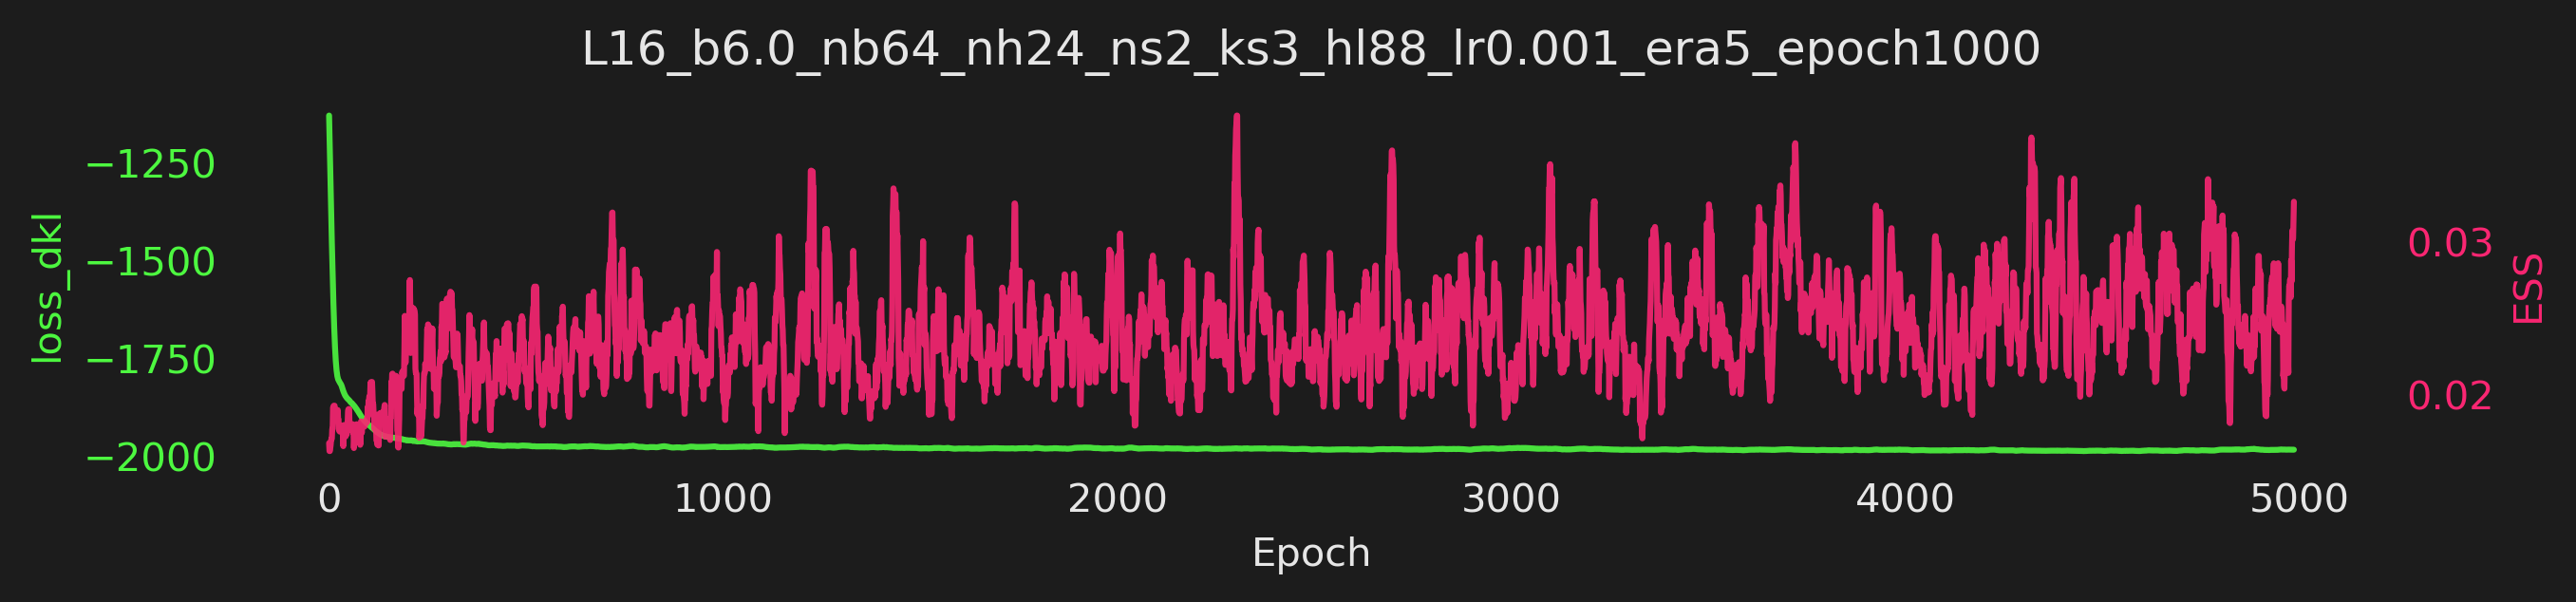

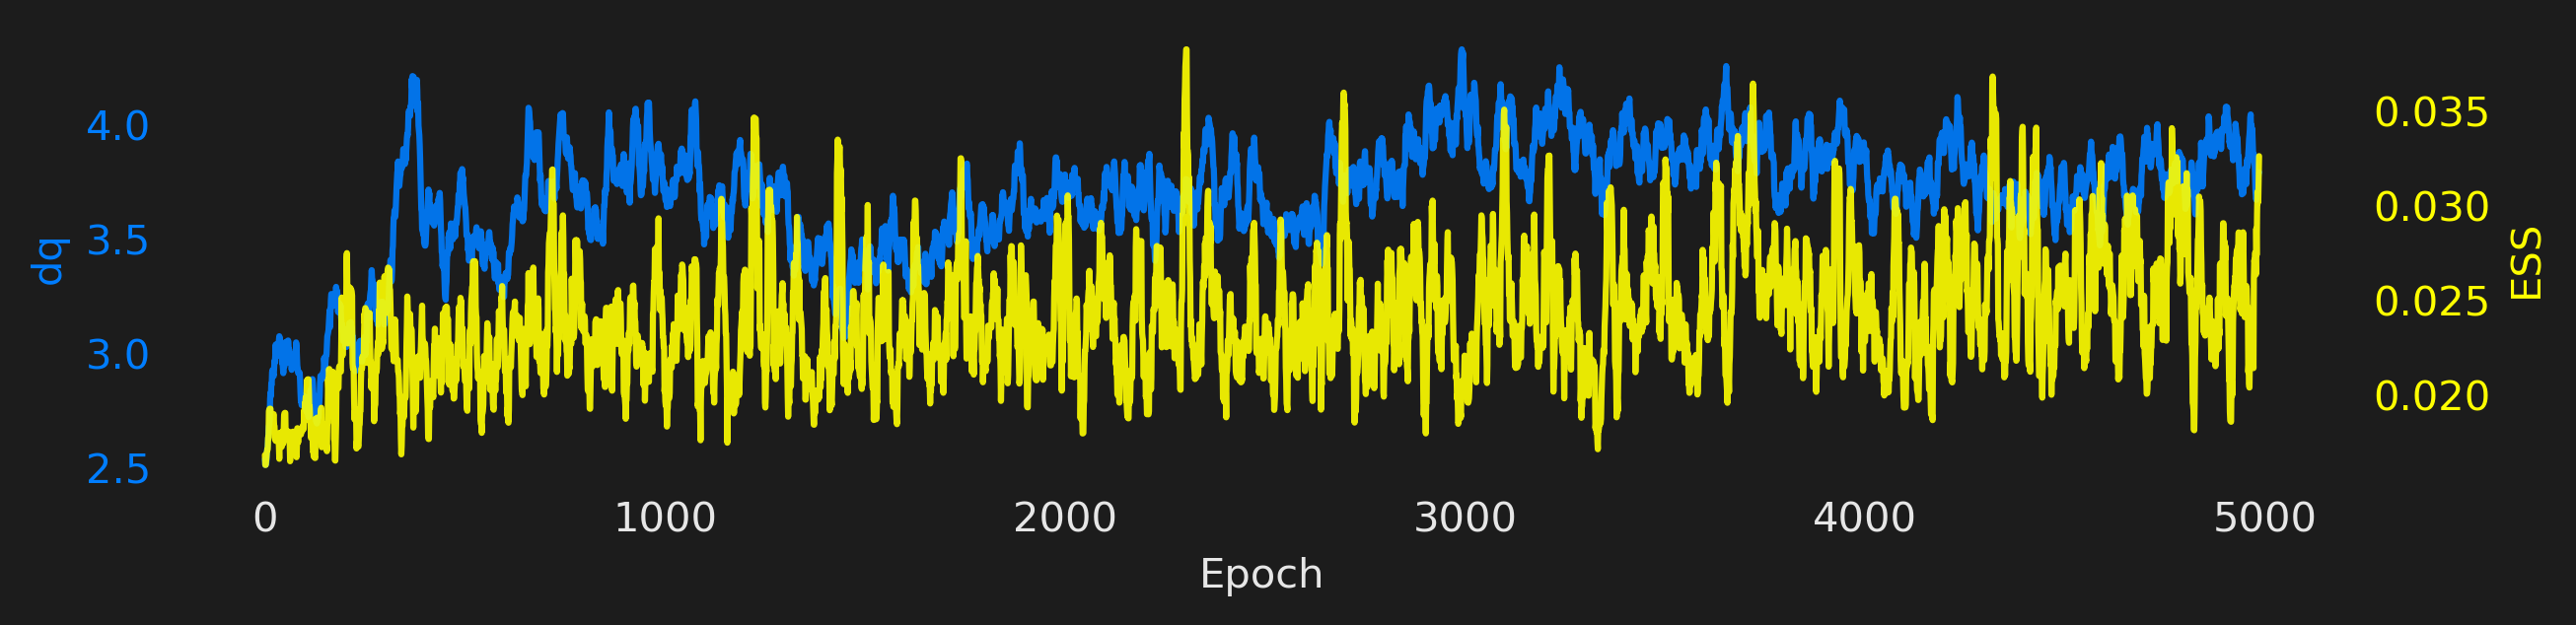

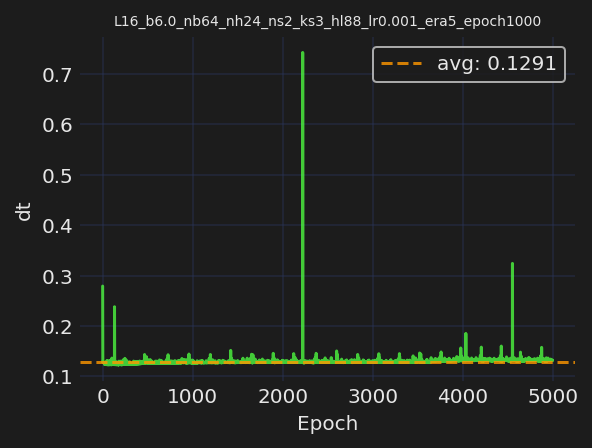

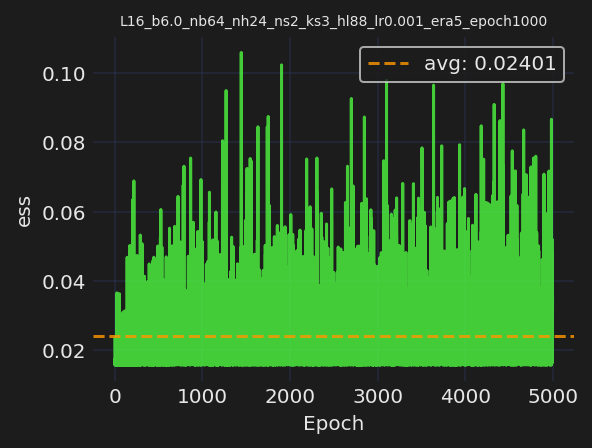

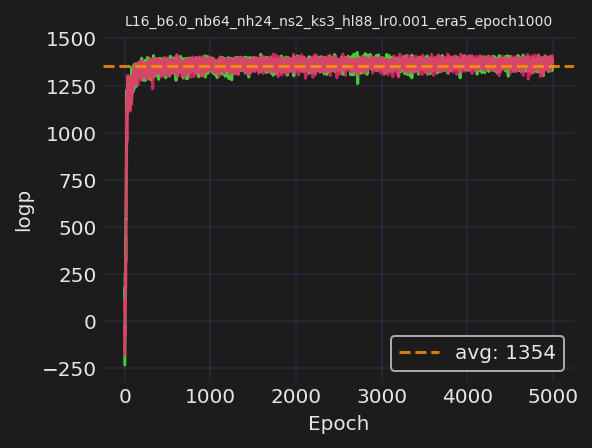

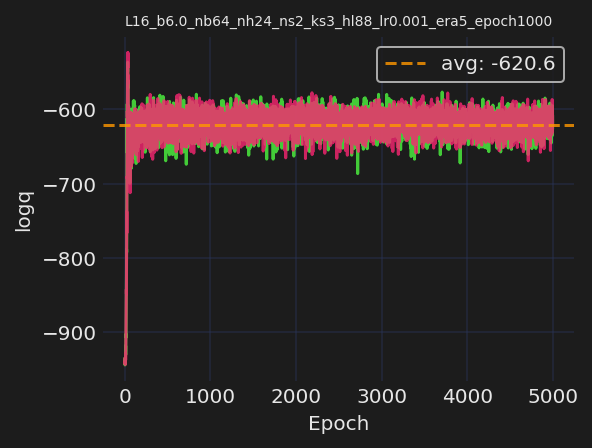

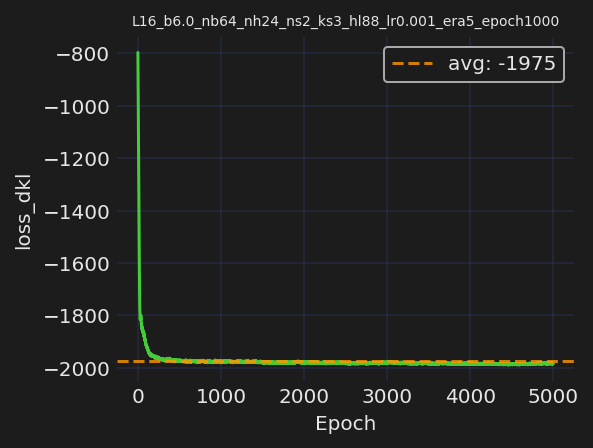

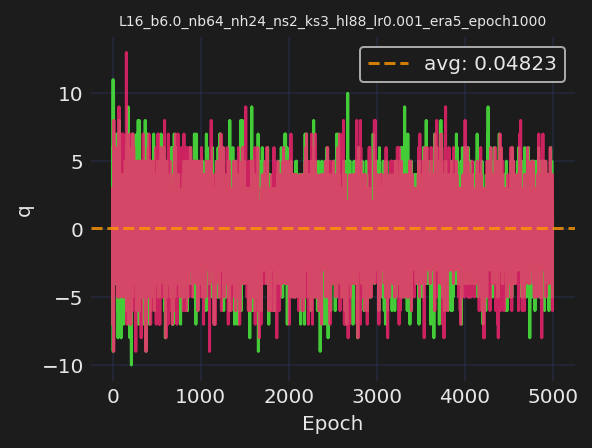

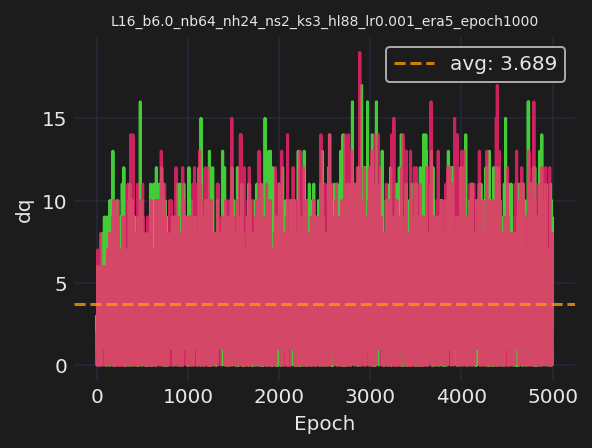

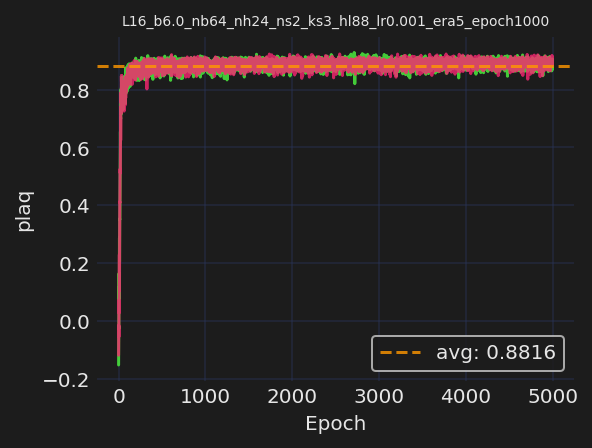

[12:22:38]  Saving train_history to ../../logs/models/lat16x16/beta6.0/L16_b6.0_nb64_nh24_ns2
            _ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-121057/train_history.z.

─────────────────────── Using trained model to generate 8192 samples ────────────────────────

[12:22:46]  Creating directory: ../../logs/models/lat16x16/beta6.0/L16_b6.0_nb64_nh24_ns2_ks3
            _hl88_lr0.001_era5_epoch1000/inference/plots

[12:22:46]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/inference/plots/q.png

            Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat16x16/bet
            a6.0/L16_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/inference/plots/dqsq.
            png

IndexError: index 0 is out of bounds for axis 0 with size 0

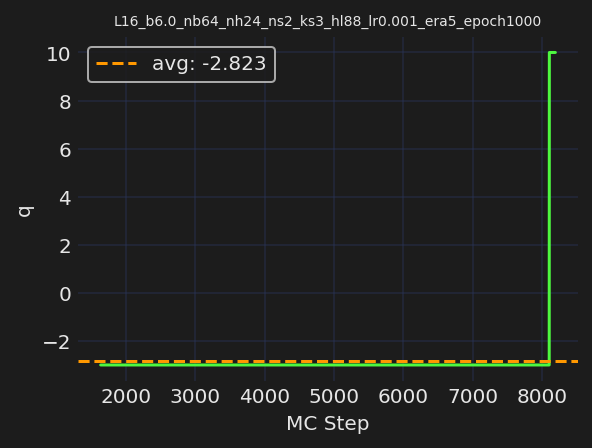

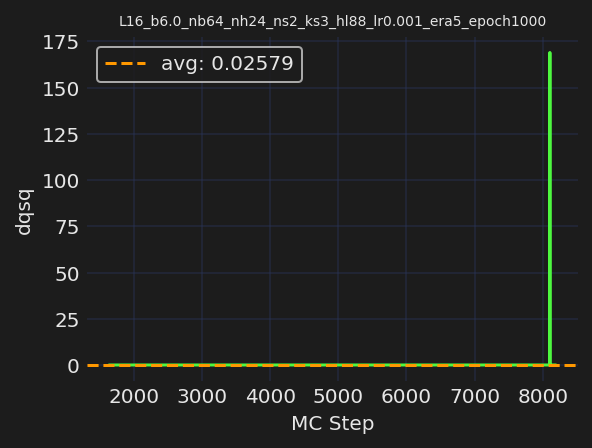

In [9]:
#logger.print_dict(configs, name='parsed_configs')
outputs = main(configs)

## Run HMC using `Param` defined above

───────────────────── Running HMC for 1 runs, of 1000 trajectories each ─────────────────────

[10:10:25]  Creating directory:                                                              
            ../../logs/hmc/lat8x8/beta6.0/t8x8_b6.0_n1000_t0.5_s5/2021-06-29-101025

[10:10:25]  Creating directory:                                                              
            ../../logs/hmc/lat8x8/beta6.0/t8x8_b6.0_n1000_t0.5_s5/2021-06-29-101025/plots

[10:10:25]  Param:                                                                           
            ----------------                                                                 
            beta=6.0                                                                         
            L=8                                                                              
            tau=0.5                                                                          
            nstep=5                                                                          
            ntraj=1000                                                                       
            nrun=1                                                                           
            nprint=100                                                                       
            seed=1331                                                                        
            randinit=False                                                                   
            nth_interop=2                                                                    
            nth=2                                                                            
            lat=[8, 8]                                                                       
            nd=2                                                                             
            shape=[2, 8, 8]                                                                  
            volume=64                                                                        
            dt=0.1                                                                           
            logdir=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/hmc/lat8x8/beta6.0/t8x8_b6.0_n
            1000_t0.5_s5

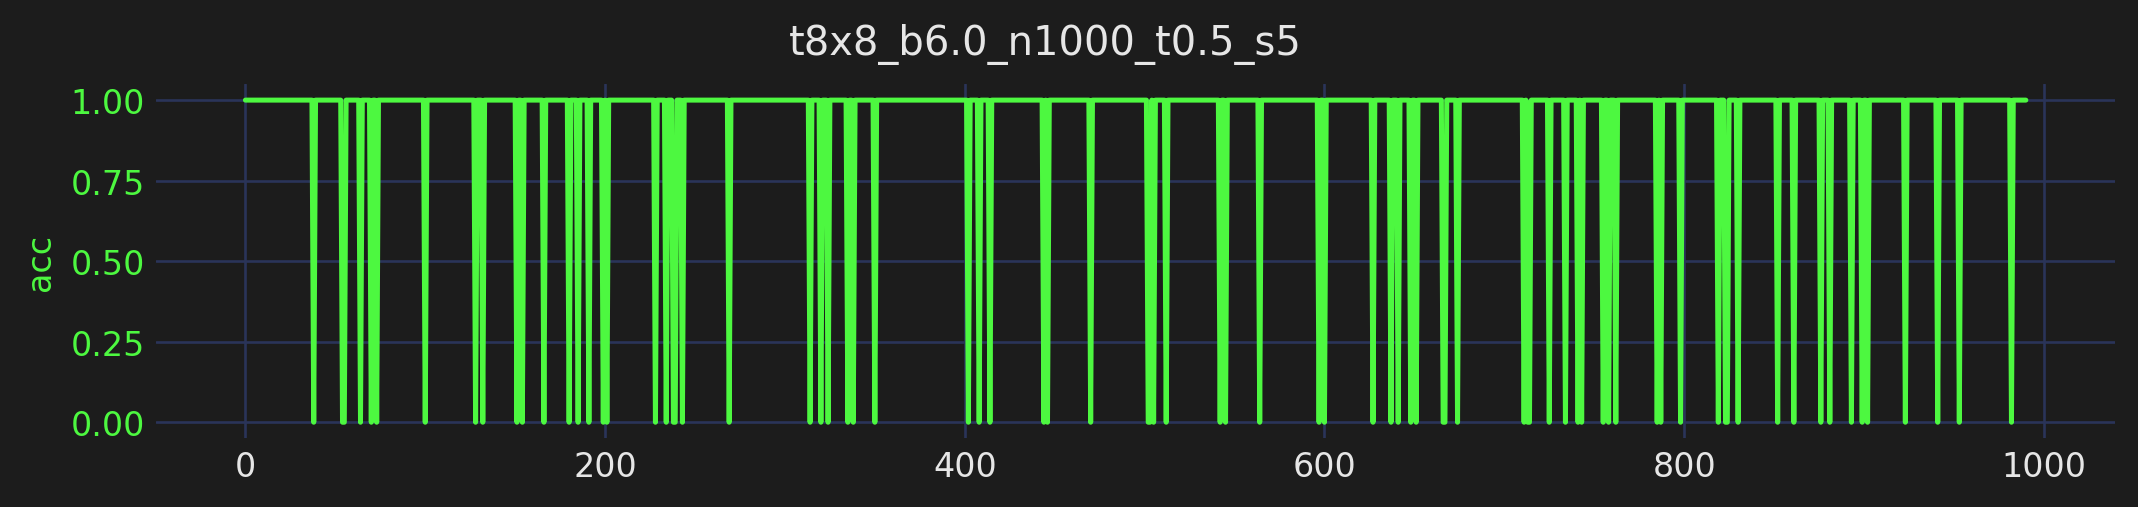

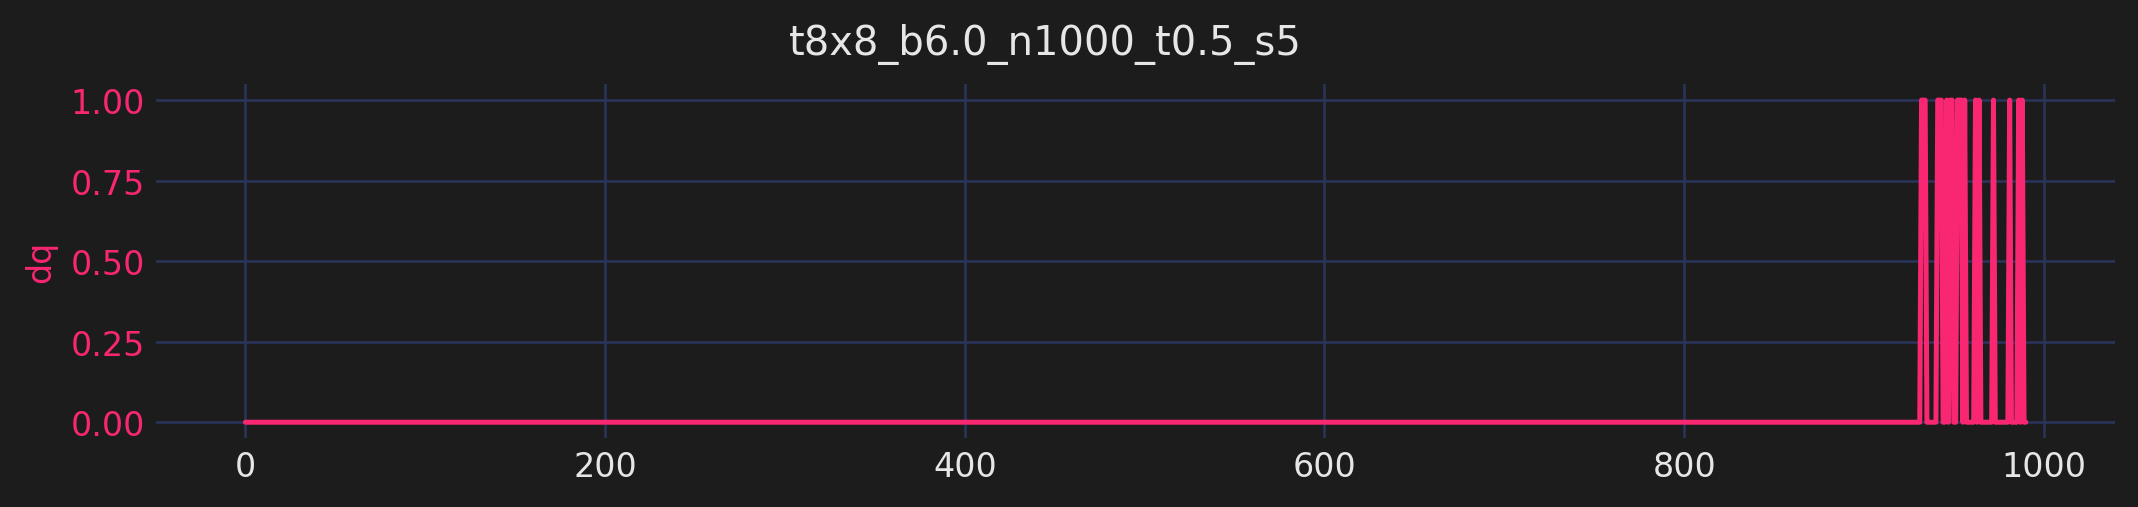

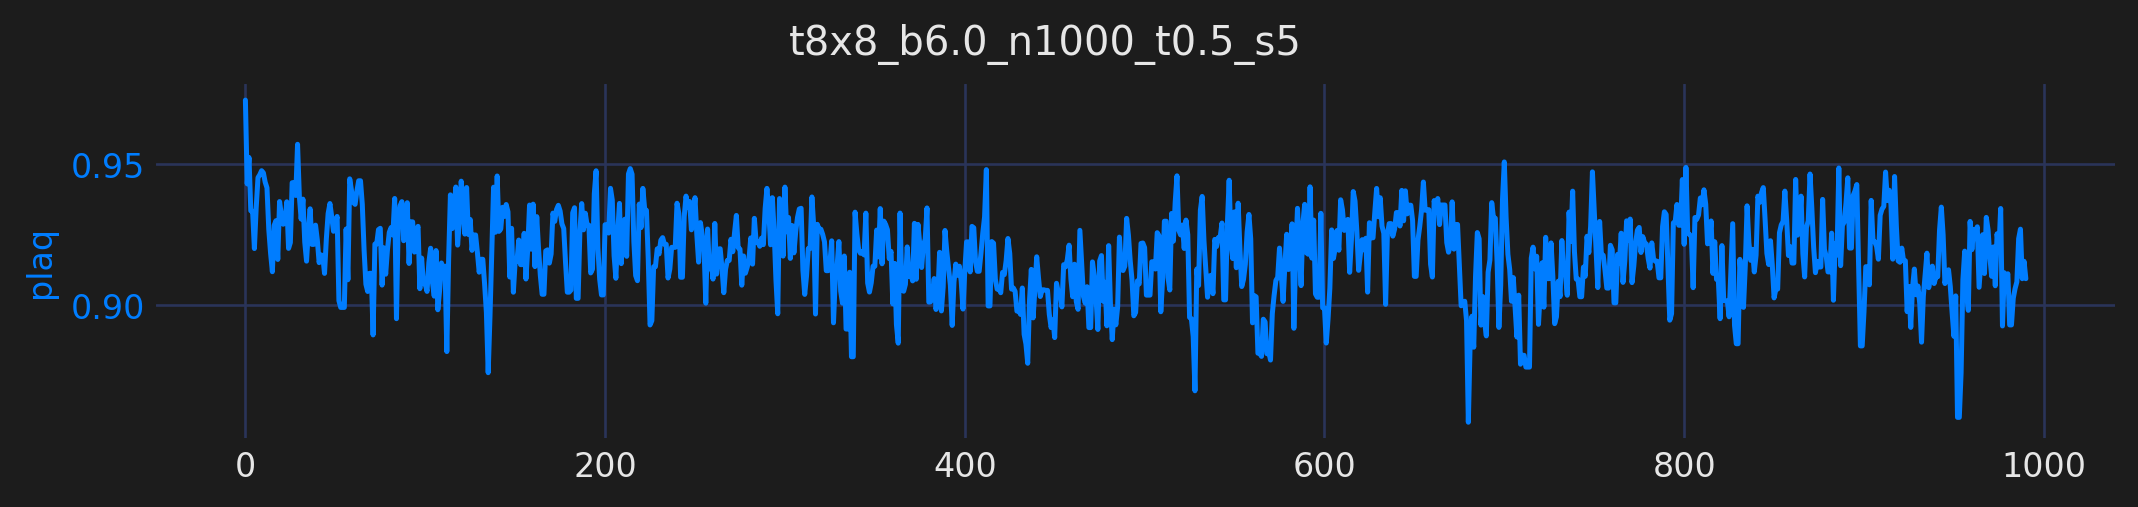

──────────────────────────────── RUN: 0, last took: 0 m 0 s ─────────────────────────────────

[10:10:26]  plaq=1.000 q=0.000

[10:10:27]  traj=2 dt=0.004 acc=1.000 dH=-0.462 plaq=0.943 q=0 dq=0.000

[10:10:31]  traj=102 dt=0.004 acc=1.000 dH=0.087 plaq=0.905 q=0 dq=0.000

[10:10:35]  traj=202 dt=0.004 acc=0.000 dH=0.331 plaq=0.928 q=0 dq=0.000

[10:10:39]  traj=302 dt=0.004 acc=1.000 dH=-0.228 plaq=0.926 q=0 dq=0.000

[10:10:44]  traj=402 dt=0.004 acc=1.000 dH=0.195 plaq=0.922 q=0 dq=0.000

[10:10:48]  traj=502 dt=0.004 acc=1.000 dH=-0.378 plaq=0.903 q=0 dq=0.000

[10:10:53]  traj=602 dt=0.004 acc=1.000 dH=-0.199 plaq=0.886 q=0 dq=0.000

[10:10:57]  traj=702 dt=0.004 acc=1.000 dH=-0.470 plaq=0.931 q=0 dq=0.000

[10:11:02]  traj=802 dt=0.004 acc=1.000 dH=0.329 plaq=0.949 q=0 dq=0.000

[10:11:07]  traj=902 dt=0.004 acc=1.000 dH=0.379 plaq=0.913 q=0 dq=0.000

[10:11:11]  Creating directory: ../../logs/hmc/lat8x8/beta6.0/t8x8_b6.0_n1000_t0.5_s5/2021-06
            -29-101025/plots/run0

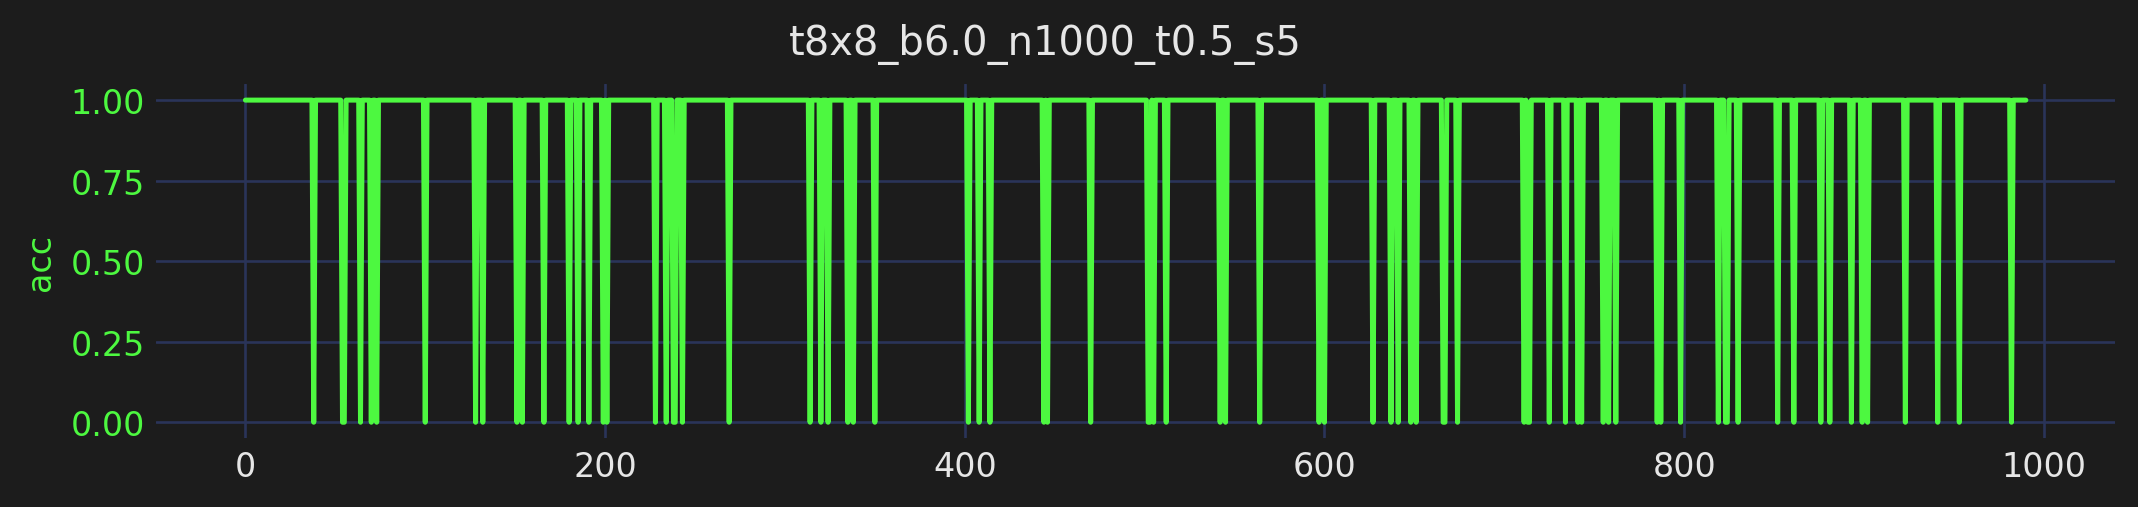

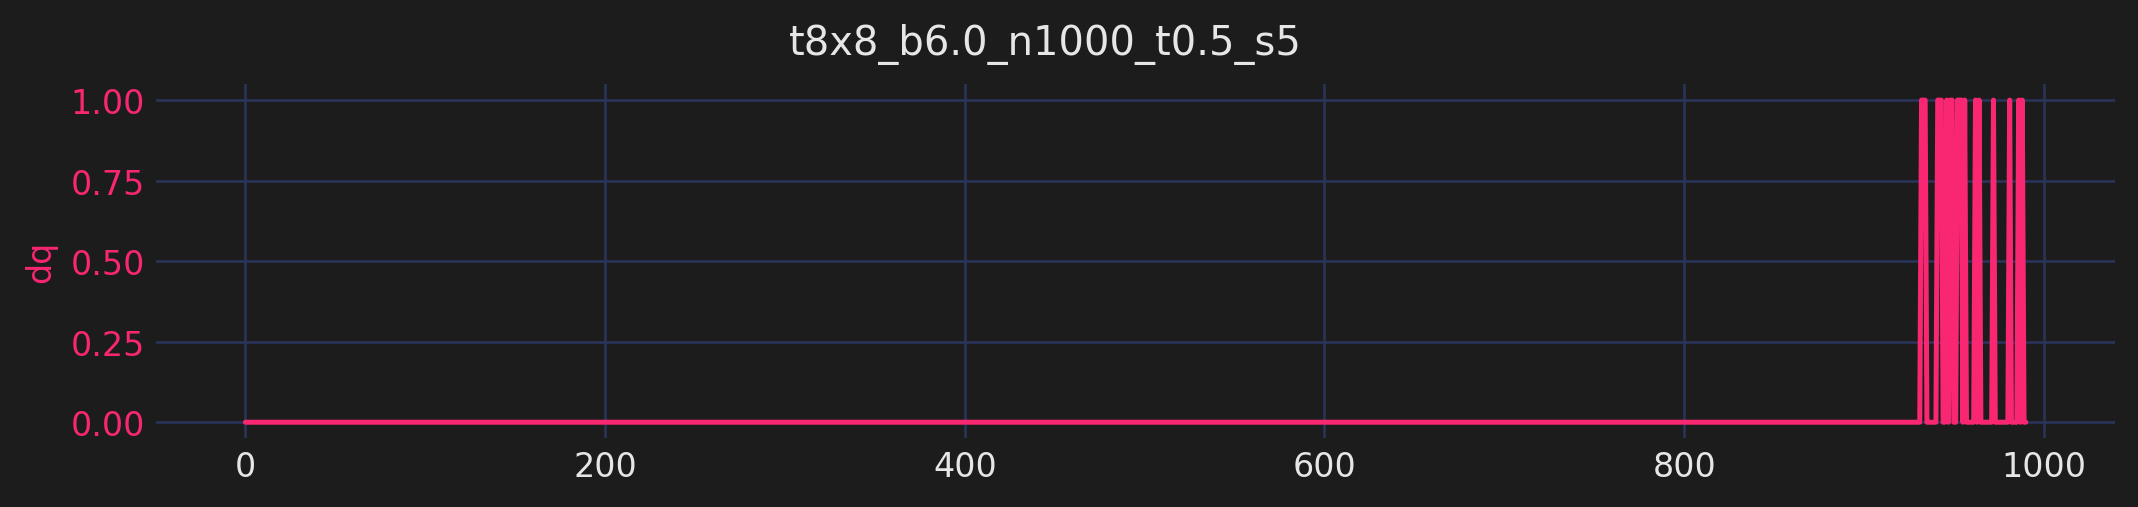

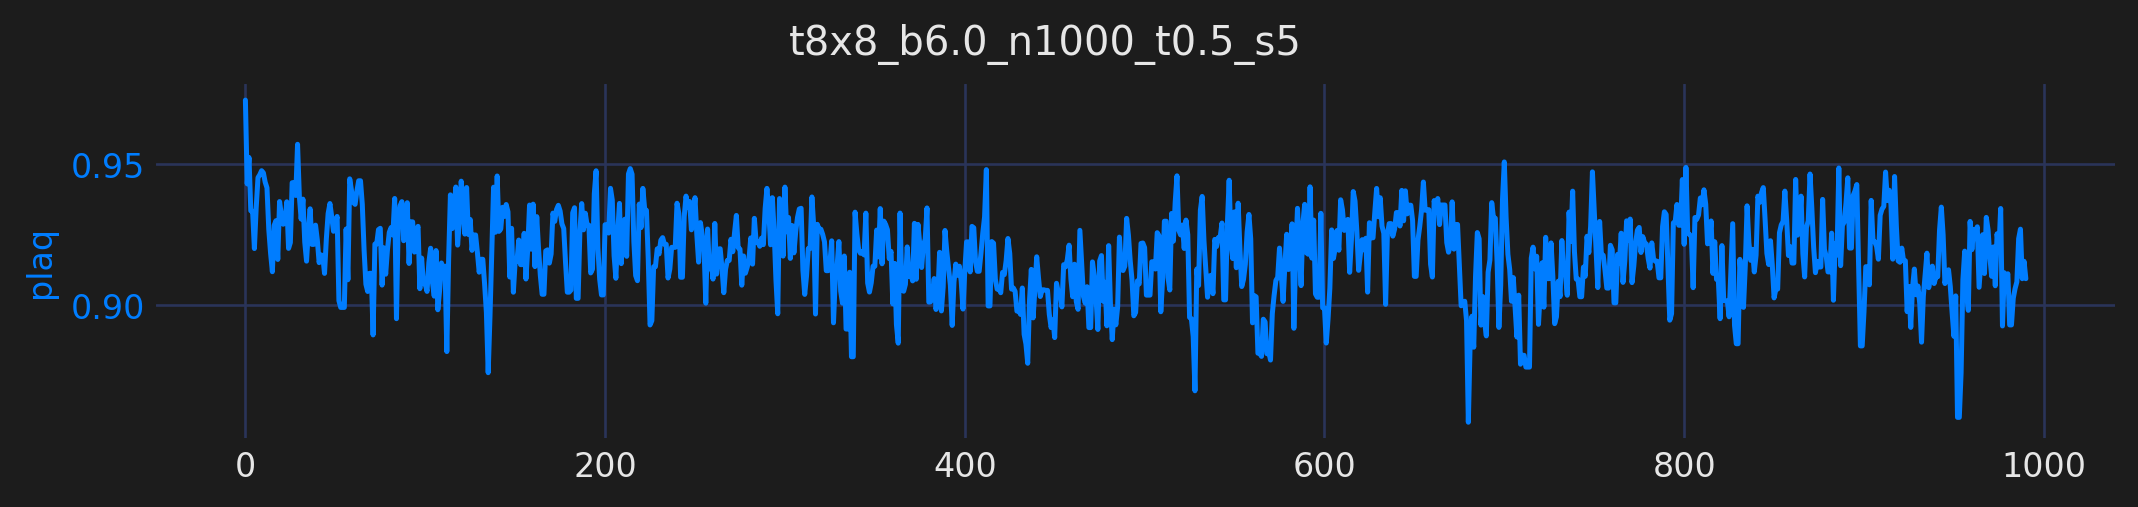

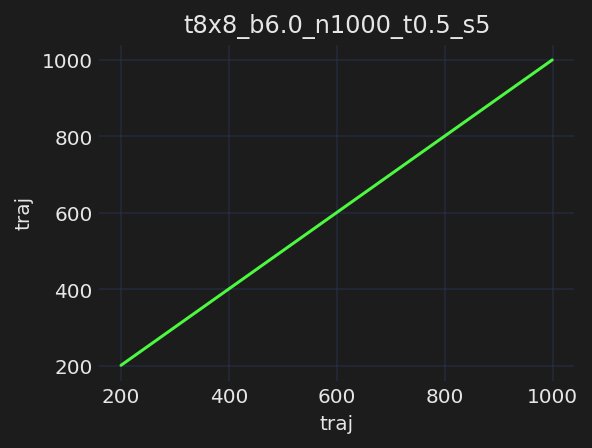

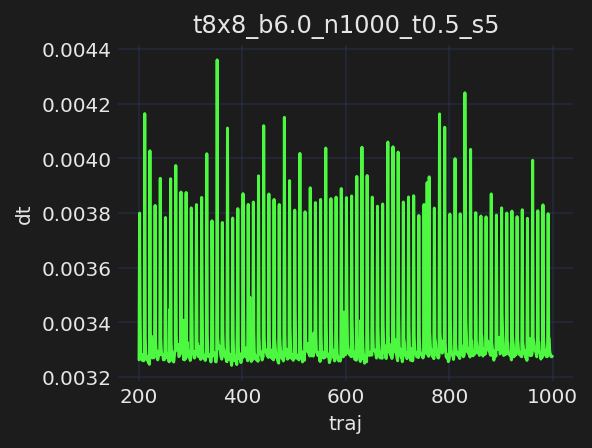

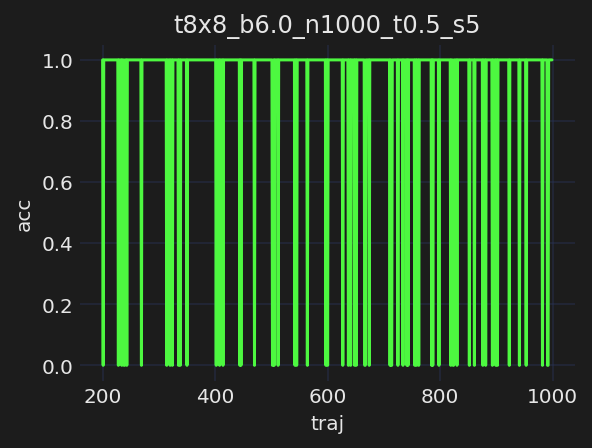

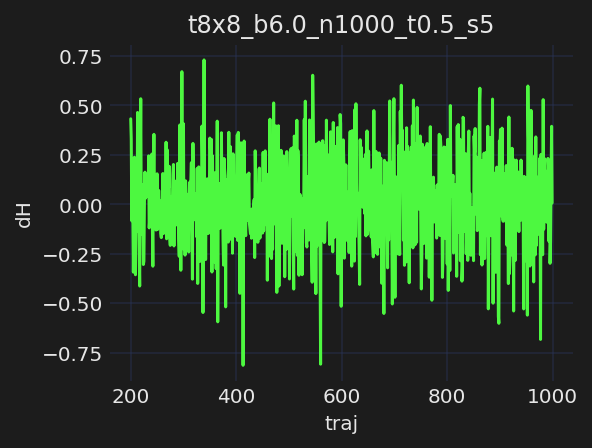

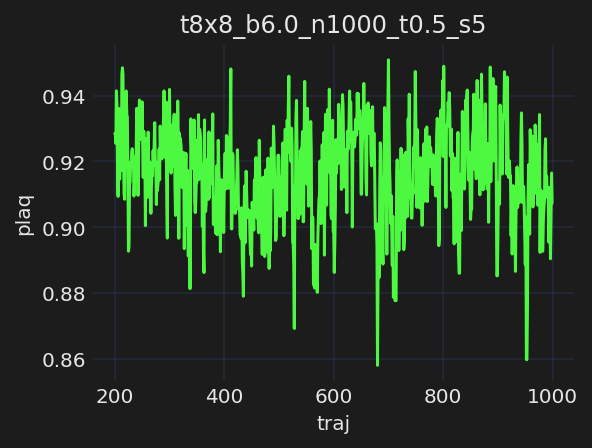

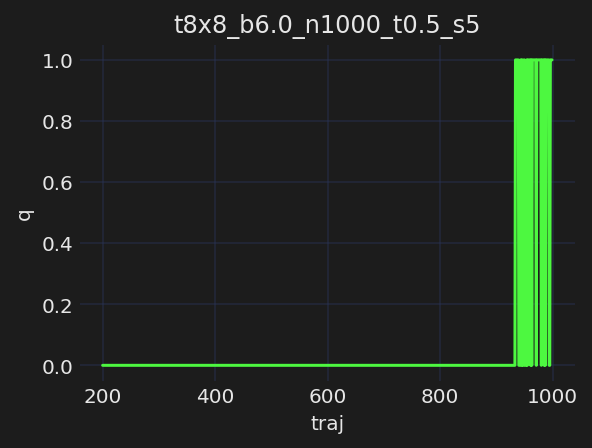

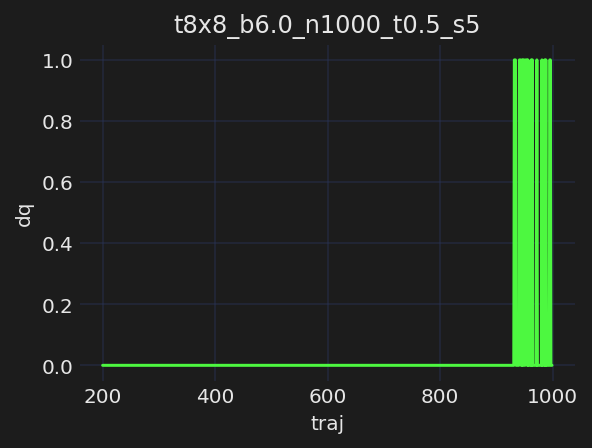

[10:11:13]  Run times: ['46.0624']

            Per trajectory: ['0.0461']

[10:11:13]  Saving hmc_histories to ../../logs/hmc/lat8x8/beta6.0/t8x8_b6.0_n1000_t0.5_s5/202
            1-06-29-101025/hmc_histories.z.

[10:11:14]  Saving hmc_fields_arr to ../../logs/hmc/lat8x8/beta6.0/t8x8_b6.0_n1000_t0.5_s5/20
            21-06-29-101025/hmc_fields_arr.z.

In [3]:
from fthmc.hmc import run_hmc

logger.rule(f'Running HMC for {param.nrun} runs, '
            f'of {param.ntraj} trajectories each')
hmc_fields, hmc_history = run_hmc(param, plot_metrics=True, figsize=(9, 2.))

## Train flow model using `TrainConfig` and `SchedulerConfig` defined above

─────────────────────── Training FlowModel for 5 eras and 1000 epochs ───────────────────────

[10:11:39]  Creating directory: ../../logs/models/lat8x8/beta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl
            88_lr0.001_era5_epoch1000/training/2021-06-29-101139

[10:11:39]  Creating directory: ../../logs/models/lat8x8/beta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl
            88_lr0.001_era5_epoch1000/training/2021-06-29-101139/plots

[10:11:39]  Creating directory: ../../logs/models/lat8x8/beta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl
            88_lr0.001_era5_epoch1000/training/2021-06-29-101139/checkpoints

[10:11:39]  Creating directory: ../../logs/models/lat8x8/beta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl
            88_lr0.001_era5_epoch1000/training/2021-06-29-101139/summaries

[10:11:41]  Writing summaries to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/summaries

            Scheduler created!

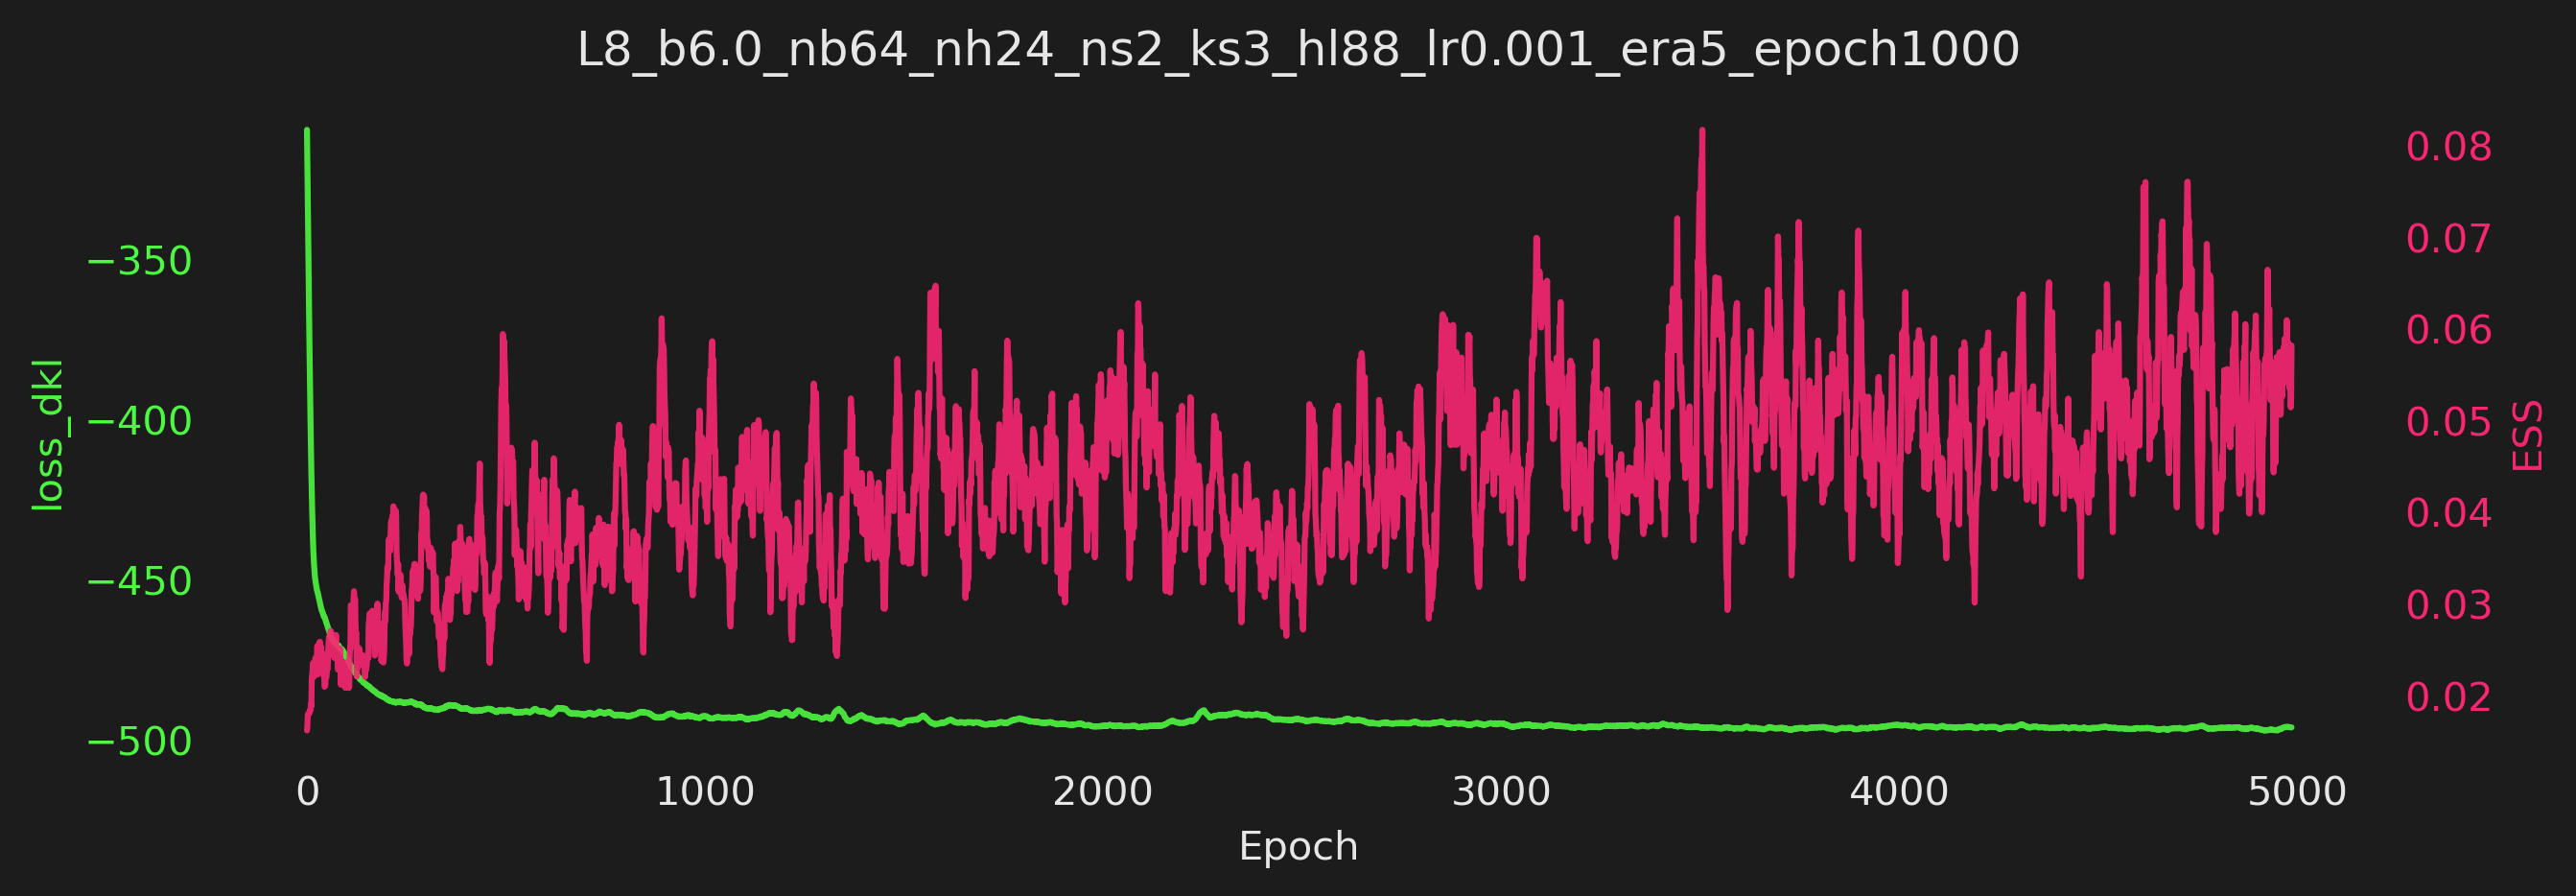

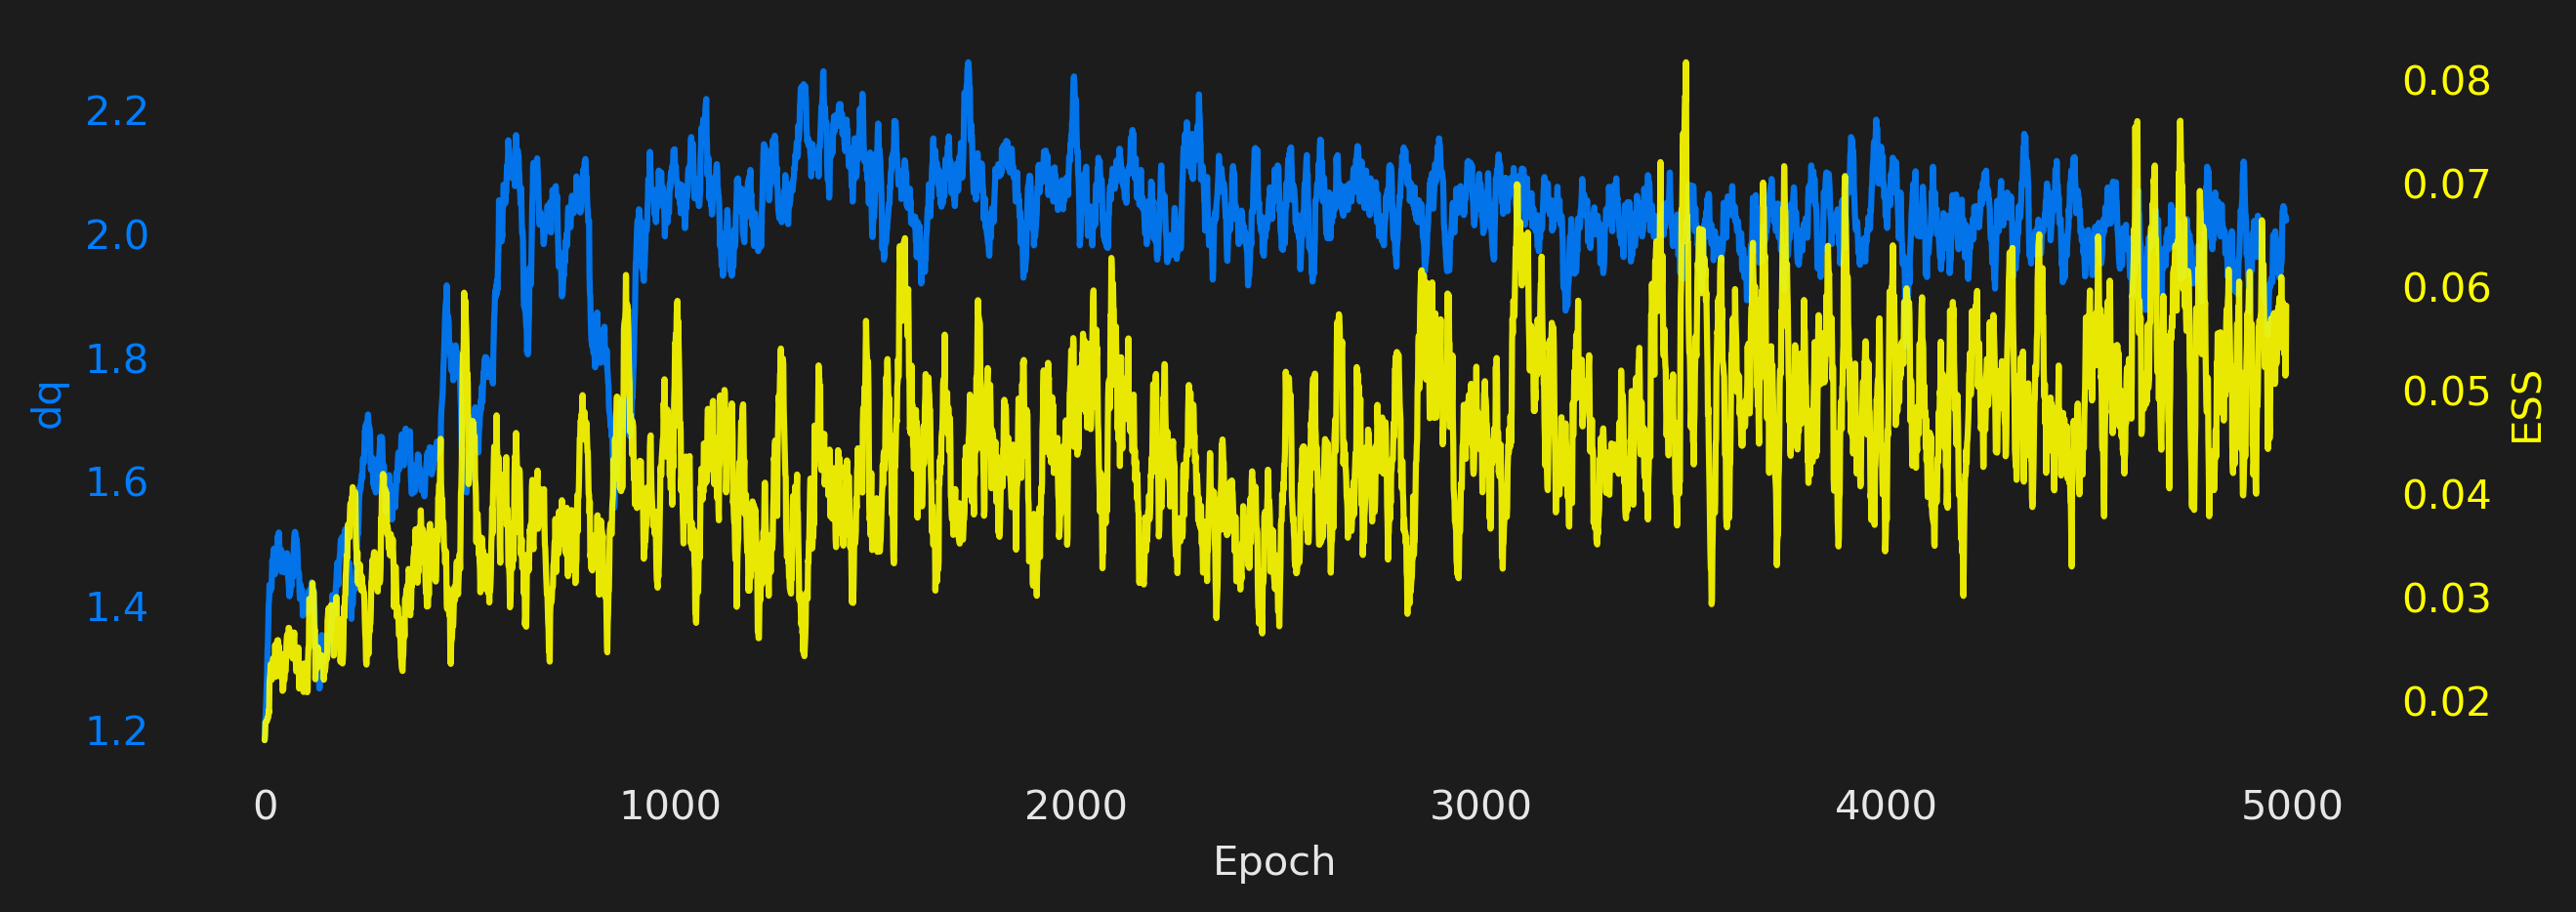

─────────────────────────────── ERA=0, last took: 0 min 0 sec ───────────────────────────────

[10:12:17]  epoch=250 dt=0.125 ess=0.053 loss_dkl=-488.719 dq=1.750 plaq=0.865

[10:12:51]  epoch=500 dt=0.125 ess=0.038 loss_dkl=-493.570 dq=1.297 plaq=0.887

[10:13:25]  epoch=750 dt=0.126 ess=0.039 loss_dkl=-493.044 dq=1.969 plaq=0.890

[10:13:59]  epoch=1000 dt=0.126 ess=0.020 loss_dkl=-492.677 dq=2.125 plaq=0.872

[10:14:00]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/checkpoints/ckpt-era0-epoch999.tar

───────────────────────────── ERA=1, last took: 2 min 18.35 sec ─────────────────────────────

Epoch  1177: reducing learning rate of group 0 to 9.5000e-04.


[10:14:34]  epoch=1250 dt=0.127 ess=0.018 loss_dkl=-491.098 dq=2.047 plaq=0.879

Epoch  1378: reducing learning rate of group 0 to 9.0250e-04.


[10:15:08]  epoch=1500 dt=0.127 ess=0.016 loss_dkl=-496.048 dq=2.062 plaq=0.894

Epoch  1702: reducing learning rate of group 0 to 8.5737e-04.


[10:15:43]  epoch=1750 dt=0.127 ess=0.029 loss_dkl=-494.685 dq=1.984 plaq=0.883

Epoch  1917: reducing learning rate of group 0 to 8.1451e-04.


[10:16:18]  epoch=2000 dt=0.128 ess=0.094 loss_dkl=-496.612 dq=2.062 plaq=0.897

[10:16:18]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/checkpoints/ckpt-era1-epoch999.tar

───────────────────────────── ERA=2, last took: 2 min 18.49 sec ─────────────────────────────

Epoch  2234: reducing learning rate of group 0 to 7.7378e-04.


[10:16:53]  epoch=2250 dt=0.144 ess=0.017 loss_dkl=-491.180 dq=1.734 plaq=0.892

Epoch  2435: reducing learning rate of group 0 to 7.3509e-04.


[10:17:28]  epoch=2500 dt=0.128 ess=0.019 loss_dkl=-493.846 dq=2.109 plaq=0.888

Epoch  2636: reducing learning rate of group 0 to 6.9834e-04.


[10:18:03]  epoch=2750 dt=0.129 ess=0.049 loss_dkl=-495.610 dq=1.969 plaq=0.895

Epoch  2837: reducing learning rate of group 0 to 6.6342e-04.


[10:18:38]  epoch=3000 dt=0.129 ess=0.038 loss_dkl=-496.840 dq=2.109 plaq=0.895

[10:18:39]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/checkpoints/ckpt-era2-epoch999.tar

───────────────────────────── ERA=3, last took: 2 min 20.31 sec ─────────────────────────────

Epoch  3038: reducing learning rate of group 0 to 6.3025e-04.


[10:19:14]  epoch=3250 dt=0.129 ess=0.051 loss_dkl=-496.825 dq=1.969 plaq=0.895

Epoch  3449: reducing learning rate of group 0 to 5.9874e-04.


[10:19:49]  epoch=3500 dt=0.132 ess=0.020 loss_dkl=-496.433 dq=1.766 plaq=0.886

[10:20:25]  epoch=3750 dt=0.129 ess=0.058 loss_dkl=-495.882 dq=2.047 plaq=0.890

Epoch  3832: reducing learning rate of group 0 to 5.6880e-04.


[10:21:00]  epoch=4000 dt=0.129 ess=0.040 loss_dkl=-496.461 dq=2.484 plaq=0.895

[10:21:01]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/checkpoints/ckpt-era3-epoch999.tar

───────────────────────────── ERA=4, last took: 2 min 21.95 sec ─────────────────────────────

Epoch  4033: reducing learning rate of group 0 to 5.4036e-04.
Epoch  4234: reducing learning rate of group 0 to 5.1334e-04.


[10:21:36]  epoch=4250 dt=0.130 ess=0.102 loss_dkl=-496.144 dq=2.109 plaq=0.892

Epoch  4435: reducing learning rate of group 0 to 4.8767e-04.


[10:22:12]  epoch=4500 dt=0.129 ess=0.050 loss_dkl=-496.546 dq=1.688 plaq=0.889

Epoch  4636: reducing learning rate of group 0 to 4.6329e-04.


[10:22:47]  epoch=4750 dt=0.130 ess=0.052 loss_dkl=-497.012 dq=1.891 plaq=0.896

Epoch  4837: reducing learning rate of group 0 to 4.4013e-04.


[10:23:23]  epoch=5000 dt=0.130 ess=0.121 loss_dkl=-496.306 dq=1.891 plaq=0.894

[10:23:24]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/checkpoints/ckpt-era4-epoch999.tar

            Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/checkpoints/ckpt-era5-epoch1001.tar

[10:23:24]  Saving live plots to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/b
            eta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-
            101139/plots

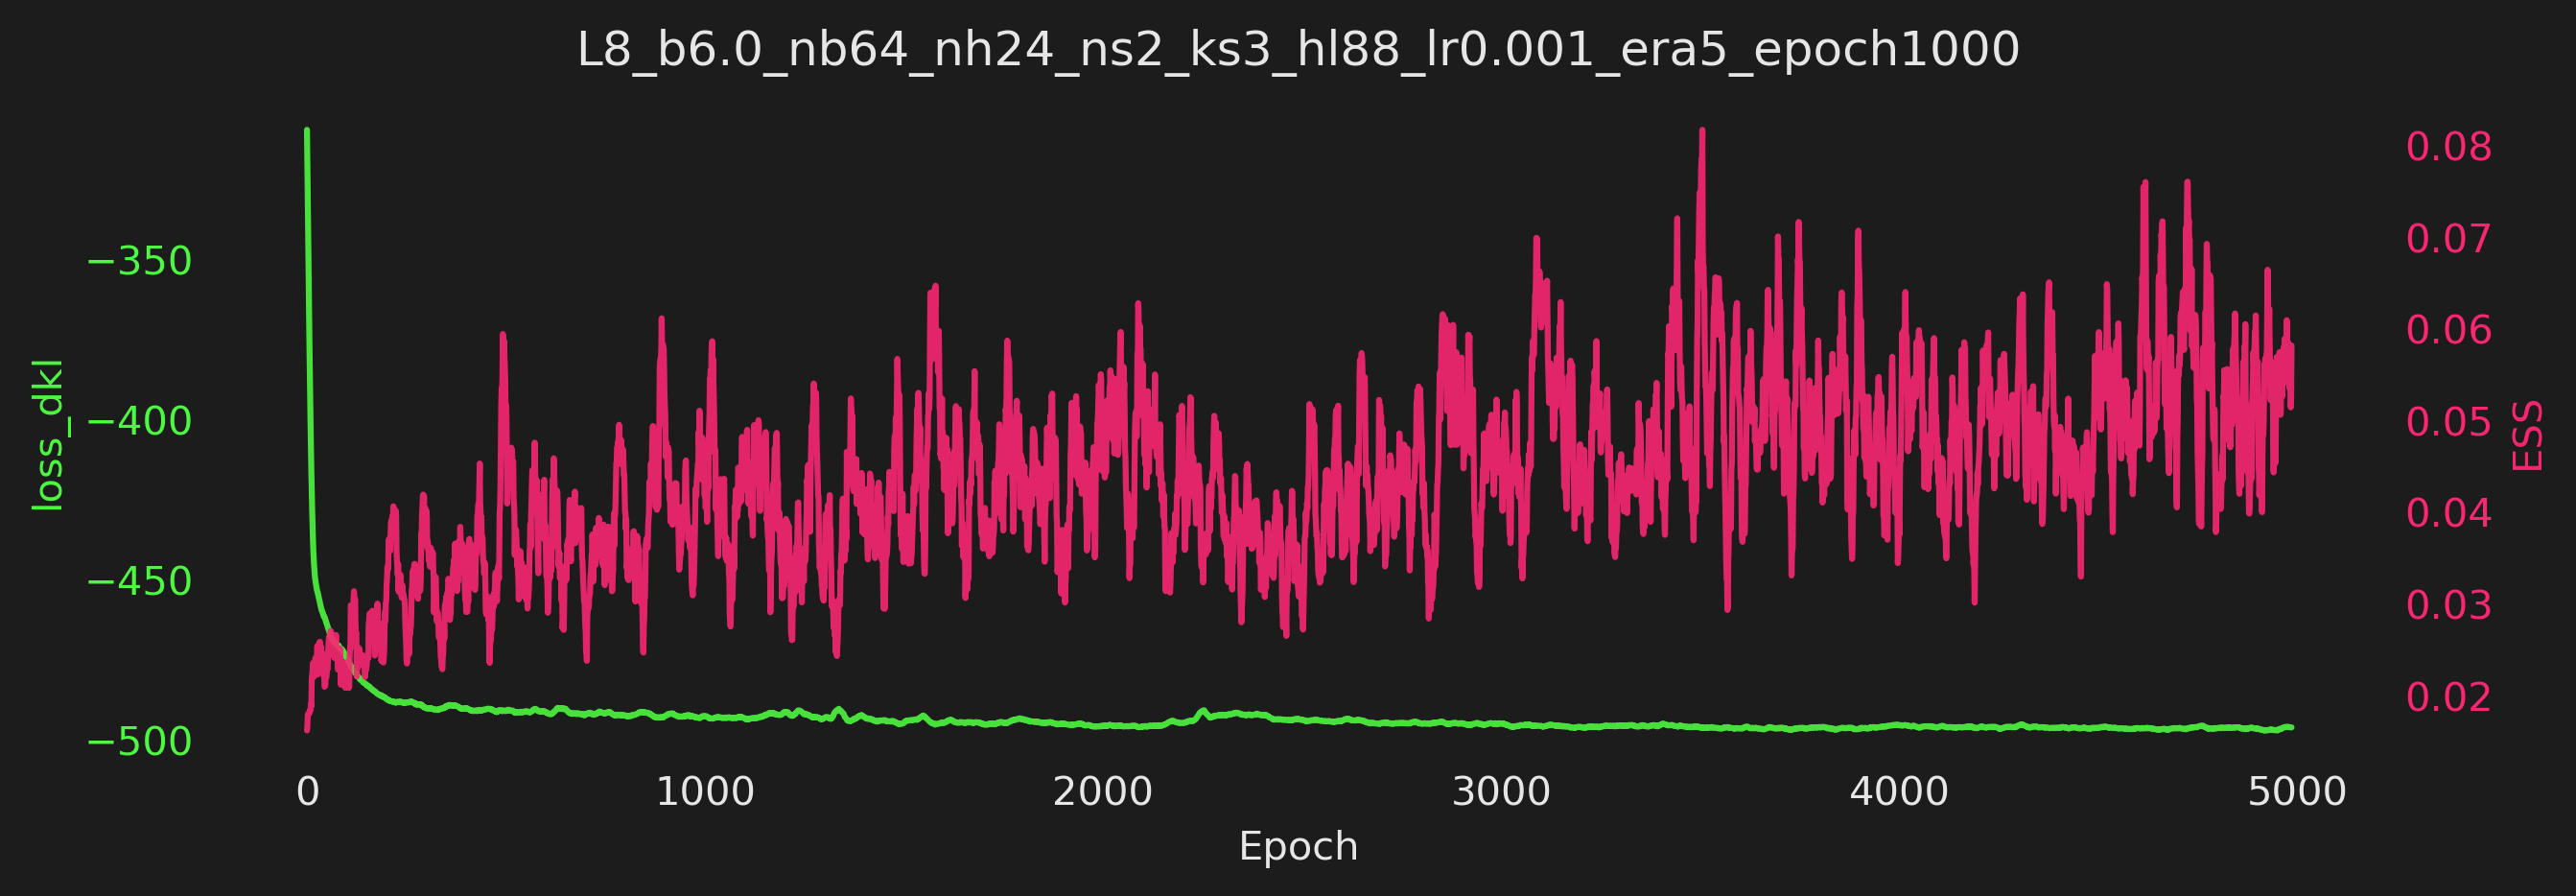

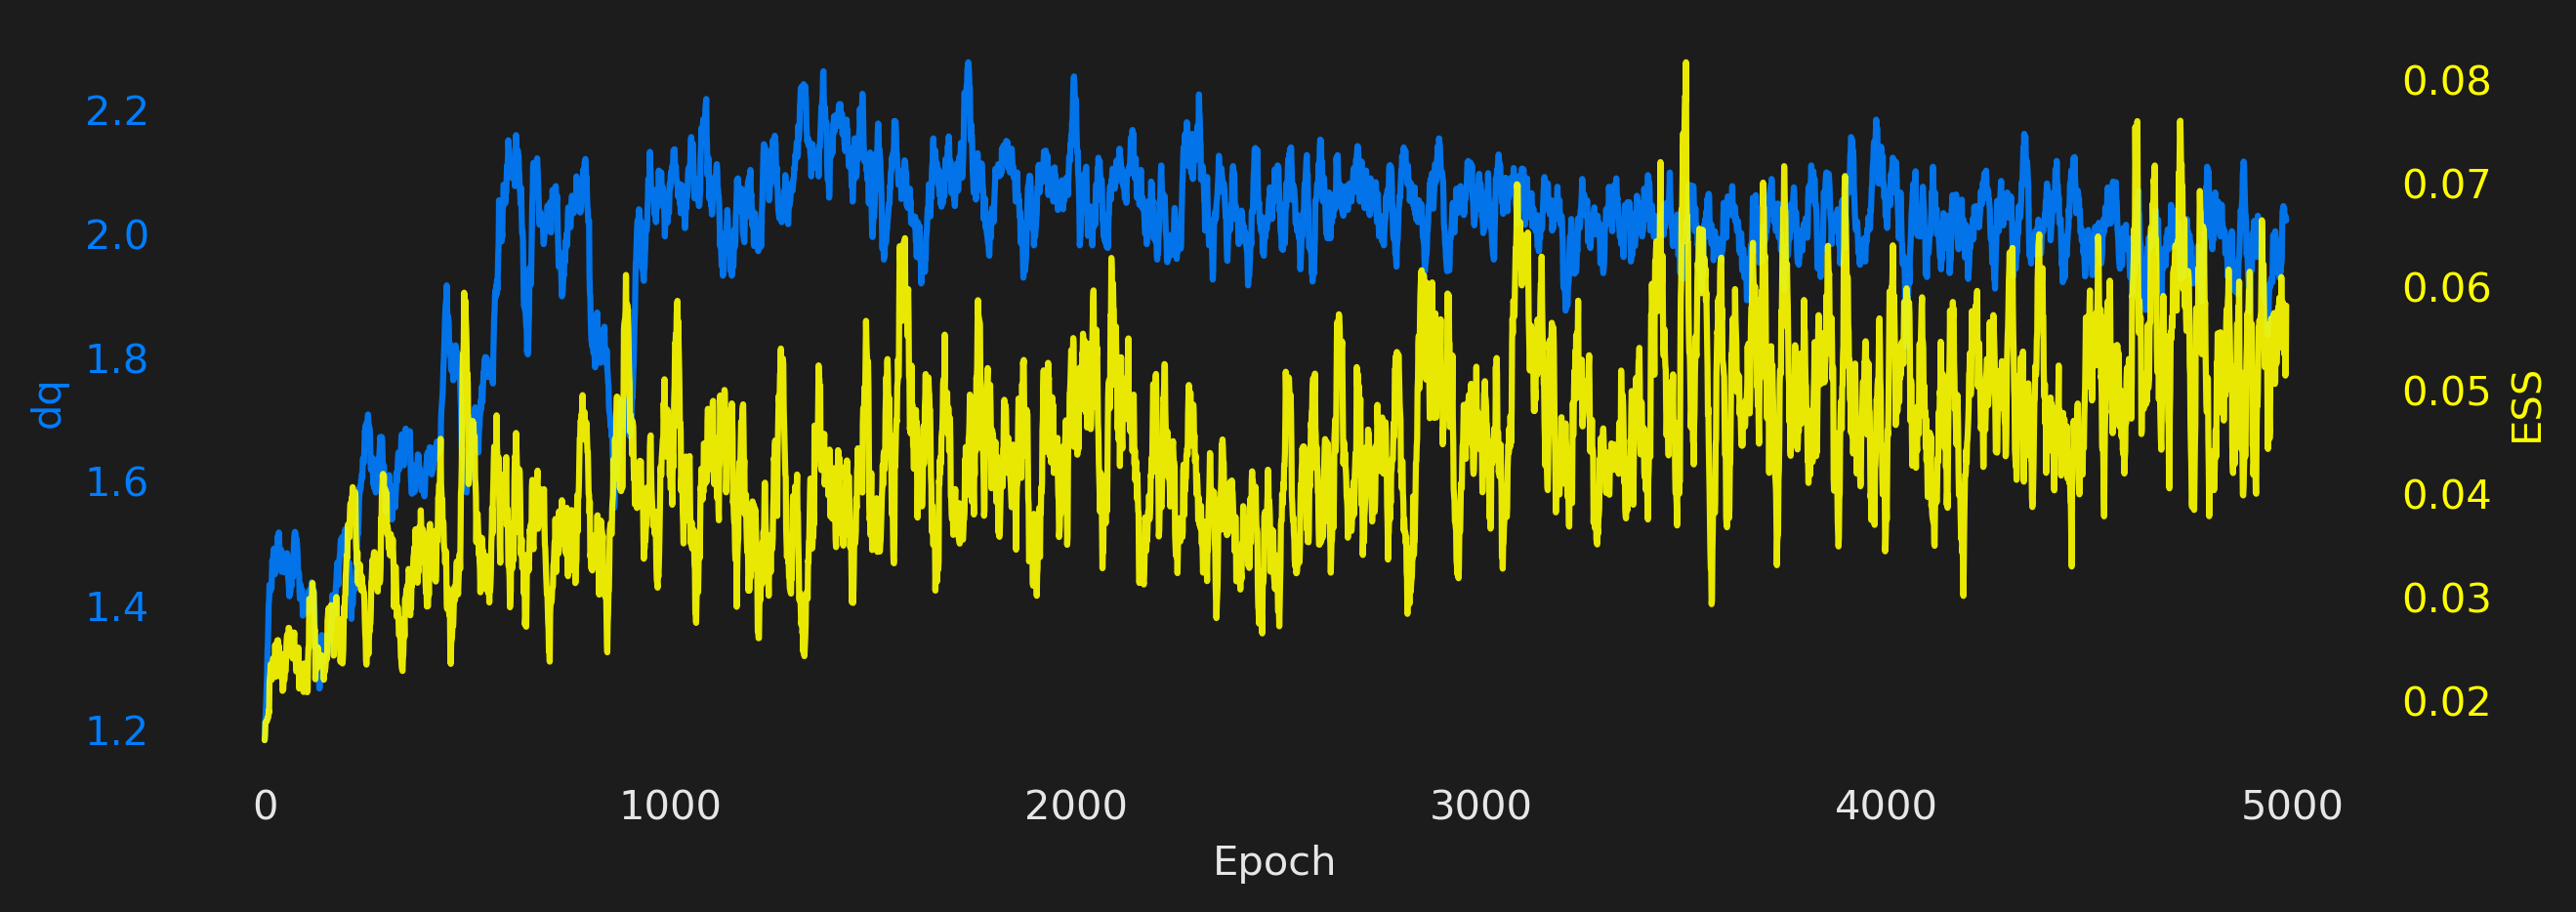

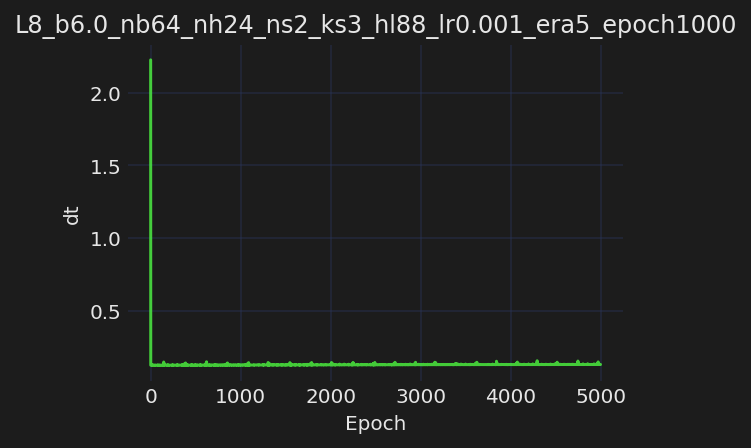

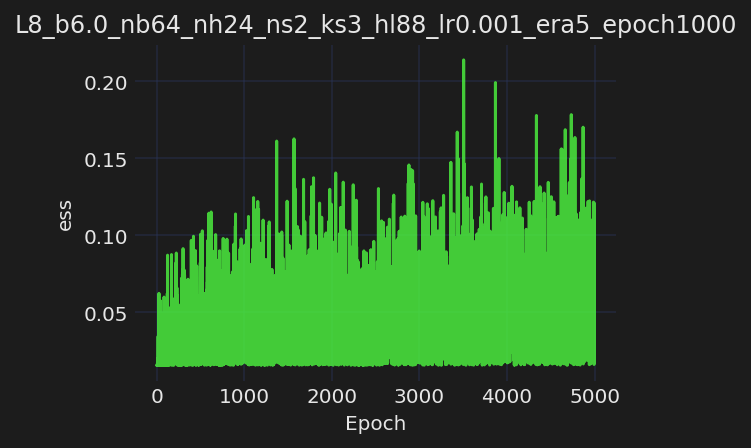

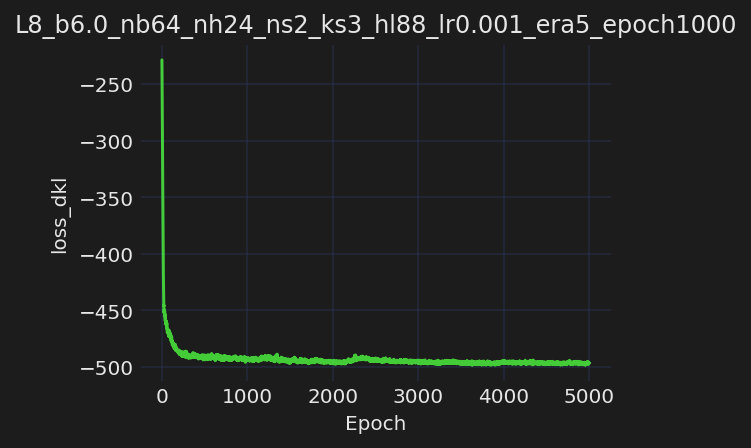

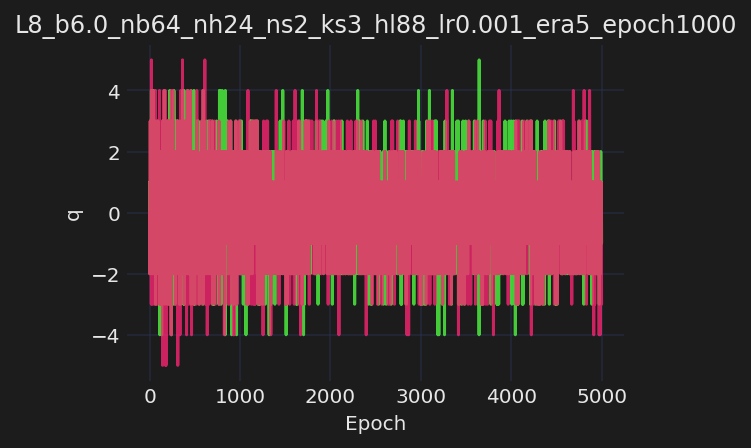

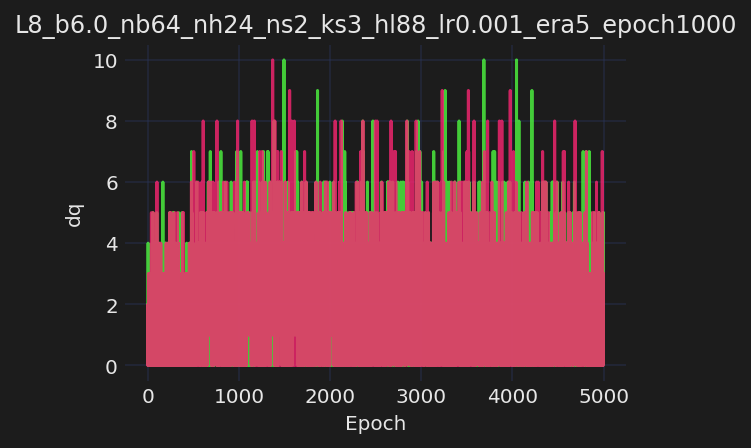

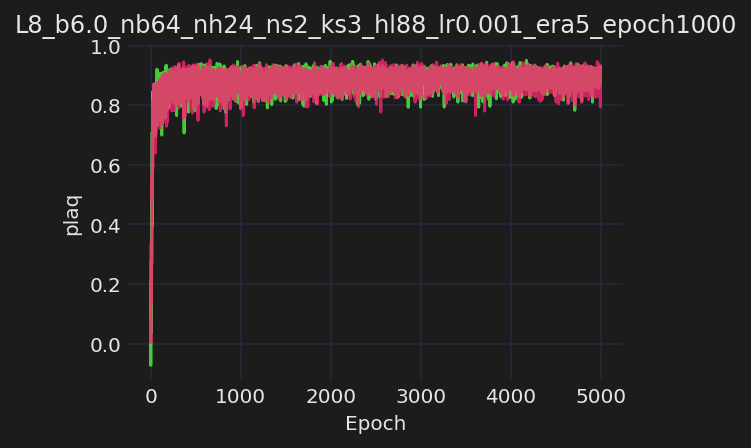

[10:23:28]  Saving train_history to ../../logs/models/lat8x8/beta6.0/L8_b6.0_nb64_nh24_ns2_ks
            3_hl88_lr0.001_era5_epoch1000/training/2021-06-29-101139/train_history.z.

In [4]:
from fthmc.train import train

logger.rule(f'Training FlowModel for {train_config.n_era} '
            f'eras and {train_config.n_epoch} epochs')
train_outputs = train(config=train_config,
                      model=None,  # train_outputs['model'],
                      pre_model=None,  # train_outputs['model'],
                      dpi=150,
                      figsize=(9, 3.),
                      scheduler_config=scheduler_config)

In [30]:
from dataclasses import asdict
from fthmc.utils.logger import print_dict

configs = {
    'param': param,
    'train_config': train_config,
    'scheduler_config': scheduler_config,
}

dstr = print_dict(configs, name='configs')#, name=configs)
logger.log(dstr)


[08:26:07]  configs                                                                          
            -------                                                                          
              param                                                                          
              -----                                                                          
              beta=5.0                                                                       
              L=8                                                                            
              tau=0.5                                                                        
              nstep=5                                                                        
              ntraj=1000                                                                     
              nrun=1                                                                         
              nprint=100                                                                     
              seed=1331                                                                      
              randinit=False                                                                 
              nth_interop=2                                                                  
              nth=2                                                                          
              train_config                                                                   
              ------------                                                                   
              L=8                                                                            
              beta=5.0                                                                       
              restore=False                                                                  
              n_era=5                                                                        
              n_epoch=1000                                                                   
              batch_size=64                                                                  
              base_lr=0.001                                                                  
              n_s_nets=2                                                                     
              n_layers=16                                                                    
              kernel_size=3                                                                  
              with_force=False                                                               
              print_freq=250                                                                 
              plot_freq=50                                                                   
              log_freq=50                                                                    
              hidden_sizes=[8, 8]                                                            
              scheduler_config                                                               
              ----------------                                                               
              factor=0.95                                                                    
              mode=min                                                                       
              patience=200                                                                   
              threshold=0.0001                                                               
              threshold_mode=rel                                                             
              cooldown=0                                                                     
              min_lr=5e-06                                                                   
              verbose=True

## Run inference on trained model and evaluate / plot metrics

──────────────────── Running inference on trained model for 8192 samples ────────────────────

/lus/grand/projects/DLHMC/nftqcd/fthmc/fthmc/utils/samplers.py:184: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(val)


[10:26:48]  Creating directory: ../../logs/models/lat8x8/beta6.0/L8_b6.0_nb64_nh24_ns2_ks3_hl
            88_lr0.001_era5_epoch1000/inference/plots

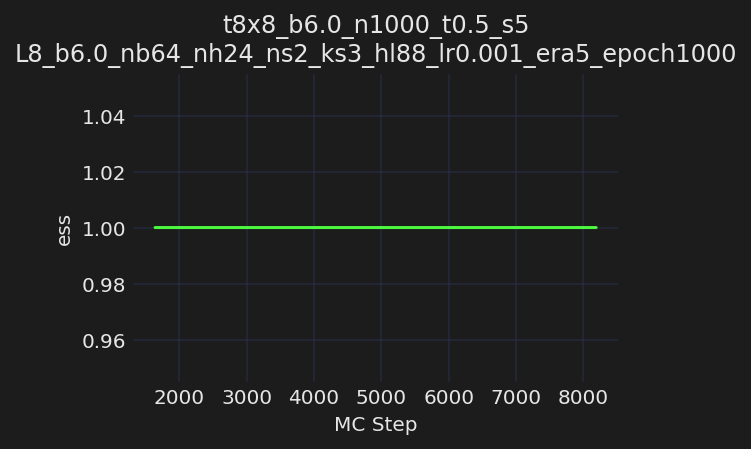

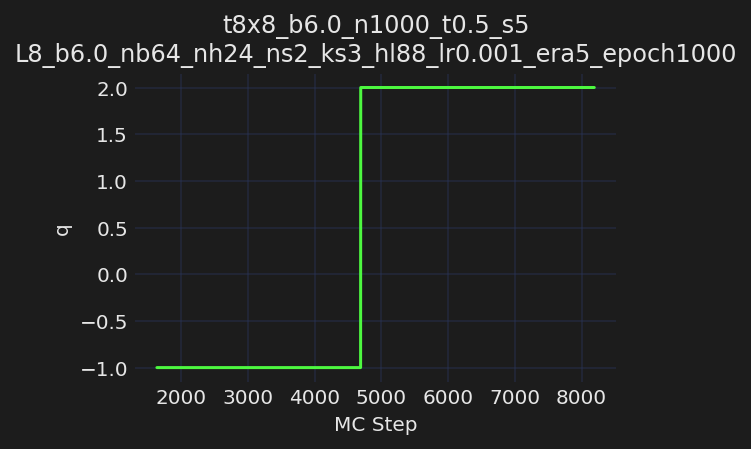

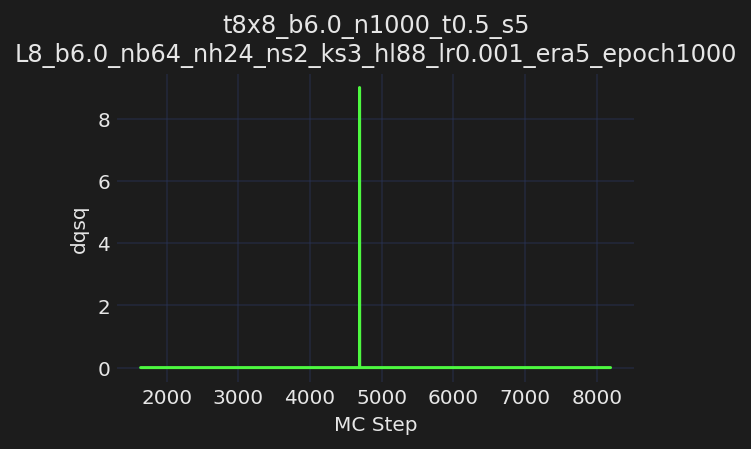

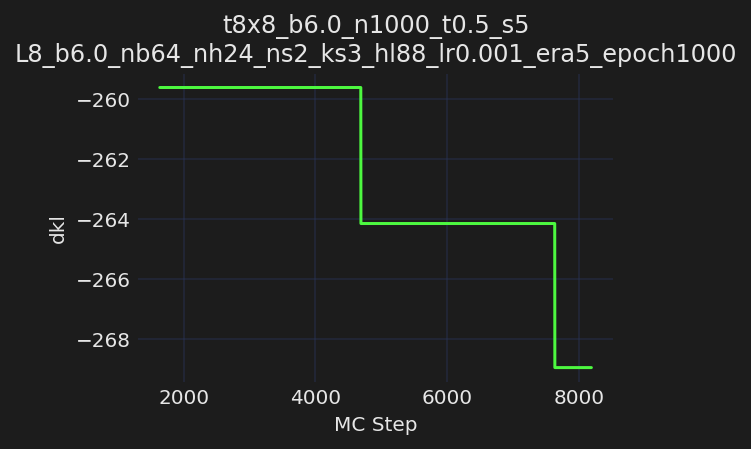

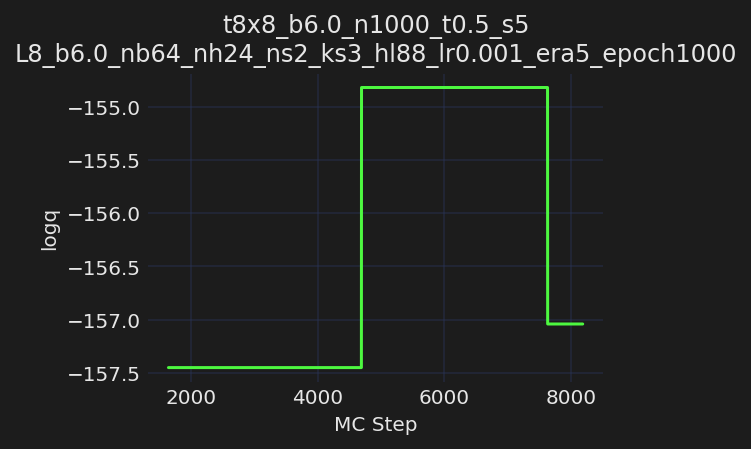

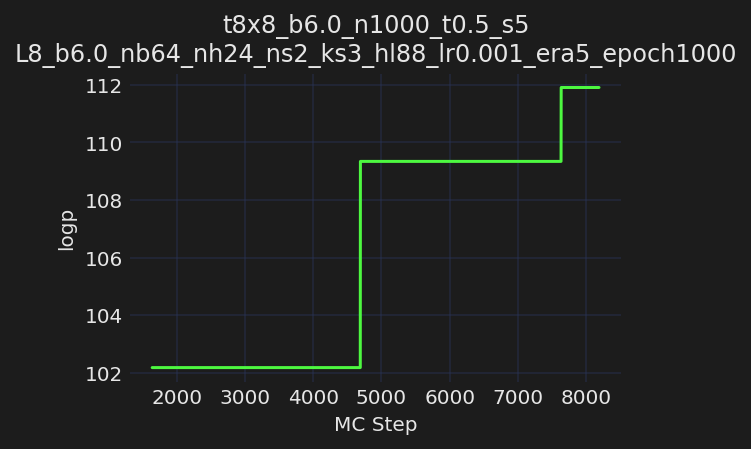

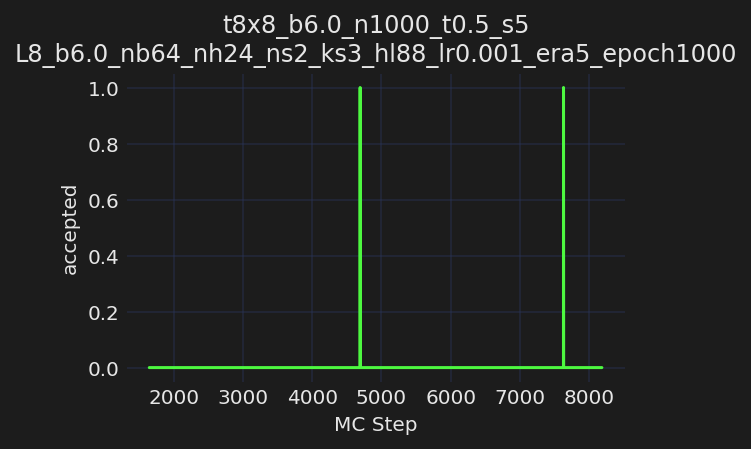

In [5]:
import fthmc.utils.qed_helpers as qed
from fthmc.utils.plot_helpers import plot_history
from fthmc.utils.samplers import make_mcmc_ensemble
from torch.utils.tensorboard import SummaryWriter

NUM_SAMPLES = 8192

logger.rule(f'Running inference on trained model for '
            f'{NUM_SAMPLES} samples')

action_fn = qed.BatchAction(train_config.beta)
logdir = train_config.logdir

inf_dir = os.path.join(logdir, 'inference')
inf_pdir = os.path.join(inf_dir, 'plots')
inf_sdir = os.path.join(inf_dir, 'summaries')

writer = SummaryWriter(log_dir=inf_sdir)

nb = train_config.batch_size
model = train_outputs['model']
history = make_mcmc_ensemble(model=model,
                             batch_size=nb, 
                             action_fn=action_fn,
                             num_samples=NUM_SAMPLES,
                             writer=writer)
plot_history(history=history,
             param=param, config=train_config, skip=['epoch', 'x'],
             num_chains=4, therm_frac=0.2, xlabel='MC Step', outdir=inf_pdir)

[10:34:13]  slope 1 linear regression S = S_eff + -496.6476

(array([[ 3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  4.,  3.,  3.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  2.,  7.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., 10., 10., 15.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 11., 11., 13., 10.,  6.,  4.,  2.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  7., 13., 22., 16., 12.,  9.,  2.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  2.,  8., 32., 35., 26., 22.,  6.,  6.,  1.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 14., 27., 29., 15.,

Text(0.5, 0, '$S_{\\mathrm{eff}} = -\\log~q(x)$')

Text(0, 0.5, '$S(x)$')

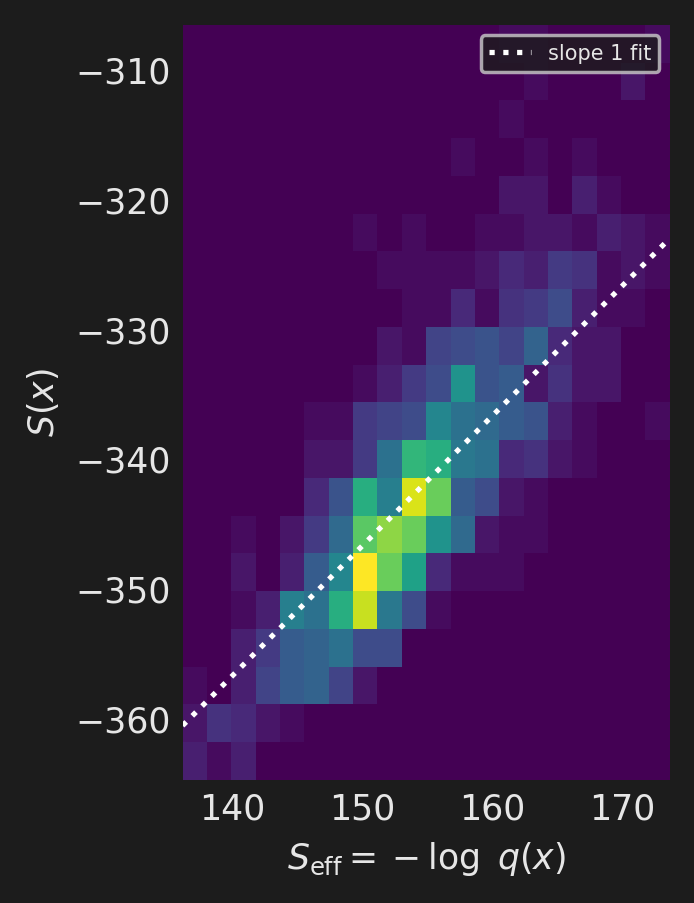

[10:34:14]  Saving figure to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/beta6
            .0/L8_b6.0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/inference/plots/action_l
            inear_regression.pdf

<Figure size 432x288 with 0 Axes>

In [12]:
from fthmc.config import grab
import fthmc.utils.qed_helpers as qed
from fthmc.utils.samplers import apply_flow_to_prior


model = train_outputs['model']
prior = model.prior
layers = model.layers

action = qed.BatchAction(train_config.beta)


x_, xi_, logq_ = apply_flow_to_prior(prior,
                                     layers,
                                     batch_size=1024)

x = grab(x_)

S_eff = -grab(logq_)
S = grab(action(x_))
#S = grab(phi4_action(torch_x))
fit_b = np.mean(S) - np.mean(S_eff)

logger.log(
    f'slope 1 linear regression S = S_eff + {fit_b:.4f}'
);

S_eff_lims = (np.min(S_eff), np.max(S_eff))
S_lims = (np.min(S), np.max(S))

fig, ax = plt.subplots(1,1, dpi=125, figsize=(4,4))
ax.hist2d(S_eff, S, bins=20, cmap='viridis',
          range=[S_eff_lims, S_lims])

          #range=[[150, 195], [-230, -195]]);
ax.set_xlabel(r'$S_{\mathrm{eff}} = -\log~q(x)$');
ax.set_ylabel(r'$S(x)$');
ax.set_aspect('equal');
xs = np.linspace(np.min(S_eff), np.max(S_eff),
                 num=4, endpoint=True)
ax.plot(xs, xs + fit_b, ':',
        color='w', label='slope 1 fit');
plt.legend(prop={'size': 6})
plt.show()
outfile = os.path.join(inf_pdir,
                       'action_linear_regression.pdf')
logger.log(f'Saving figure to: {outfile}')
plt.savefig(outfile, dpi=250, bbox_inches='tight')

## Run `FieldTransformation` HMC with trained model

In [13]:
import time
import torch.nn as nn

from fthmc.utils.plot_helpers import init_live_plot, update_plot
from math import pi as PI

TWO_PI = 2. * PI

In [9]:
logger.log(train_config)

[00:39:03]  TrainConfig:                                                                     
            ------------                                                                     
            L=8                                                                              
            beta=4.0                                                                         
            restore=False                                                                    
            n_era=5                                                                          
            n_epoch=1000                                                                     
            batch_size=64                                                                    
            base_lr=0.001                                                                    
            n_s_nets=2                                                                       
            n_layers=24                                                                      
            kernel_size=3                                                                    
            with_force=False                                                                 
            print_freq=250                                                                   
            plot_freq=50                                                                     
            log_freq=50                                                                      
            hidden_sizes=[8, 8]                                                              
            lat=[8, 8]                                                                       
            nd=2                                                                             
            shape=[2, 8, 8]                                                                  
            volume=64                                                                        
            logdir=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/beta4.0/L8_b4.0_
            nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000                                    
            dirs:                                                                            
            -----                                                                            
            logdir=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/beta4.0/L8_b4.0_
            nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000                                    
            training=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/beta4.0/L8_b4.
            0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training                         
            inference=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/beta4.0/L8_b4
            .0_nb64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/inference                       
            ckpts=/lus/grand/projects/DLHMC/nftqcd/fthmc/logs/models/lat8x8/beta4.0/L8_b4.0_n
            b64_nh24_ns2_ks3_hl88_lr0.001_era5_epoch1000/training/checkpoints

In [18]:
from dataclasses import asdict
from fthmc.utils.plot_helpers import update_plot
from fthmc.field_transformation import FieldTransformation
from fthmc.config import ftConfig

ftconfig = ftConfig(tau=param.tau, nstep=param.nstep) 

flow = train_outputs['model'].layers
    
if torch.cuda.is_available():
    flow.to('cuda')
    
flow.eval()
#pdict = asdict(param)
#pdict['tau'] = 0.1
#pdict['nstep'] = 5


field_transformation = FieldTransformation(flow=flow, config=train_config, ftconfig=ftconfig)

ModuleList(
  (0): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLayer(
      (net): Sequential(
        (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): SiLU()
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (3): SiLU()
        (4): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
      )
    )
  )
  (1): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLayer(
      (net): Sequential(
        (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): SiLU()
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (3): SiLU()
        (4): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
      )
    )
  )
  (2): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLaye

ModuleList(
  (0): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLayer(
      (net): Sequential(
        (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): SiLU()
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (3): SiLU()
        (4): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
      )
    )
  )
  (1): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLayer(
      (net): Sequential(
        (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): SiLU()
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (3): SiLU()
        (4): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
      )
    )
  )
  (2): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLaye

In [ ]:
#x_ = x[None, :]
#x_.requires_grad_(True)
#param.tau = 0.1
#param.nstep = 2
#x = param.initializer()
#param.tau = 0.25
#param.nstep = 5 
#x_ = torch.ones(1, 2, 8, 8).uniform_(-np.pi, np.pi).cuda()
#x_ = torch.randn(1, 2, 8, 8).cuda()
x_ = hmc_fields[-1][-1].cuda()

logdir = train_config.logdir

ftstr = ftconfig.uniquestr()
fthmcdir = os.path.join(logdir, 'ftHMC', ftstr)

pdir = os.path.join(fthmcdir, 'plots')
sdir = os.path.join(fthmcdir, 'summaries')

writer = SummaryWriter(log_dir=sdir)

runs_history = field_transformation.run(x=x_, nprint=50,
                                        figsize=(9., 2.),
                                        num_trajs=1000,
                                        writer=writer,
                                        dpi=120, nplot=5, window=1)

#  Transfer to larger lattice


In [43]:
from dataclasses import asdict
from fthmc.train import train, transfer_to_new_lattice

from torch import nn 

def transfer(
        L: int,
        param: Param,
        config: TrainConfig,
        scheduler_config: SchedulerConfig,
        layers: nn.ModuleList,
        new_lr: float = None,
        run_hmc: bool = True,
        figsize: tuple = None,
):
    if figsize is None:
        figsize = (9, 2)
        
    xfr = transfer_to_new_lattice(L=L,
                                  layers=layers,
                                  param_init=param)
    param_new = xfr['param']
    model_new = xfr['model']
    # ----------------------------------------------
    # Run HMC using new (transferred) `param` above
    # ----------------------------------------------
    if run_hmc:
        from fthmc.hmc import run_hmc
        hmc_fields, hmc_history = run_hmc(param_new)


    if new_lr is not None:
        cfg_dict = asdict(config)
        cfg_dict['base_lr'] = new_lr
        config_new = TrainConfig(**cfg_dict)
    else:
        config_new = config

    train_outputs = train(param_new,
                          config_new,
                          model=model_new,
                          pre_model=None,
                          figsize=figsize,
                          scheduler_config=scheduler_config)
    return {
        'param': param_new,
        'config': config_new,
        'model': model_new,
        'outputs': train_outputs
    }

ModuleList(
  (0): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLayer(
      (net): Sequential(
        (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): SiLU()
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (3): SiLU()
        (4): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
      )
    )
  )
  (1): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLayer(
      (net): Sequential(
        (0): Conv2d(2, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (1): SiLU()
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
        (3): SiLU()
        (4): Conv2d(8, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
      )
    )
  )
  (2): GaugeEquivCouplingLayer(
    (plaq_coupling): NCPPlaqCouplingLaye

[16:08:22]  Creating directory: ../../logs/hmc/t16x16_b5.0_n1000_t1.5_s10/plots

[16:08:22]  Param:                                                                           
            ----------------                                                                 
            beta=5.0                                                                         
            L=16                                                                             
            tau=1.5                                                                          
            nstep=10                                                                         
            ntraj=1000                                                                       
            nrun=1                                                                           
            nprint=100                                                                       
            seed=1331                                                                        
            randinit=False                                                                   
            nth_interop=2                                                                    
            nth=2                                                                            
            lat=[16, 16]                                                                     
            nd=2                                                                             
            shape=[2, 16, 16]                                                                
            volume=256                                                                       
            dt=0.15

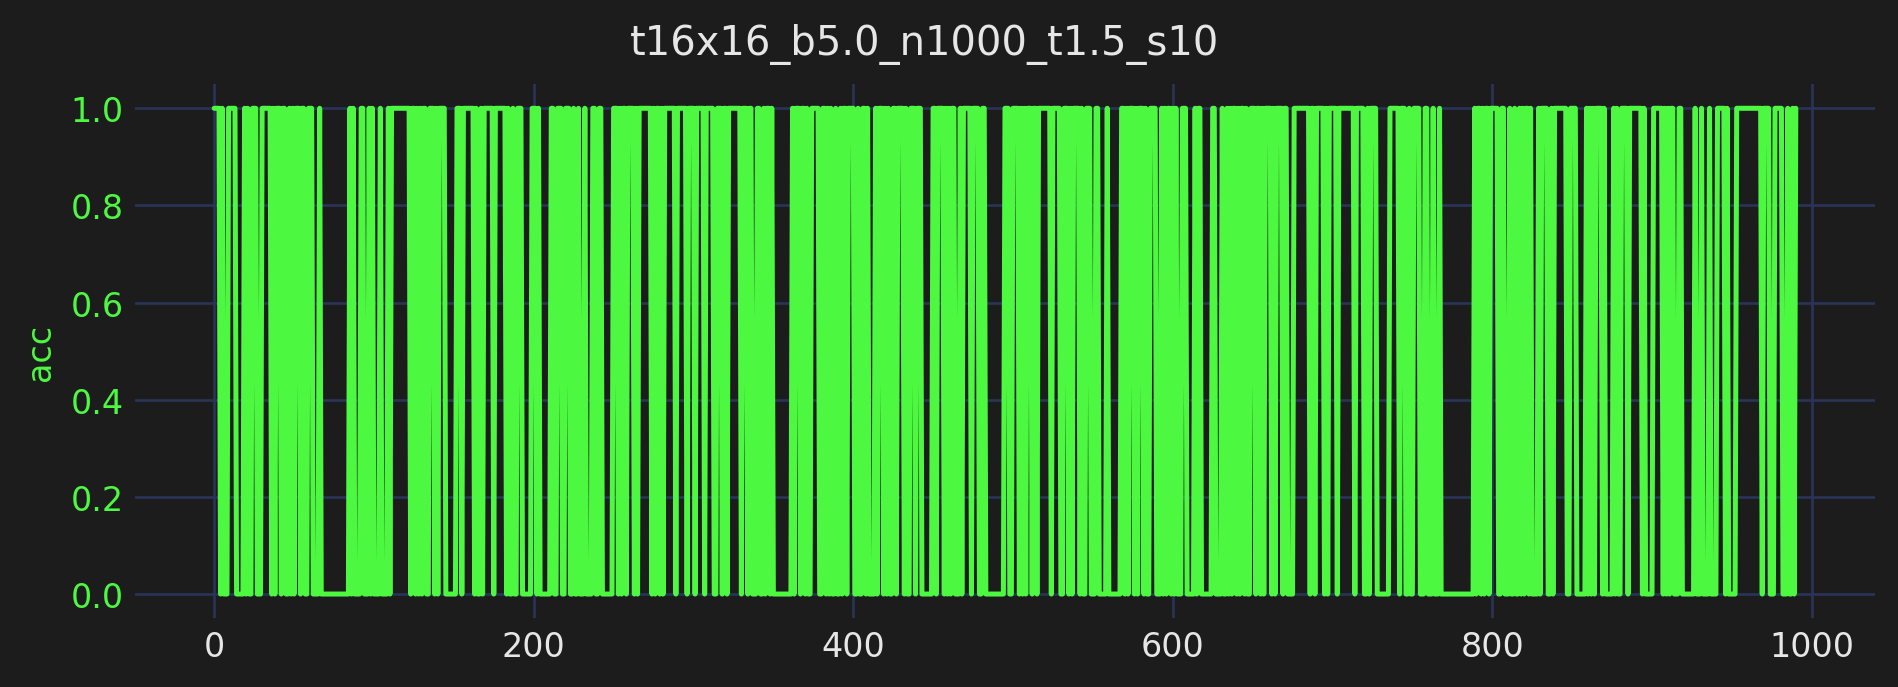

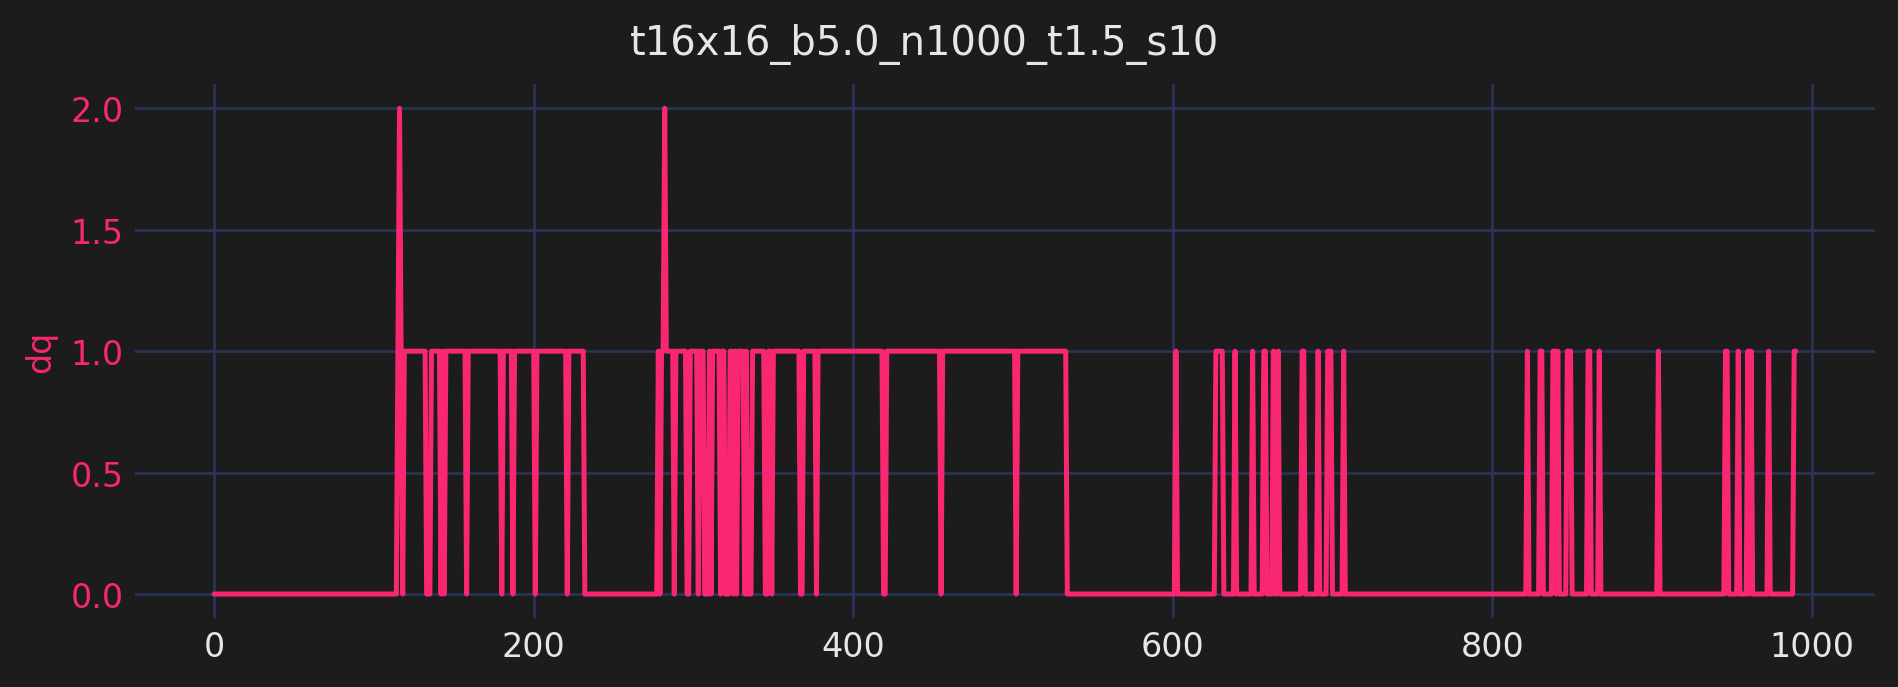

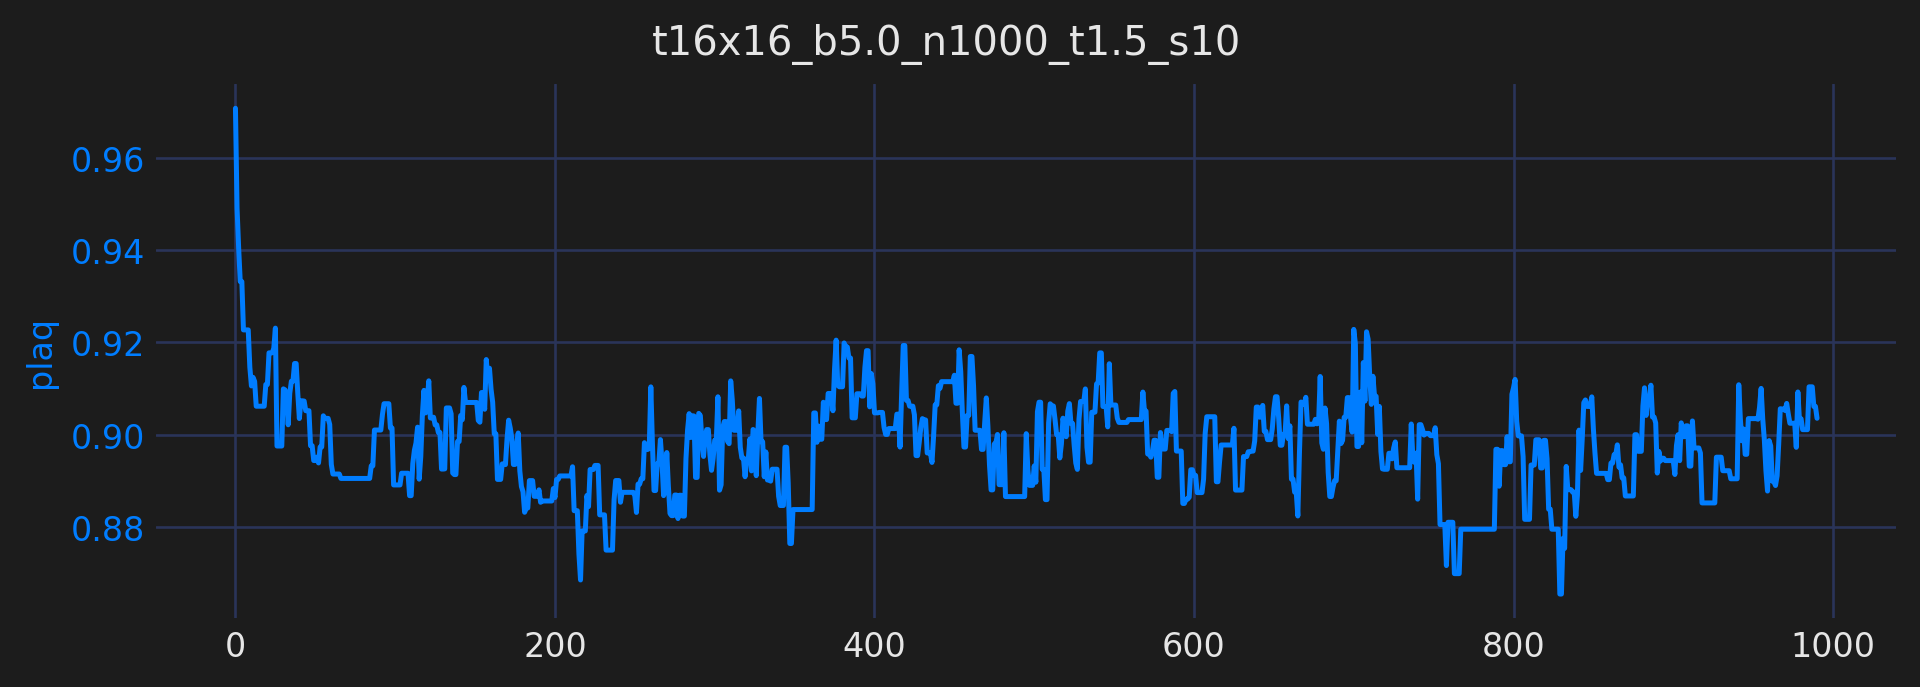

──────────────────────────────── RUN: 0, last took: 0 m 0 s ─────────────────────────────────

[16:08:23]  plaq=1.000 q=0.000

            traj=2 dt=0.007 acc=1.000 dH=-2.244 plaq=0.949 q=0 dq=0.000

[16:08:28]  traj=102 dt=0.006 acc=0.000 dH=2.909 plaq=0.889 q=0 dq=0.000

[16:08:34]  traj=202 dt=0.008 acc=1.000 dH=0.548 plaq=0.890 q=0 dq=0.000

[16:08:39]  traj=302 dt=0.007 acc=0.000 dH=1.306 plaq=0.899 q=-2 dq=1.000

[16:08:45]  traj=402 dt=0.007 acc=0.000 dH=0.909 plaq=0.905 q=0 dq=1.000

[16:08:51]  traj=502 dt=0.007 acc=1.000 dH=-0.178 plaq=0.890 q=-1 dq=1.000

[16:08:57]  traj=602 dt=0.007 acc=0.000 dH=1.182 plaq=0.891 q=0 dq=0.000

[16:09:03]  traj=702 dt=0.007 acc=1.000 dH=0.545 plaq=0.920 q=1 dq=0.000

[16:09:09]  traj=802 dt=0.007 acc=1.000 dH=-0.125 plaq=0.912 q=1 dq=0.000

[16:09:15]  traj=902 dt=0.007 acc=1.000 dH=-0.074 plaq=0.891 q=0 dq=0.000

[16:09:21]  Creating directory: ../../logs/hmc/t16x16_b5.0_n1000_t1.5_s10/plots/run0

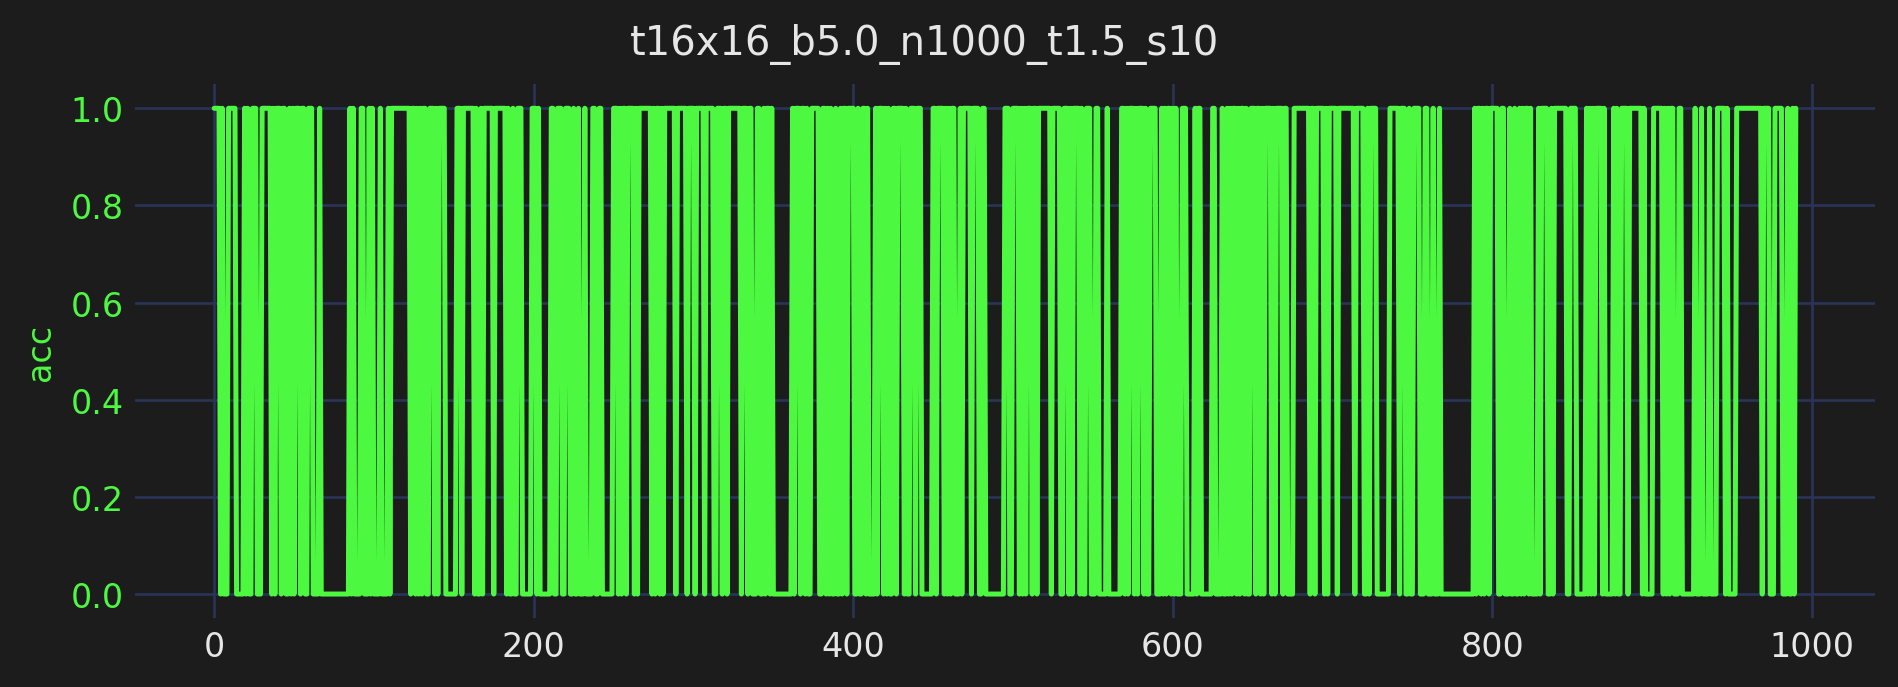

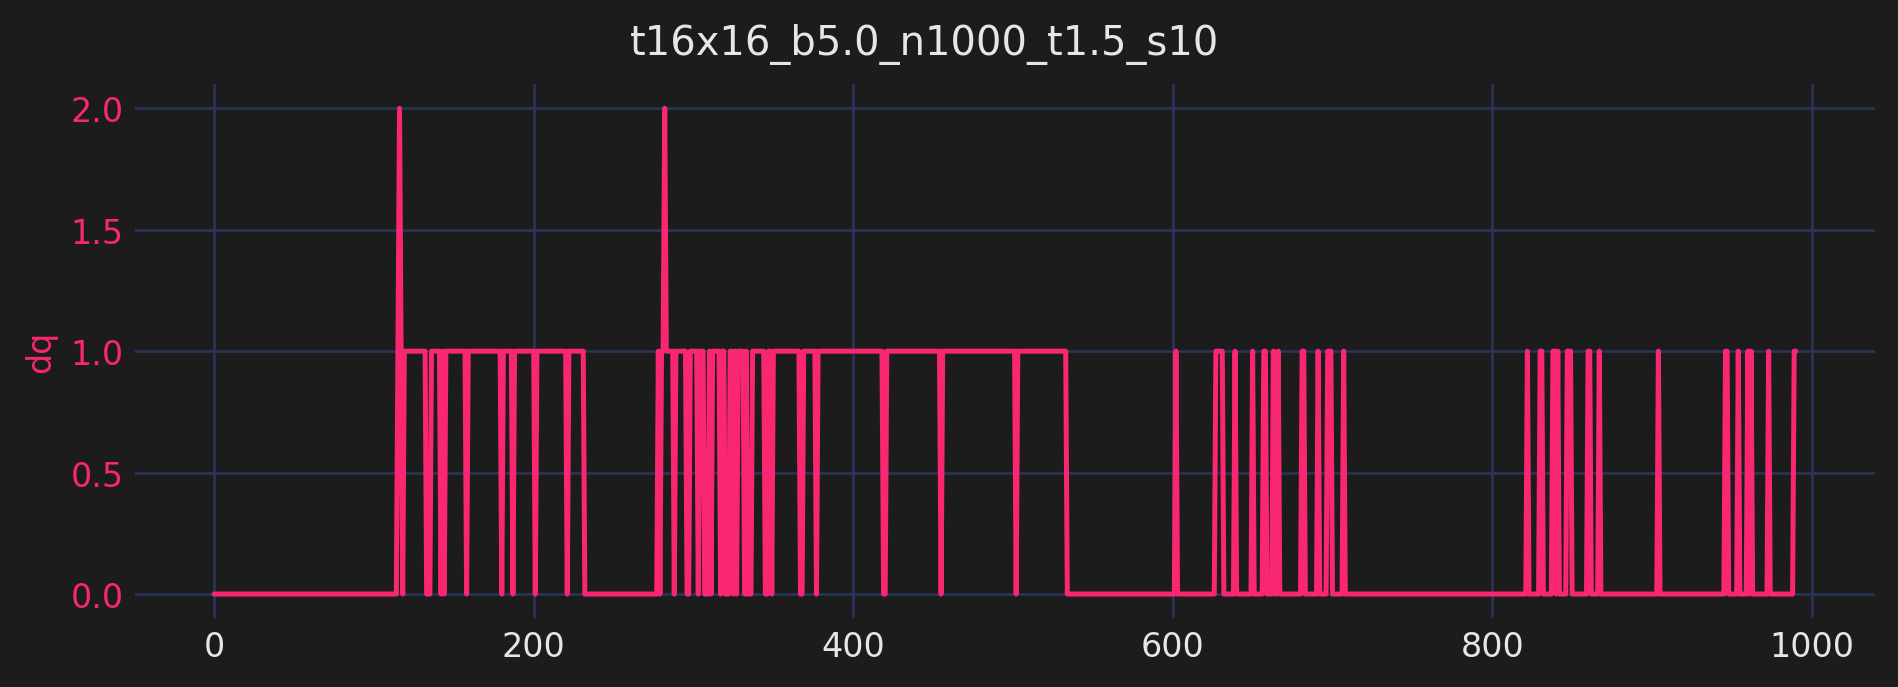

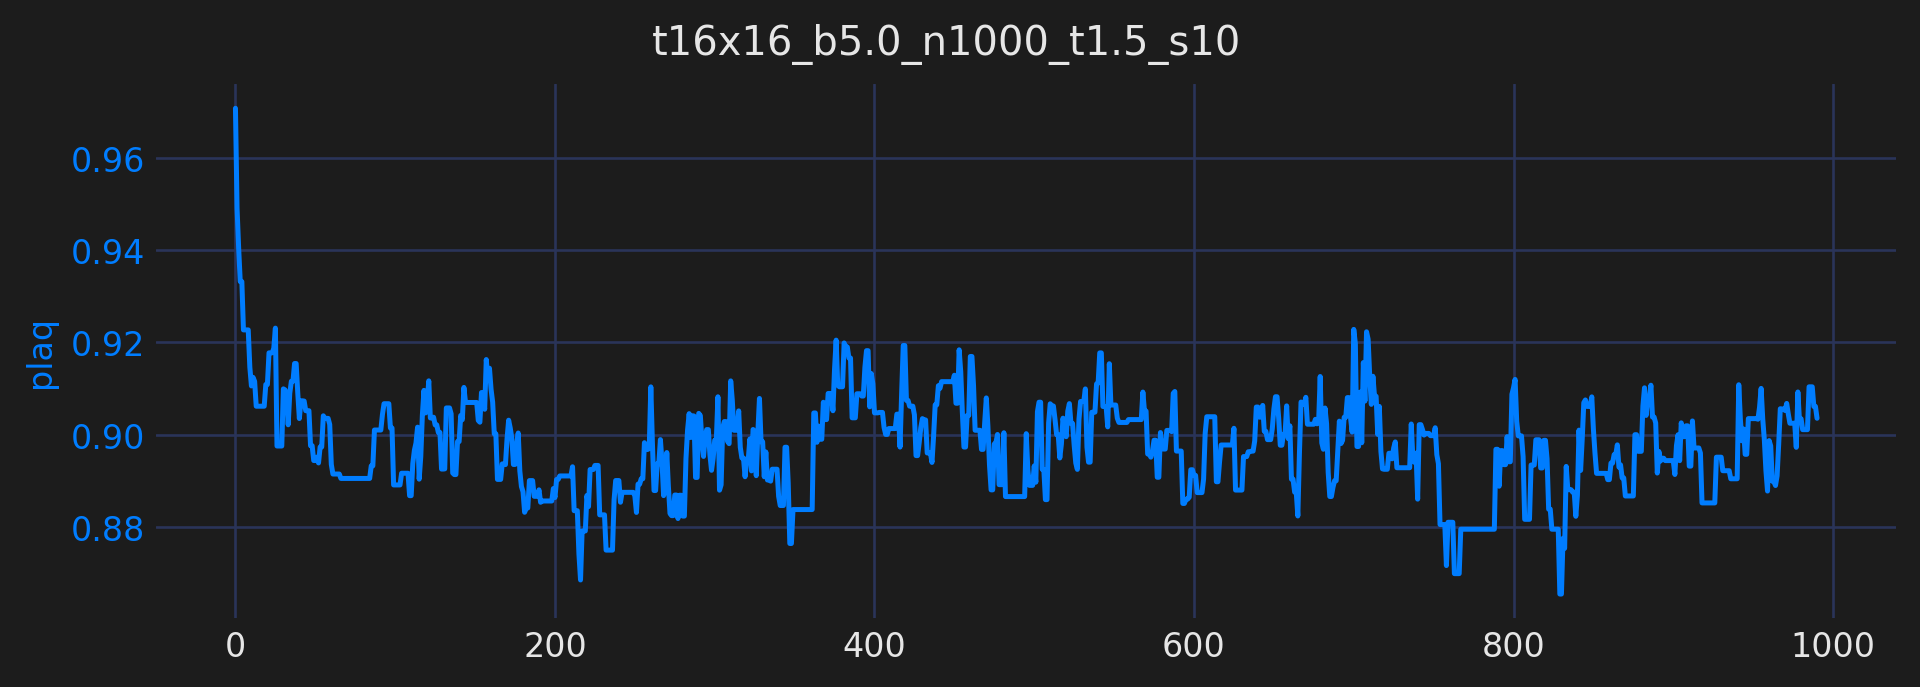

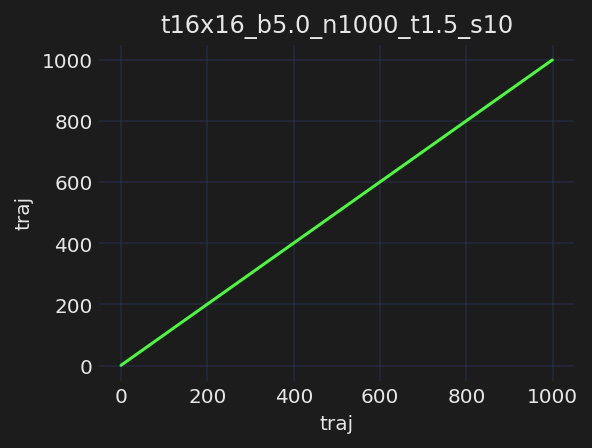

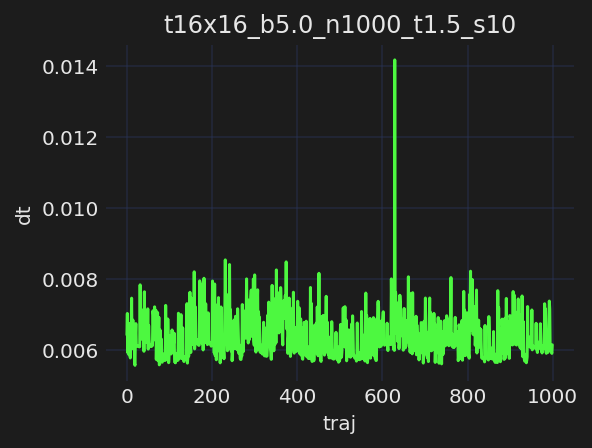

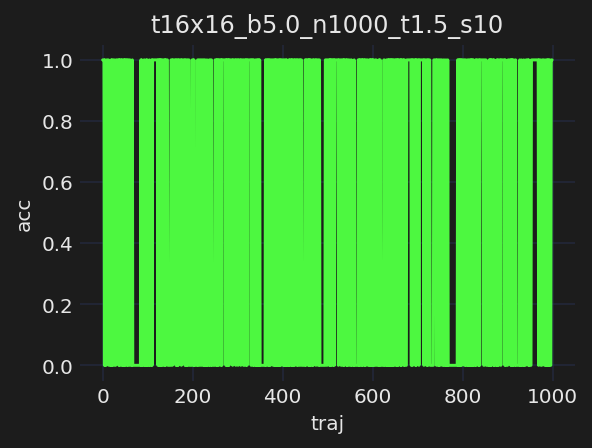

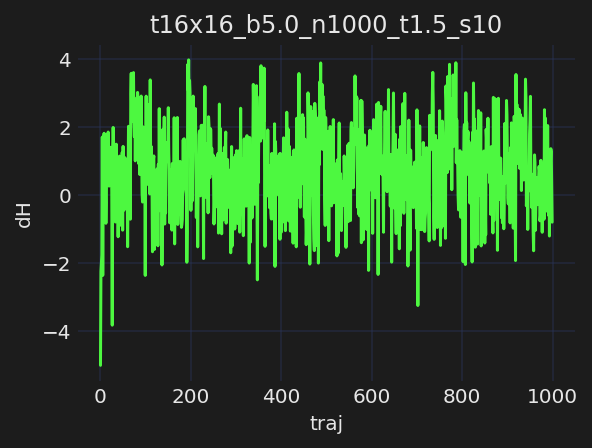

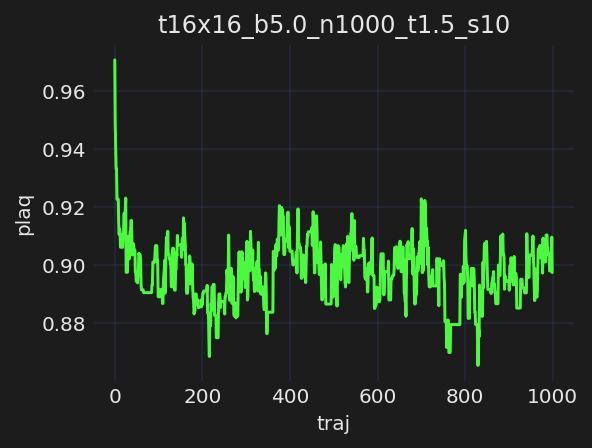

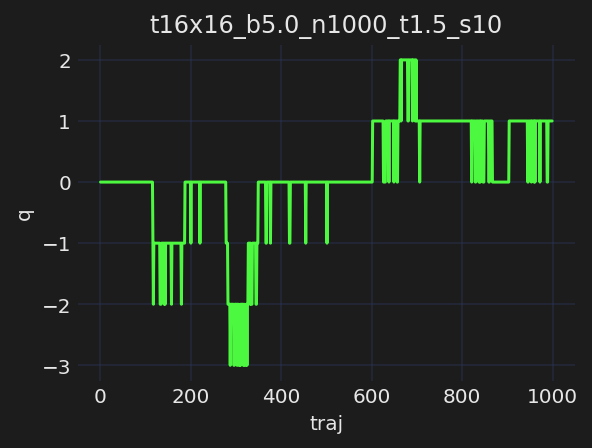

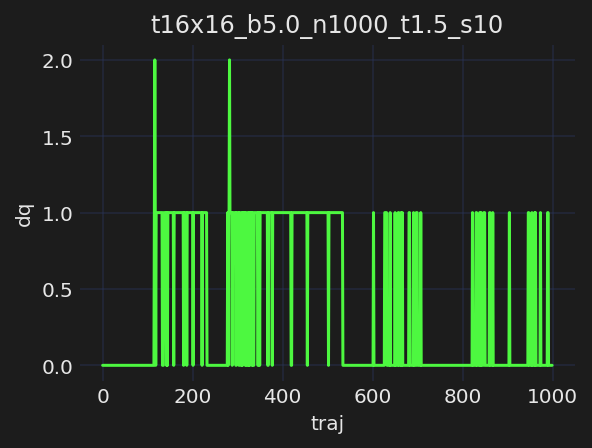

[16:09:24]  Run times: ['58.1893']

            Per trajectory: ['0.0582']

[16:09:24]  Saving hmc_histories to                                                          
            ../../logs/hmc/t16x16_b5.0_n1000_t1.5_s10/hmc_histories.z.

[16:09:24]  Saving hmc_fields_arr to                                                         
            ../../logs/hmc/t16x16_b5.0_n1000_t1.5_s10/hmc_fields_arr.z.

[16:09:24]  Creating directory: ../../logs/t16x16_b5.0_n1000_t1.5_s10/nb64_nh24_ns2_ks3_hl88_
            lr0.0001_era10_epoch1000

[16:09:24]  Creating directory: ../../logs/t16x16_b5.0_n1000_t1.5_s10/nb64_nh24_ns2_ks3_hl88_
            lr0.0001_era10_epoch1000/training

[16:09:24]  Creating directory: ../../logs/t16x16_b5.0_n1000_t1.5_s10/nb64_nh24_ns2_ks3_hl88_
            lr0.0001_era10_epoch1000/training/plots

[16:09:24]  Creating directory: ../../logs/t16x16_b5.0_n1000_t1.5_s10/nb64_nh24_ns2_ks3_hl88_
            lr0.0001_era10_epoch1000/training/checkpoints

[16:09:24]  Scheduler created!

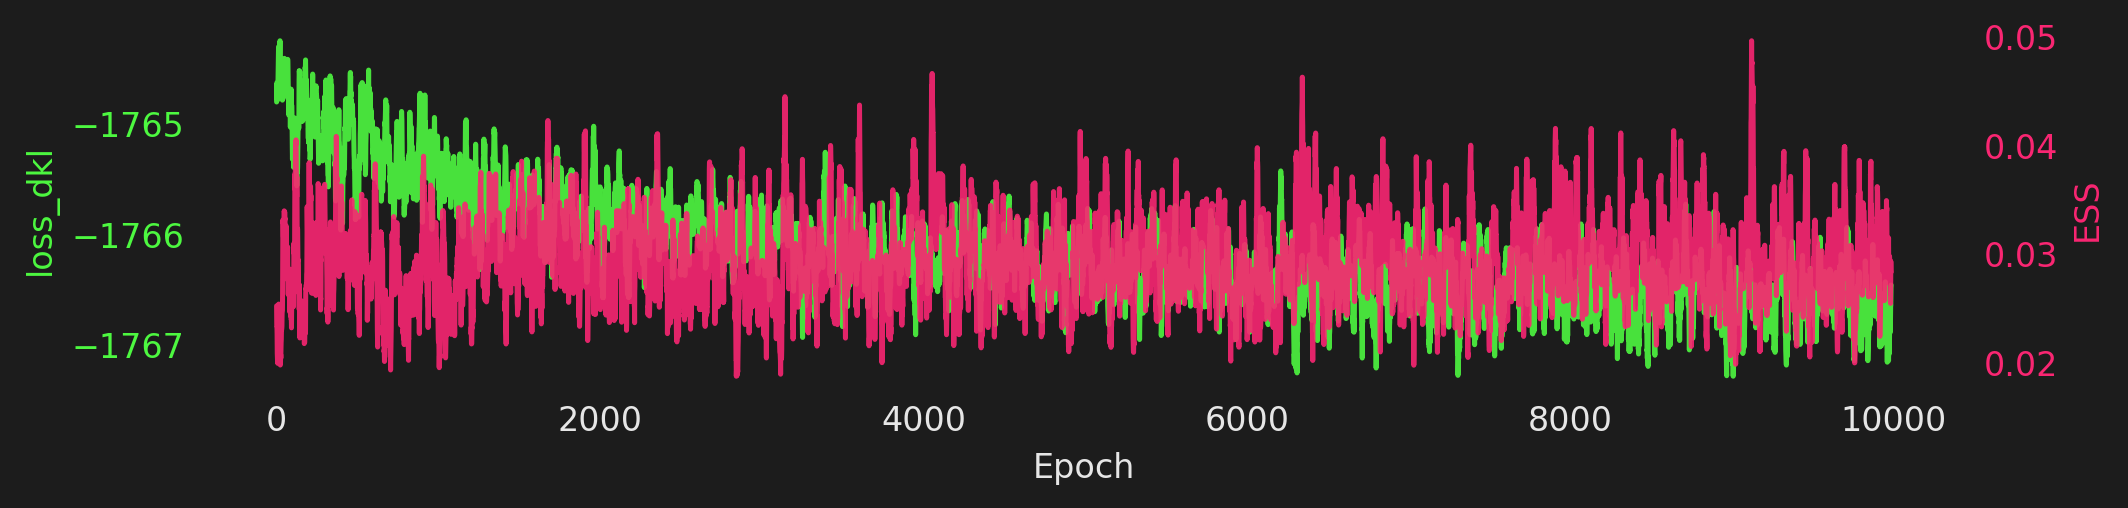

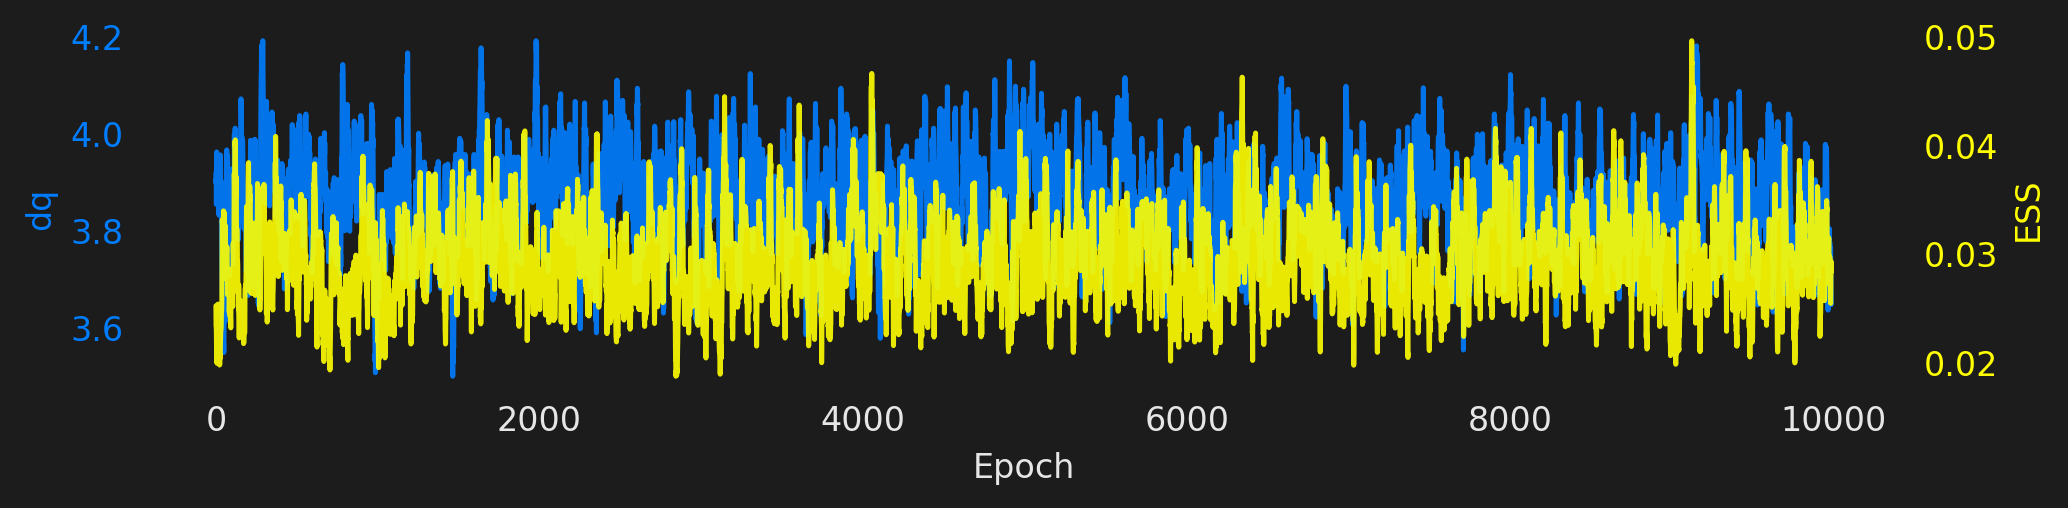

─────────────────────────────── ERA=0, last took: 0 min 0 sec ───────────────────────────────

[16:10:52]  (now) epoch: 500 dt=0.146 ess=0.035 loss_dkl=-1764.854 dq=3.625 plaq=0.871

            (avg) epoch: 500 dt=0.146 ess=0.035 loss_dkl=-1764.854 dq=3.625 plaq=0.871

Epoch   622: reducing learning rate of group 0 to 9.5000e-05.
Epoch   823: reducing learning rate of group 0 to 9.0250e-05.


[16:12:18]  (now) epoch: 1000 dt=0.150 ess=0.027 loss_dkl=-1764.790 dq=3.672 plaq=0.870

            (avg) epoch: 1000 dt=0.150 ess=0.027 loss_dkl=-1764.790 dq=3.672 plaq=0.870

[16:12:18]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era0-epoch999.tar

───────────────────────────── ERA=1, last took: 2 min 53.65 sec ─────────────────────────────

Epoch  1024: reducing learning rate of group 0 to 8.5737e-05.
Epoch  1225: reducing learning rate of group 0 to 8.1451e-05.
Epoch  1426: reducing learning rate of group 0 to 7.7378e-05.


[16:13:45]  (now) epoch: 1500 dt=0.162 ess=0.016 loss_dkl=-1765.304 dq=3.578 plaq=0.873

            (avg) epoch: 1500 dt=0.162 ess=0.016 loss_dkl=-1765.304 dq=3.578 plaq=0.873

Epoch  1627: reducing learning rate of group 0 to 7.3509e-05.
Epoch  1913: reducing learning rate of group 0 to 6.9834e-05.


[16:15:12]  (now) epoch: 2000 dt=0.149 ess=0.021 loss_dkl=-1766.338 dq=4.219 plaq=0.871

            (avg) epoch: 2000 dt=0.149 ess=0.021 loss_dkl=-1766.338 dq=4.219 plaq=0.871

[16:15:12]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era1-epoch999.tar

───────────────────────────── ERA=2, last took: 2 min 53.58 sec ─────────────────────────────

Epoch  2114: reducing learning rate of group 0 to 6.6342e-05.
Epoch  2315: reducing learning rate of group 0 to 6.3025e-05.


[16:16:38]  (now) epoch: 2500 dt=0.160 ess=0.018 loss_dkl=-1765.375 dq=3.516 plaq=0.873

            (avg) epoch: 2500 dt=0.160 ess=0.018 loss_dkl=-1765.375 dq=3.516 plaq=0.873

Epoch  2516: reducing learning rate of group 0 to 5.9874e-05.
Epoch  2717: reducing learning rate of group 0 to 5.6880e-05.
Epoch  2918: reducing learning rate of group 0 to 5.4036e-05.


[16:18:06]  (now) epoch: 3000 dt=0.161 ess=0.016 loss_dkl=-1765.072 dq=4.391 plaq=0.871

            (avg) epoch: 3000 dt=0.161 ess=0.016 loss_dkl=-1765.072 dq=4.391 plaq=0.871

[16:18:06]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era2-epoch999.tar

───────────────────────────── ERA=3, last took: 2 min 53.92 sec ─────────────────────────────

Epoch  3262: reducing learning rate of group 0 to 5.1334e-05.
Epoch  3463: reducing learning rate of group 0 to 4.8767e-05.


[16:19:34]  (now) epoch: 3500 dt=0.152 ess=0.045 loss_dkl=-1765.508 dq=3.641 plaq=0.869

            (avg) epoch: 3500 dt=0.152 ess=0.045 loss_dkl=-1765.508 dq=3.641 plaq=0.869

Epoch  3710: reducing learning rate of group 0 to 4.6329e-05.
Epoch  3911: reducing learning rate of group 0 to 4.4013e-05.


[16:21:01]  (now) epoch: 4000 dt=0.153 ess=0.059 loss_dkl=-1764.275 dq=4.078 plaq=0.872

            (avg) epoch: 4000 dt=0.153 ess=0.059 loss_dkl=-1764.275 dq=4.078 plaq=0.872

[16:21:01]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era3-epoch999.tar

───────────────────────────── ERA=4, last took: 2 min 55.05 sec ─────────────────────────────

Epoch  4112: reducing learning rate of group 0 to 4.1812e-05.
Epoch  4361: reducing learning rate of group 0 to 3.9721e-05.


[16:22:29]  (now) epoch: 4500 dt=0.153 ess=0.039 loss_dkl=-1765.282 dq=3.719 plaq=0.870

            (avg) epoch: 4500 dt=0.153 ess=0.039 loss_dkl=-1765.282 dq=3.719 plaq=0.870

Epoch  4626: reducing learning rate of group 0 to 3.7735e-05.
Epoch  4827: reducing learning rate of group 0 to 3.5849e-05.


[16:23:57]  (now) epoch: 5000 dt=0.157 ess=0.016 loss_dkl=-1768.465 dq=4.172 plaq=0.874

            (avg) epoch: 5000 dt=0.157 ess=0.016 loss_dkl=-1768.465 dq=4.172 plaq=0.874

[16:23:58]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era4-epoch999.tar

───────────────────────────── ERA=5, last took: 2 min 56.2 sec ──────────────────────────────

Epoch  5028: reducing learning rate of group 0 to 3.4056e-05.
Epoch  5229: reducing learning rate of group 0 to 3.2353e-05.
Epoch  5430: reducing learning rate of group 0 to 3.0736e-05.


[16:25:26]  (now) epoch: 5500 dt=0.165 ess=0.016 loss_dkl=-1765.938 dq=4.188 plaq=0.869

            (avg) epoch: 5500 dt=0.165 ess=0.016 loss_dkl=-1765.938 dq=4.188 plaq=0.869

Epoch  5871: reducing learning rate of group 0 to 2.9199e-05.


[16:26:55]  (now) epoch: 6000 dt=0.170 ess=0.036 loss_dkl=-1765.038 dq=3.266 plaq=0.868

            (avg) epoch: 6000 dt=0.170 ess=0.036 loss_dkl=-1765.038 dq=3.266 plaq=0.868

[16:26:55]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era5-epoch999.tar

───────────────────────────── ERA=6, last took: 2 min 57.16 sec ─────────────────────────────

Epoch  6207: reducing learning rate of group 0 to 2.7739e-05.
Epoch  6408: reducing learning rate of group 0 to 2.6352e-05.


[16:28:24]  (now) epoch: 6500 dt=0.155 ess=0.019 loss_dkl=-1766.729 dq=3.406 plaq=0.871

            (avg) epoch: 6500 dt=0.155 ess=0.019 loss_dkl=-1766.729 dq=3.406 plaq=0.871

Epoch  6737: reducing learning rate of group 0 to 2.5034e-05.


[16:29:54]  (now) epoch: 7000 dt=0.156 ess=0.019 loss_dkl=-1766.117 dq=4.203 plaq=0.874

            (avg) epoch: 7000 dt=0.156 ess=0.019 loss_dkl=-1766.117 dq=4.203 plaq=0.874

[16:29:55]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era6-epoch999.tar

───────────────────────────── ERA=7, last took: 2 min 59.43 sec ─────────────────────────────

Epoch  7003: reducing learning rate of group 0 to 2.3783e-05.
Epoch  7204: reducing learning rate of group 0 to 2.2594e-05.
Epoch  7405: reducing learning rate of group 0 to 2.1464e-05.


[16:31:25]  (now) epoch: 7500 dt=0.163 ess=0.017 loss_dkl=-1765.127 dq=4.219 plaq=0.872

            (avg) epoch: 7500 dt=0.163 ess=0.017 loss_dkl=-1765.127 dq=4.219 plaq=0.872

Epoch  7606: reducing learning rate of group 0 to 2.0391e-05.
Epoch  7807: reducing learning rate of group 0 to 1.9371e-05.


[16:32:55]  (now) epoch: 8000 dt=0.160 ess=0.024 loss_dkl=-1766.747 dq=4.000 plaq=0.871

            (avg) epoch: 8000 dt=0.160 ess=0.024 loss_dkl=-1766.747 dq=4.000 plaq=0.871

[16:32:56]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era7-epoch999.tar

──────────────────────────── ERA=8, last took: 3 min 0.4499 sec ─────────────────────────────

Epoch  8008: reducing learning rate of group 0 to 1.8403e-05.
Epoch  8209: reducing learning rate of group 0 to 1.7482e-05.
Epoch  8410: reducing learning rate of group 0 to 1.6608e-05.


[16:34:26]  (now) epoch: 8500 dt=0.160 ess=0.042 loss_dkl=-1765.478 dq=3.703 plaq=0.871

            (avg) epoch: 8500 dt=0.160 ess=0.042 loss_dkl=-1765.478 dq=3.703 plaq=0.871

Epoch  8611: reducing learning rate of group 0 to 1.5778e-05.
Epoch  8812: reducing learning rate of group 0 to 1.4989e-05.


[16:35:55]  (now) epoch: 9000 dt=0.148 ess=0.017 loss_dkl=-1765.024 dq=3.891 plaq=0.870

            (avg) epoch: 9000 dt=0.148 ess=0.017 loss_dkl=-1765.024 dq=3.891 plaq=0.870

[16:35:55]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era8-epoch999.tar

───────────────────────────── ERA=9, last took: 2 min 59.38 sec ─────────────────────────────

Epoch  9013: reducing learning rate of group 0 to 1.4240e-05.
Epoch  9214: reducing learning rate of group 0 to 1.3528e-05.
Epoch  9415: reducing learning rate of group 0 to 1.2851e-05.


[16:37:24]  (now) epoch: 9500 dt=0.153 ess=0.031 loss_dkl=-1766.303 dq=4.125 plaq=0.872

            (avg) epoch: 9500 dt=0.153 ess=0.031 loss_dkl=-1766.303 dq=4.125 plaq=0.872

Epoch  9616: reducing learning rate of group 0 to 1.2209e-05.
Epoch  9817: reducing learning rate of group 0 to 1.1598e-05.


[16:38:54]  (now) epoch: 10000 dt=0.159 ess=0.021 loss_dkl=-1766.798 dq=3.859 plaq=0.872

            (avg) epoch: 10000 dt=0.159 ess=0.021 loss_dkl=-1766.798 dq=3.859 plaq=0.872

[16:38:54]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era9-epoch999.tar

[16:38:55]  Saving checkpoint to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/checkpoints/
            ckpt-era10-epoch1001.tar

[16:38:55]  Saving live plots to: /lus/grand/projects/DLHMC/nftqcd/fthmc/logs/t16x16_b5.0_n10
            00_t1.5_s10/nb64_nh24_ns2_ks3_hl88_lr0.0001_era10_epoch1000/training/plots

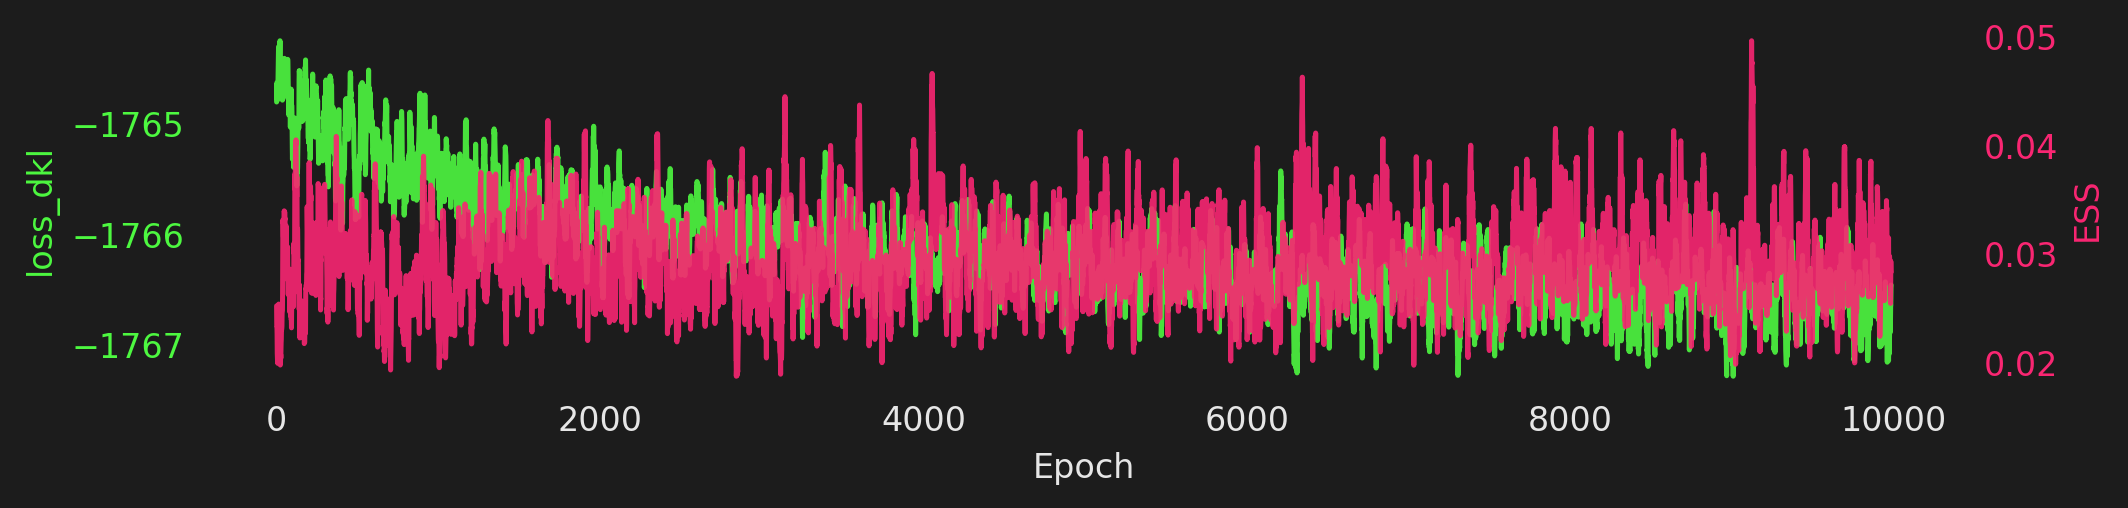

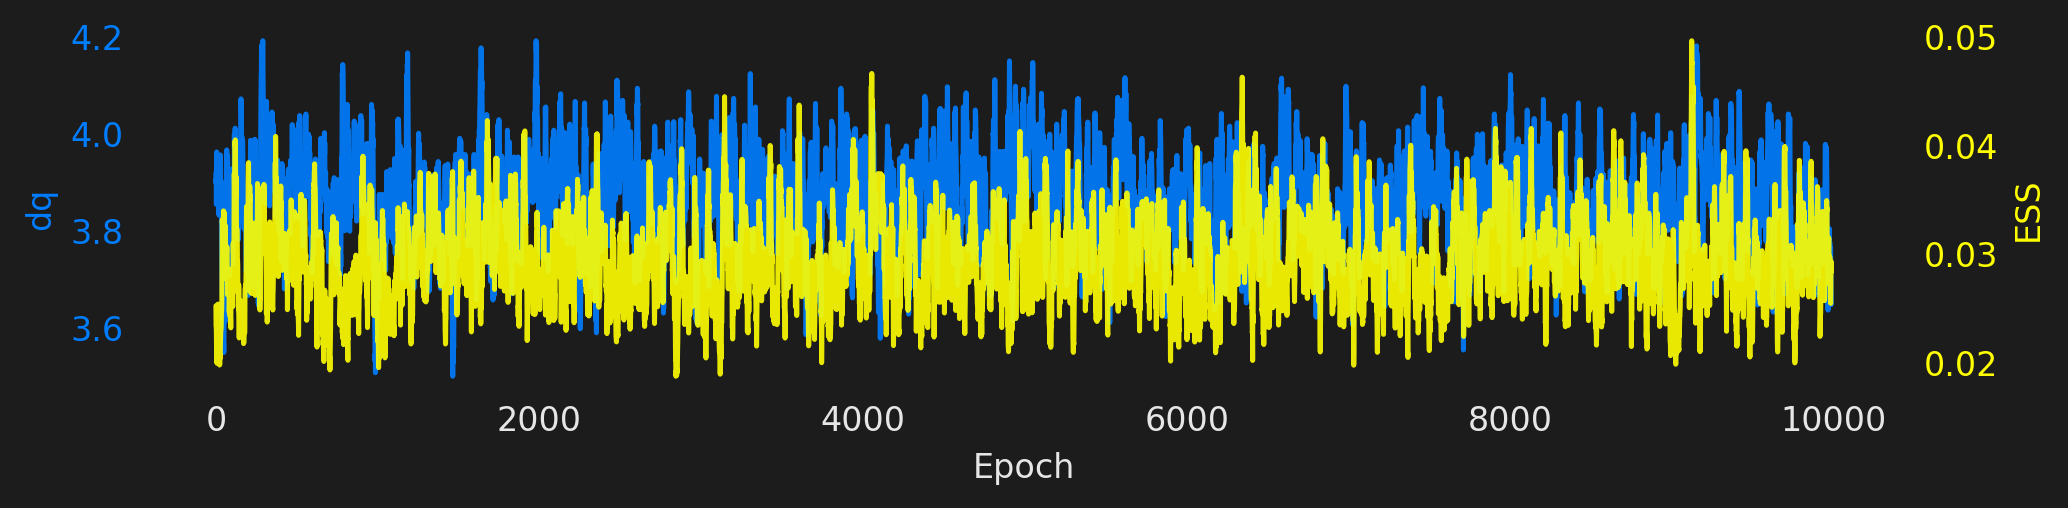

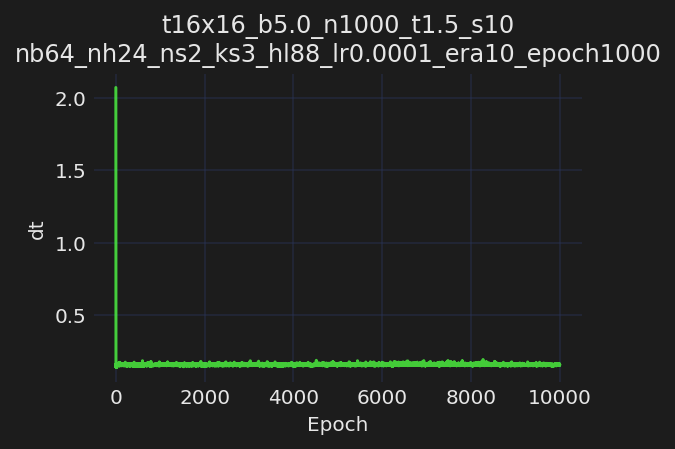

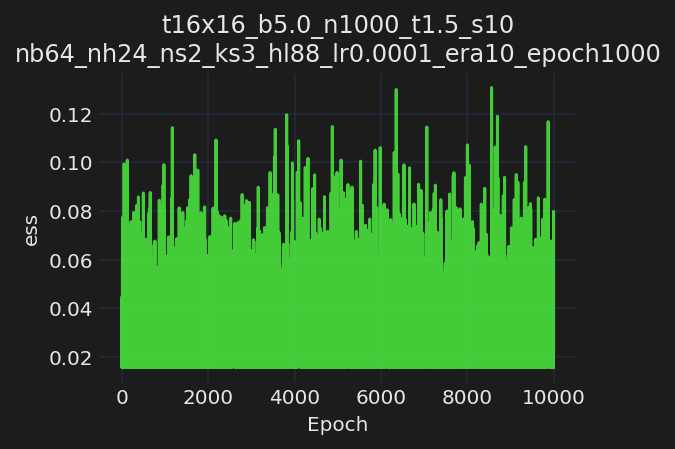

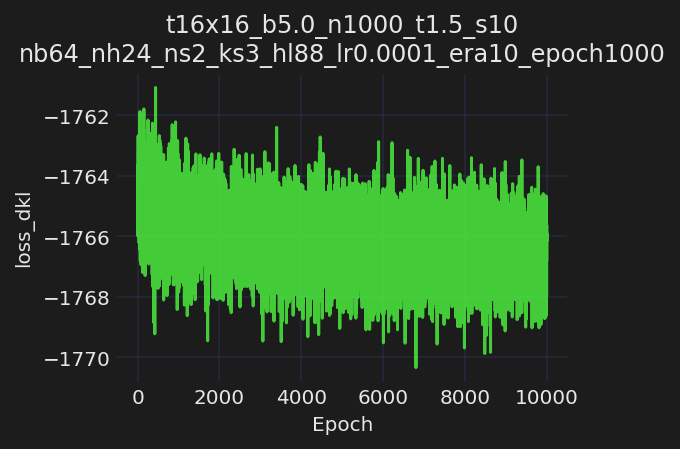

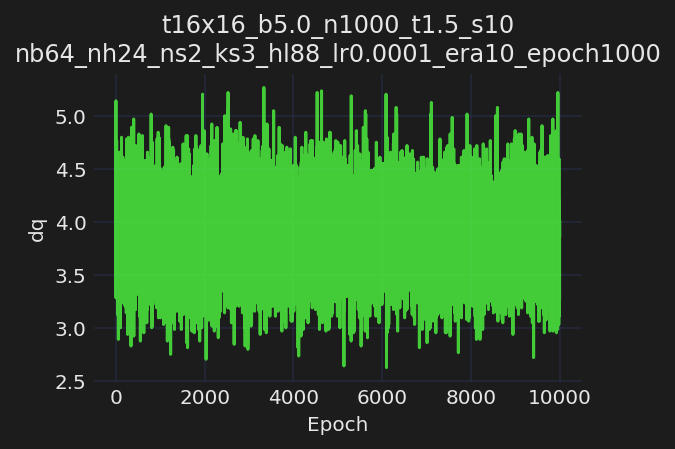

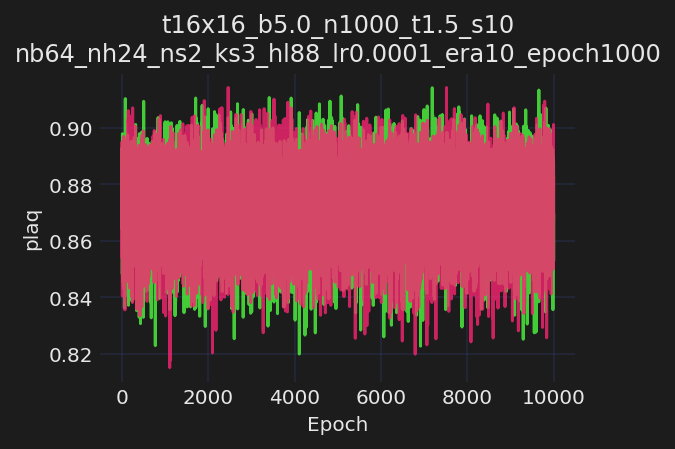

[16:39:00]  Saving train_history to ../../logs/t16x16_b5.0_n1000_t1.5_s10/nb64_nh24_ns2_ks3_h
            l88_lr0.0001_era10_epoch1000/training/train_history.z.

In [44]:
layers8 = train_outputs['model'].layers #['layers']
layers8.train()
train_outputs16 = transfer(L=16, param=param,
                           config=train_config,
                           layers=layers8, 
                           scheduler_config=scheduler_config,
                           new_lr=0.0001, run_hmc=True)

## Run inference on trained model

In [45]:
param16 = train_outputs16['param']
config16 = train_outputs16['config']
model16 = train_outputs16['model']
outputs16 = train_outputs16['outputs']

[17:50:14]  TORCH DEVICE: cuda

            TORCH DTYPE: torch.float32

[autoreload of fthmc.config failed: Traceback (most recent call last):
  File "/lus/grand/projects/DLHMC/conda/deephyper/latest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/lus/grand/projects/DLHMC/conda/deephyper/latest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/lus/grand/projects/DLHMC/conda/deephyper/latest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/lus/grand/projects/DLHMC/conda/deephyper/latest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/lus/grand/projects/DLHMC/conda/deephyper/latest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/lus/grand/projects/DLHMC/con

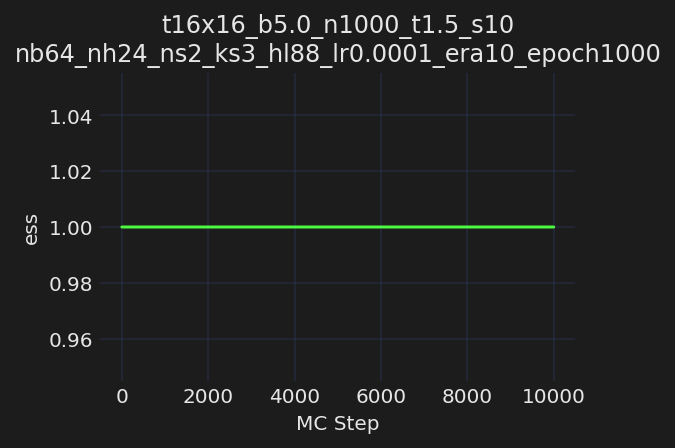

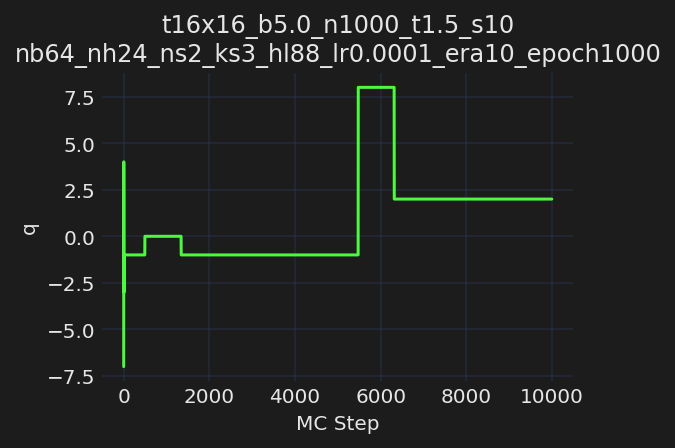

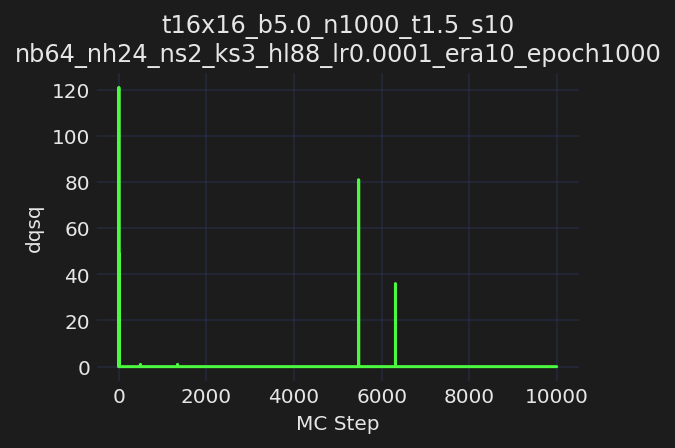

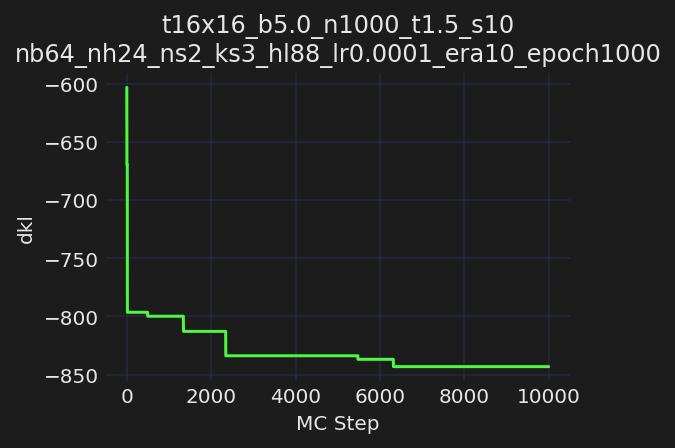

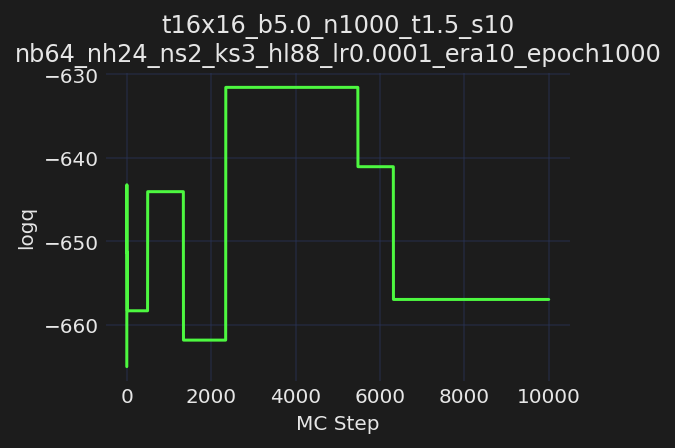

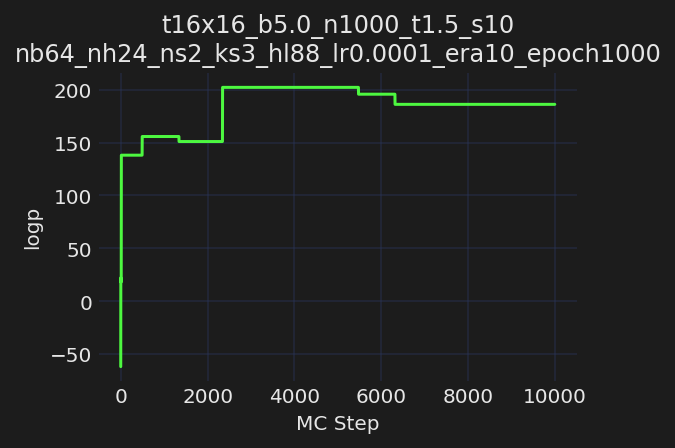

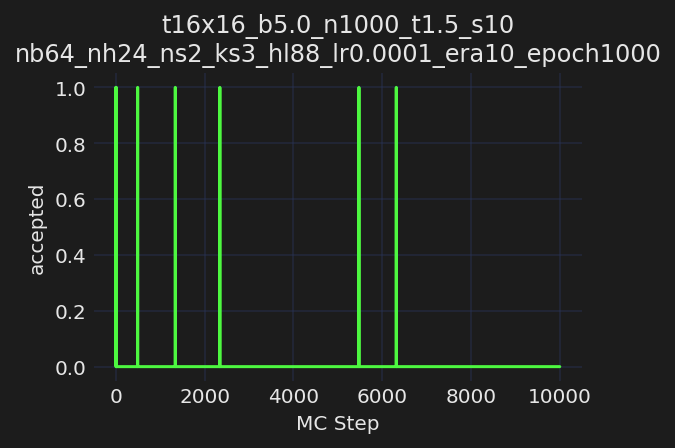

In [47]:
action_fn16 = qed.BatchAction(param16.beta)

history16 = make_mcmc_ensemble(model=model16,
                               action_fn=action_fn16,
                               batch_size=config16.batch_size,
                               num_samples=10000)
plot_history(history=history16,
             param=param16, config=config16, skip=['epoch', 'x'],
             num_chains=4, therm_frac=0.0, xlabel='MC Step')#, outdir=inf_pdir8)

## Run `ftHMC` on trained model

In [ ]:

from dataclasses import asdict
from fthmc.utils.plot_helpers import update_plot
from fthmc.field_transformation import FieldTransformation

flow16 = model16.layers
    
if torch.cuda.is_available():
    flow16.to('cuda')
    
flow16.eval()

field_transformation16 = FieldTransformation(flow=flow16, param=param16)
x16_ = param16.initializer().cuda()
#x_ = hmc_fields[-1][-1].cuda()

runs_history = field_transformation16.run(x=x16_, nprint=50,
                                          figsize=(9., 2.),
                                          num_runs=2, num_trajs=1000,
                                          dpi=120, nplot=5, window=1)

In [ ]:
# ----------------------------------------------------------------
# Run inference on transferred model and evaluate / plot metrics
# ----------------------------------------------------------------
import fthmc.utils.qed_helpers as qed
from fthmc.utils.plot_helpers import plot_history
from fthmc.utils.samplers import make_mcmc_ensemble

sns.set_context('paper')
action_fn8 = qed.BatchAction(param8.beta)
dirs8 = train_outputs8['dirs']
logdir8 = dirs8['logdir']

inf_dir8 = os.path.join(logdir8, 'inference')
inf_pdir8 = os.path.join(inf_dir8, 'plots')
history8 = make_mcmc_ensemble(model=train_outputs8['model'],
                               action_fn=action_fn8,
                               batch_size=train_config8.batch_size,
                               num_samples=1000)
plot_history(history=history8,
             param=param8, config=train_config8, skip=['epoch', 'x'],
             num_chains=4, therm_frac=0.0, xlabel='MC Step', outdir=inf_pdir8)

In [25]:
%debug

> /lus/grand/projects/DLHMC/nftqcd/fthmc/fthmc/utils/layers.py(332)reverse()
    330 
    331     def reverse(self, fx: torch.Tensor):
--> 332         fx2 = self.mask['frozen'] * fx
    333         net_out = self.net(stack_cos_sin(fx2))
    334         assert net_out.shape[1] >= 2, 'CNN must output n_mix (s_i) + 1 (t) channels'

ipdb> up
> /lus/grand/projects/DLHMC/nftqcd/fthmc/fthmc/utils/layers.py(161)reverse()
    159     def reverse(self, fx):
    160         new_plaq = compute_u1_plaq(fx, mu=0, nu=1)
--> 161         plaq, logJ = self.plaq_coupling.reverse(new_plaq)
    162         delta_plaq = plaq - new_plaq
    163         delta_links = torch.stack((delta_plaq, -delta_plaq), dim=1) # signs for U vs Udagger

ipdb> up
> /lus/grand/projects/DLHMC/nftqcd/fthmc/fthmc/field_transformation.py(125)flow_backward()
    123         #  for layer in [self.flow][::-1]:
    124         for layer in reversed(self.flow):
--> 125             x, logdet_ = layer.reverse(x)
    126             logde